# Customer Retention Project
E-retail factors for customer activation and retention: A case study from Indian e-commerce customers

# Problem Statement:

Customer satisfaction has emerged as one of the most important factors that guarantee the success of online store; it has been posited as a key stimulant of purchase, repurchase intentions and customer loyalty. A comprehensive review of the literature, theories and models have been carried out to propose the models for customer activation and customer retention. Five major factors that contributed to the success of an e-commerce store have been identified as: service quality, system quality, information quality, trust and net benefit. The research furthermore investigated the factors that influence the online customers repeat purchase intention. The combination of both utilitarian value and hedonistic values are needed to affect the repeat purchase intention (loyalty) positively. The data is collected from the Indian online shoppers. Results indicate the e-retail success factors, which are very much critical for customer satisfaction.

Since the dataset do not contains target/dependent variable, hence we can consider this as unsupervised learning



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import scipy as stats
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
# Importing Dataset
# Reading the excel file
df = pd.read_excel("customer_retention_dataset.xlsx")
pd.set_option("display.max_columns",None)
df

1Gender of respondent 2 How old are you?   \
0                    Male         31-40 years   
1                  Female         21-30 years   
2                  Female         21-30 years   
3                    Male         21-30 years   
4                  Female         21-30 years   
..                    ...                 ...   
264                Female         21-30 years   
265                Female         31-40 years   
266                Female         41-50 yaers   
267                Female  Less than 20 years   
268                Female         41-50 yaers   

    3 Which city do you shop online from?  \
0                                   Delhi   
1                                   Delhi   
2                           Greater Noida   
3                                 Karnal    
4                              Bangalore    
..                                    ...   
264                                 Solan   
265                             Ghaziabad   
266                            Bangalore    
267                                 Solan   
268                             Ghaziabad   

     4 What is the Pin Code of where you shop online from?  \
0                                               110009       
1                                               110030       
2                                               201308       
3                                               132001       
4                                               530068       
..                                                 ...       
264                                             173212       
265                                             201008       
266                                             560010       
267                                             173229       
268                                             201009       

    5 Since How Long You are Shopping Online ?  \
0                                Above 4 years   
1                                Above 4 years   
2                                    3-4 years   
3                                    3-4 years   
4                                    2-3 years   
..                                         ...   
264                                  1-2 years   
265                                  1-2 years   
266                                  2-3 years   
267                                  2-3 years   
268                                  2-3 years   

    6 How many times you have made an online purchase in the past 1 year?  \
0                                          31-40 times                      
1                                   41 times and above                      
2                                   41 times and above                      
3                                   Less than 10 times                      
4                                          11-20 times                      
..                                                 ...                      
264                                 Less than 10 times                      
265                                        31-40 times                      
266                                 Less than 10 times                      
267                                 Less than 10 times                      
268                                        31-40 times                      

    7 How do you access the internet while shopping on-line?  \
0                                              Dial-up         
1                                                Wi-Fi         
2                                      Mobile Internet         
3                                      Mobile Internet         
4                                                Wi-Fi         
..                                                 ...         
264                                    Mobile Internet         
265                                    Mobile Internet         
266                        

In [4]:
# To display all the rows in the dataset
pd.set_option("display.max_rows",None)

# Exploratory Data Analysis (EDA)

In [5]:
df.shape

(269, 71)

In [6]:
# Renaming the column names for better understanding
columns = ['Gender','Age','Shopping_City','Pincode','Shopping_Since','Shopping_Frequency','Internet_Accessibility','Device_Used',
           'Screen_Size','OS', 'Browser_Used','Channel_First_Used','Login_Mode','Time_Explored','Payment_Mode','Abandon_Frequency',
          'Abandon_Reason','Content_Readability','Similar_Product_Info','Seller_Product_Info','Product_Info_Clarity','Navigation_Ease',
          'Loading_Processing_Speed','User_Friendly_Interface','Convenient_Payment_Mode','Timely_Fulfilment_Trust','Customer_Support_Response',
          'Customer_Privacy_Guarantee','Various_Channel_Responses','Benefits','Enjoy','Convenience','Return_Replacement_Policy','Loyalty_Programs_Access',
          'Info_Satisfaction','Site_Quality_Satisfaction','Net_Benefit_Satisfaction','Trust','Product_Several_Category','Relevant_Product_Info','Monetary_Savings',
          'Patronizing_Convenience','Adventure_Sense','Social_Status','Gratification','Role_Fulfilment','Money_Worthy','Shopped_From','Easy_Web_App',
           'Visually_Appealing_WebApp','Product_Variety','Complete_Product_Info','Fast_WebApp','Reliable_WebApp','Quick_Purchase','Payment_Options_Availability',
           'Fast_Delivery','Customer_Privacy_Info','Financial_Security_Info','Perceived_Trustworthiness','Multichannel_Assistance','Long_Login_Time','Long_Display_Time',
           'Late_Price_Declare','Long_Loading_Time','Limited_Payment_Mode','Late_Delivery','WebApp_Design_Change','Page_Disruption','WebApp_Efficiency',
           'Recommendation']

df.columns = columns

In [7]:
df.columns

Index(['Gender', 'Age', 'Shopping_City', 'Pincode', 'Shopping_Since',
       'Shopping_Frequency', 'Internet_Accessibility', 'Device_Used',
       'Screen_Size', 'OS', 'Browser_Used', 'Channel_First_Used', 'Login_Mode',
       'Time_Explored', 'Payment_Mode', 'Abandon_Frequency', 'Abandon_Reason',
       'Content_Readability', 'Similar_Product_Info', 'Seller_Product_Info',
       'Product_Info_Clarity', 'Navigation_Ease', 'Loading_Processing_Speed',
       'User_Friendly_Interface', 'Convenient_Payment_Mode',
       'Timely_Fulfilment_Trust', 'Customer_Support_Response',
       'Customer_Privacy_Guarantee', 'Various_Channel_Responses', 'Benefits',
       'Enjoy', 'Convenience', 'Return_Replacement_Policy',
       'Loyalty_Programs_Access', 'Info_Satisfaction',
       'Site_Quality_Satisfaction', 'Net_Benefit_Satisfaction', 'Trust',
       'Product_Several_Category', 'Relevant_Product_Info', 'Monetary_Savings',
       'Patronizing_Convenience', 'Adventure_Sense', 'Social_Status',
      

In [8]:
df.head()

Gender          Age  Shopping_City  Pincode Shopping_Since  \
0    Male  31-40 years          Delhi   110009  Above 4 years   
1  Female  21-30 years          Delhi   110030  Above 4 years   
2  Female  21-30 years  Greater Noida   201308      3-4 years   
3    Male  21-30 years        Karnal    132001      3-4 years   
4  Female  21-30 years     Bangalore    530068      2-3 years   

   Shopping_Frequency Internet_Accessibility Device_Used Screen_Size  \
0         31-40 times                Dial-up     Desktop      Others   
1  41 times and above                  Wi-Fi  Smartphone  4.7 inches   
2  41 times and above        Mobile Internet  Smartphone  5.5 inches   
3  Less than 10 times        Mobile Internet  Smartphone  5.5 inches   
4         11-20 times                  Wi-Fi  Smartphone  4.7 inches   

                      OS   Browser_Used Channel_First_Used       Login_Mode  \
0  Window/windows Mobile  Google chrome      Search Engine    Search Engine   
1                IOS/Mac  Google chrome      Search Engine  Via application   
2                Android  Google chrome      Search Engine  Via application   
3                IOS/Mac         Safari      Search Engine    Search Engine   
4                IOS/Mac         Safari  Content Marketing  Via application   

       Time_Explored                        Payment_Mode Abandon_Frequency  \
0          6-10 mins  E-wallets (Paytm, Freecharge etc.)         Sometimes   
1  more than 15 mins                  Credit/Debit cards   Very frequently   
2         11-15 mins  E-wallets (Paytm, Freecharge etc.)         Sometimes   
3          6-10 mins                  Credit/Debit cards             Never   
4  more than 15 mins                  Credit/Debit cards        Frequently   

              Abandon_Reason Content_Readability Similar_Product_Info  \
0              Lack of trust           Agree (4)      Indifferent (3)   
1  Promo code not applicable  Strongly agree (5)   Strongly agree (5)   
2  Promo code not applicable  Strongly agree (5)            Agree (4)   
3   Better alternative offer           Agree (4)            Agree (4)   
4   Better alternative offer  Strongly agree (5)      Indifferent (3)   

  Seller_Product_Info Product_Info_Clarity     Navigation_Ease  \
0     Indifferent (3)            Agree (4)           Agree (4)   
1  Strongly agree (5)   Strongly agree (5)  Strongly agree (5)   
2           Agree (4)            Agree (4)           Agree (4)   
3     Indifferent (3)            Agree (4)  Strongly agree (5)   
4     Indifferent (3)            Agree (4)           Agree (4)   

  Loading_Processing_Speed User_Friendly_Interface Convenient_Payment_Mode  \
0    Strongly disagree (1)           Dis-agree (2)           Dis-agree (2)   
1       Strongly agree (5)      Strongly agree (5)      Strongly agree (5)   
2                Agree (4)      Strongly agree (5)      Strongly agree (5)   
3                Agree (4)      Strongly agree (5)      Strongly agree (5)   
4       Strongly agree (5)      Strongly agree (5)      Strongly agree (5)   

  Timely_Fulfilment_Trust Customer_Support_Response  \
0            Disagree (2)        Strongly agree (5)   
1      Strongly agree (5)        Strongly agree (5)   
2      Strongly agree (5)        Strongly agree (5)   
3               Agree (4)        Strongly agree (5)   
4               Agree (4)        Strongly agree (5)   

  Customer_Privacy_Guarantee Various_Channel_Responses            Benefits  \
0                  Agree (4)                 Agree (4)     indifferent (3)   
1         Strongly agree (5)        Strongly agree (5)  Strongly agree (5)   
2         Strongly agree (5)        Strongly agree (5)  Strongly agree (5)   
3         Strongly agree (5)                 Agree (4)           Agree (4)   
4                  Agree (4)        Strongly agree (5)  Strongly agree (5)   

                   Enjoy         Convenience Return_Replacement_Policy  \
0  Strongly disagree (1)       Dis-agree (2)            

In [10]:
df.dtypes

Gender                          object
Age                             object
Shopping_City                   object
Pincode                          int64
Shopping_Since                  object
Shopping_Frequency              object
Internet_Accessibility          object
Device_Used                     object
Screen_Size                     object
OS                              object
Browser_Used                    object
Channel_First_Used              object
Login_Mode                      object
Time_Explored                   object
Payment_Mode                    object
Abandon_Frequency               object
Abandon_Reason                  object
Content_Readability             object
Similar_Product_Info            object
Seller_Product_Info             object
Product_Info_Clarity            object
Navigation_Ease                 object
Loading_Processing_Speed        object
User_Friendly_Interface         object
Convenient_Payment_Mode         object
Timely_Fulfilment_Trust  

In [11]:
# To get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Gender                        269 non-null    object
 1   Age                           269 non-null    object
 2   Shopping_City                 269 non-null    object
 3   Pincode                       269 non-null    int64 
 4   Shopping_Since                269 non-null    object
 5   Shopping_Frequency            269 non-null    object
 6   Internet_Accessibility        269 non-null    object
 7   Device_Used                   269 non-null    object
 8   Screen_Size                   269 non-null    object
 9   OS                            269 non-null    object
 10  Browser_Used                  269 non-null    object
 11  Channel_First_Used            269 non-null    object
 12  Login_Mode                    269 non-null    object
 13  Time_Explored       

In [12]:
# Checking number of unique values in each column
df.nunique().to_frame("No of Unique Values")

No of Unique Values
Gender                                          2
Age                                             5
Shopping_City                                  11
Pincode                                        39
Shopping_Since                                  5
Shopping_Frequency                              6
Internet_Accessibility                          4
Device_Used                                     4
Screen_Size                                     4
OS                                              3
Browser_Used                                    4
Channel_First_Used                              3
Login_Mode                                      5
Time_Explored                                   5
Payment_Mode                                    3
Abandon_Frequency                               4
Abandon_Reason                                  5
Content_Readability                             4
Similar_Product_Info                            4
Seller_Product_Info                             5
Product_Info_Clarity                            4
Navigation_Ease                                 4
Loading_Processing_Speed                        5
User_Friendly_Interface                         5
Convenient_Payment_Mode                         3
Timely_Fulfilment_Trust                         4
Customer_Support_Response                       4
Customer_Privacy_Guarantee                      3
Various_Channel_Responses                       4
Benefits                                        5
Enjoy                                           5
Convenience                                     4
Return_Replacement_Policy                       3
Loyalty_Programs_Access                         5
Info_Satisfaction                               3
Site_Quality_Satisfaction                       3
Net_Benefit_Satisfaction                        4
Trust                                           5
Product_Several_Category                        4
Relevant_Product_Info                           4
Monetary_Savings                                4
Patronizing_Convenience                         3
Adventure_Sense                                 5
Social_Status                                   5
Gratification                                   5
Role_Fulfilment                                 5
Money_Worthy                                    3
Shopped_From                                    9
Easy_Web_App                                   10
Visually_Appealing_WebApp                      10
Product_Variety                                 9
Complete_Product_Info                          11
Fast_WebApp                                    10
Reliable_WebApp                                10
Quick_Purchase                                  9
Payment_Options_Availability                   11
Fast_Delivery                                   6
Customer_Privacy_Info                          11
Financial_Security_Info                        11
Perceived_Trustworthiness                       9
Multichannel_Assistance                        10
Long_Login_Time                                10
Long_Display_Time                              10
Late_Price_Declare                              8
Long_Loading_Time                              11
Limited_Payment_Mode                            8
Late_Delivery                                   6
WebApp_Design_Change                            7
Page_Disruption                                 8
WebApp_Efficiency                               8
Recommendation                                  8

In [13]:
# Checking null values in the dataframe
df.isnull().sum()

Gender                          0
Age                             0
Shopping_City                   0
Pincode                         0
Shopping_Since                  0
Shopping_Frequency              0
Internet_Accessibility          0
Device_Used                     0
Screen_Size                     0
OS                              0
Browser_Used                    0
Channel_First_Used              0
Login_Mode                      0
Time_Explored                   0
Payment_Mode                    0
Abandon_Frequency               0
Abandon_Reason                  0
Content_Readability             0
Similar_Product_Info            0
Seller_Product_Info             0
Product_Info_Clarity            0
Navigation_Ease                 0
Loading_Processing_Speed        0
User_Friendly_Interface         0
Convenient_Payment_Mode         0
Timely_Fulfilment_Trust         0
Customer_Support_Response       0
Customer_Privacy_Guarantee      0
Various_Channel_Responses       0
Benefits      

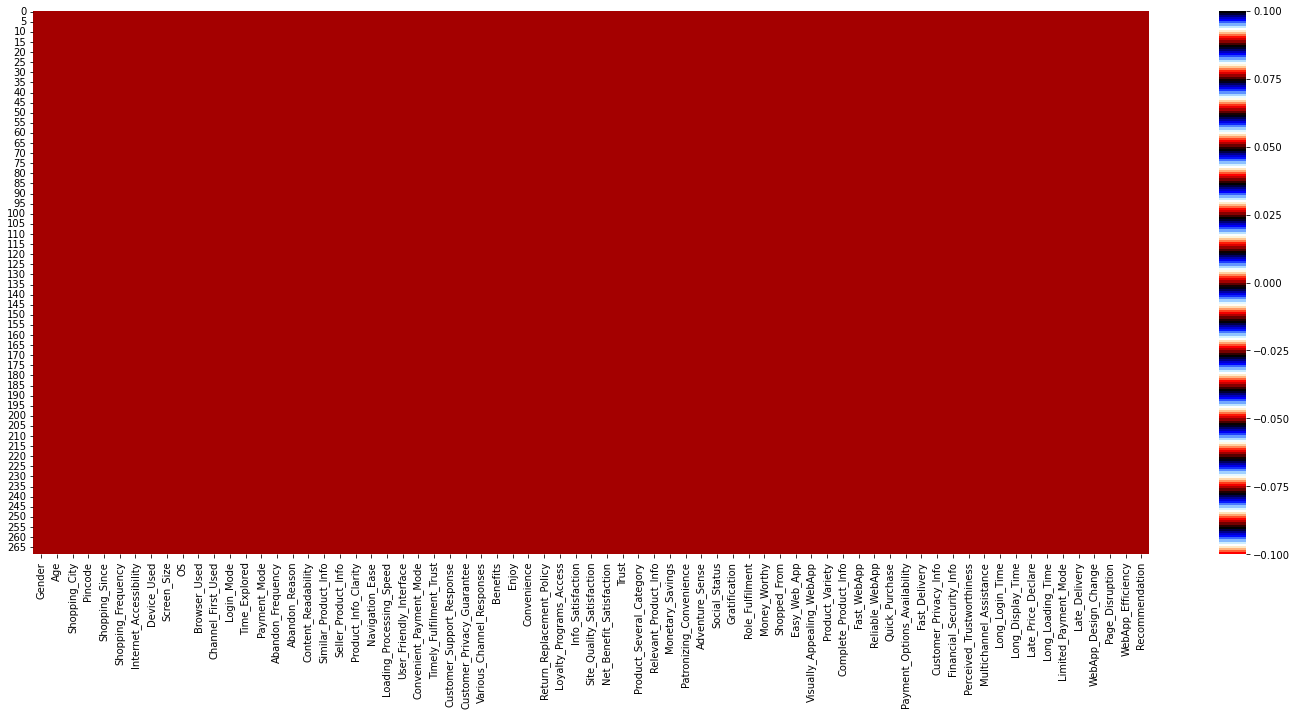

In [14]:
# Let's visualize the null values clearly
plt.figure(figsize=(25,10))
sns.heatmap(df.isnull(),cmap="flag")
plt.show()

In [15]:
#find duplicates
df.duplicated().sum()

166

In [16]:
#Duplicate removal
df.drop_duplicates(inplace=True)

In [17]:
#checking if duplicates have been removed
df.duplicated().sum()

0

In [18]:
# Checking the value counts of each columns
for i in df.columns:
        print(df[i].value_counts())
        print('*'*100)

Female    66
Male      37
Name: Gender, dtype: int64
****************************************************************************************************
21-30 years           32
31-40 years           30
41-50 yaers           29
Less than 20 years     6
51 years and above     6
Name: Age, dtype: int64
****************************************************************************************************
Delhi            22
Greater Noida    17
Bangalore        17
Noida            17
Karnal           11
Merrut            5
Ghaziabad         5
Solan             4
Gurgaon           3
Moradabad         1
Bulandshahr       1
Name: Shopping_City, dtype: int64
****************************************************************************************************
201308    13
132001     7
110044     7
201310     6
250001     5
132036     4
560037     4
201305     3
110008     3
201306     3
560010     3
201312     3
110011     3
110042     2
201303     2
560018     2
173212     2
201304     2
560002 

In [19]:
# Replacing 42 times and above by 41 times and above in the column Shopping_Frequency
df["Shopping_Frequency"]=df["Shopping_Frequency"].replace('42 times and above','41 times and above')

# Replacing Mobile internet by Mobile Internet in the column Internet_Accessibility
df["Internet_Accessibility"]=df["Internet_Accessibility"].replace('Mobile internet','Mobile Internet')

# Replacing Very frequently by Frequently in the column Abandon_Frequency
df["Abandon_Frequency"]=df["Abandon_Frequency"].replace('Very frequently','Frequently')

In [20]:
# Replacing Strongly agree (5) by Agree (4) in the column Content_Readability
df["Content_Readability"]=df["Content_Readability"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly agree (5) by Agree (4) in the column Similar_Product_Info
df["Similar_Product_Info"]=df["Similar_Product_Info"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly agree (5) by Agree (4) and strongly disagree by dis-agree in the column Seller_Product_Info
df["Seller_Product_Info"]=df["Seller_Product_Info"].replace('Strongly disagree (1)','Dis-agree (2)')
df["Seller_Product_Info"]=df["Seller_Product_Info"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly agree (5) by Agree (4) and Strongly disagree (1) by Dis-agree(2) in the column Product_Info_Clarity
df["Product_Info_Clarity"]=df["Product_Info_Clarity"].replace('Strongly disagree (1)','Dis-agree (2)')
df["Product_Info_Clarity"]=df["Product_Info_Clarity"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly disagree (1) by Dis-agree(2) and Strongly agree (5) by Agree (4) in the column Navigation_Ease
df["Navigation_Ease"]=df["Navigation_Ease"].replace('Strongly disagree (1)','Dis-agree (2)')
df["Navigation_Ease"]=df["Navigation_Ease"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly disagree (1) by Dis-agree(2) and Strongly agree (5) by Agree (4) in the column Loading_Processing_Speed
df["Loading_Processing_Speed"]=df["Loading_Processing_Speed"].replace('Strongly disagree (1)','Dis-agree (2)')
df["Loading_Processing_Speed"]=df["Loading_Processing_Speed"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly disagree (1) by Dis-agree(2) and Strongly agree (5) by Agree (4) in the column User_Friendly_Interface
df["User_Friendly_Interface"]=df["User_Friendly_Interface"].replace('Strongly disagree (1)','Dis-agree (2)')
df["User_Friendly_Interface"]=df["User_Friendly_Interface"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly agree (5) by Agree (4) in the column Convenient_Payment_Mode
df["Convenient_Payment_Mode"]=df["Convenient_Payment_Mode"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly agree (5) by Agree (4) in the column Timely_Fulfilment_Trust
df["Timely_Fulfilment_Trust"]=df["Timely_Fulfilment_Trust"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly agree (5) by Agree (4) in the column Customer_Support_Response
df["Customer_Support_Response"]=df["Customer_Support_Response"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly agree (5) by Agree (4) in the column Customer_Privacy_Guarantee
df["Customer_Privacy_Guarantee"]=df["Customer_Privacy_Guarantee"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly agree (5) by Agree (4) in the column Various_Channel_Responses
df["Various_Channel_Responses"]=df["Various_Channel_Responses"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly disagree (1) by Dis-agree(2) Strongly agree (5) by Agree (4) in the column Benefits
df["Benefits"]=df["Benefits"].replace('Strongly disagree (1)','Dis-agree (2)')
df["Benefits"]=df["Benefits"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly disagree (1) by Dis-agree(2) and Strongly agree (5) by Agree (4) in the column Enjoy
df["Enjoy"]=df["Enjoy"].replace('Strongly disagree (1)','Dis-agree (2)')
df["Enjoy"]=df["Enjoy"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly agree (5) by Agree (4) in the column Convenience
df["Convenience"]=df["Convenience"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly agree (5) by Agree (4) in the column Return_Replacement_Policy
df["Return_Replacement_Policy"]=df["Return_Replacement_Policy"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly disagree (1) by Dis-agree(2) and Strongly agree (5) by Agree (4) in the column Loyalty_Programs_Access
df["Loyalty_Programs_Access"]=df["Loyalty_Programs_Access"].replace('Strongly disagree (1)','Dis-agree (2)')
df["Loyalty_Programs_Access"]=df["Loyalty_Programs_Access"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly agree (5) by Agree (4) in the column Info_Satisfaction
df["Info_Satisfaction"]=df["Info_Satisfaction"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly agree (5) by Agree (4) in the column Site_Quality_Satisfaction
df["Site_Quality_Satisfaction"]=df["Site_Quality_Satisfaction"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly agree (5) by Agree (4) in the column Net_Benefit_Satisfaction
df["Net_Benefit_Satisfaction"]=df["Net_Benefit_Satisfaction"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly disagree (1) by Dis-agree(2) and Strongly agree (5) by Agree (4) in the column Trust
df["Trust"]=df["Trust"].replace('Strongly disagree (1)','Dis-agree (2)')
df["Trust"]=df["Trust"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly agree (5) by Agree (4) in the column Product_Several_Category
df["Product_Several_Category"]=df["Product_Several_Category"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly agree (5) by Agree (4) in the column Relevant_Product_Info
df["Relevant_Product_Info"]=df["Relevant_Product_Info"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly agree (5) by Agree (4) in the column Monetary_Savings
df["Monetary_Savings"]=df["Monetary_Savings"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly agree (5) by Agree (4) in the column Patronizing_Convenience
df["Patronizing_Convenience"]=df["Patronizing_Convenience"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly disagree (1) by Dis-agree(2) and Strongly agree (5) by Agree (4) in the column Adventure_Sense
df["Adventure_Sense"]=df["Adventure_Sense"].replace('Strongly disagree (1)','Dis-agree (2)')
df["Adventure_Sense"]=df["Adventure_Sense"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly disagree (1) by Dis-agree(2) and Strongly agree (5) by Agree (4) in the column Social_Status
df["Social_Status"]=df["Social_Status"].replace('Strongly disagree (1)','Dis-agree (2)')
df["Social_Status"]=df["Social_Status"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly disagree (1) by Dis-agree(2) and Strongly agree (5) by Agree (4) in the column Gratification
df["Gratification"]=df["Gratification"].replace('Strongly disagree (1)','Disagree (2)')
df["Gratification"]=df["Gratification"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly disagree (1) by Dis-agree(2) and Strongly agree (5) by Agree (4) in the column Role_Fulfilment
df["Role_Fulfilment"]=df["Role_Fulfilment"].replace('Strongly disagree (1)','Dis-agree (2)')
df["Role_Fulfilment"]=df["Role_Fulfilment"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly agree (5) by Agree (4) in the column Money_Worthy
df["Money_Worthy"]=df["Money_Worthy"].replace('Strongly agree (5)','Agree (4)')

In [21]:
df.head()

Gender          Age  Shopping_City  Pincode Shopping_Since  \
0    Male  31-40 years          Delhi   110009  Above 4 years   
1  Female  21-30 years          Delhi   110030  Above 4 years   
2  Female  21-30 years  Greater Noida   201308      3-4 years   
3    Male  21-30 years        Karnal    132001      3-4 years   
4  Female  21-30 years     Bangalore    530068      2-3 years   

   Shopping_Frequency Internet_Accessibility Device_Used Screen_Size  \
0         31-40 times                Dial-up     Desktop      Others   
1  41 times and above                  Wi-Fi  Smartphone  4.7 inches   
2  41 times and above        Mobile Internet  Smartphone  5.5 inches   
3  Less than 10 times        Mobile Internet  Smartphone  5.5 inches   
4         11-20 times                  Wi-Fi  Smartphone  4.7 inches   

                      OS   Browser_Used Channel_First_Used       Login_Mode  \
0  Window/windows Mobile  Google chrome      Search Engine    Search Engine   
1                IOS/Mac  Google chrome      Search Engine  Via application   
2                Android  Google chrome      Search Engine  Via application   
3                IOS/Mac         Safari      Search Engine    Search Engine   
4                IOS/Mac         Safari  Content Marketing  Via application   

       Time_Explored                        Payment_Mode Abandon_Frequency  \
0          6-10 mins  E-wallets (Paytm, Freecharge etc.)         Sometimes   
1  more than 15 mins                  Credit/Debit cards        Frequently   
2         11-15 mins  E-wallets (Paytm, Freecharge etc.)         Sometimes   
3          6-10 mins                  Credit/Debit cards             Never   
4  more than 15 mins                  Credit/Debit cards        Frequently   

              Abandon_Reason Content_Readability Similar_Product_Info  \
0              Lack of trust           Agree (4)      Indifferent (3)   
1  Promo code not applicable           Agree (4)            Agree (4)   
2  Promo code not applicable           Agree (4)            Agree (4)   
3   Better alternative offer           Agree (4)            Agree (4)   
4   Better alternative offer           Agree (4)      Indifferent (3)   

  Seller_Product_Info Product_Info_Clarity Navigation_Ease  \
0     Indifferent (3)            Agree (4)       Agree (4)   
1           Agree (4)            Agree (4)       Agree (4)   
2           Agree (4)            Agree (4)       Agree (4)   
3     Indifferent (3)            Agree (4)       Agree (4)   
4     Indifferent (3)            Agree (4)       Agree (4)   

  Loading_Processing_Speed User_Friendly_Interface Convenient_Payment_Mode  \
0            Dis-agree (2)           Dis-agree (2)           Dis-agree (2)   
1                Agree (4)               Agree (4)               Agree (4)   
2                Agree (4)               Agree (4)               Agree (4)   
3                Agree (4)               Agree (4)               Agree (4)   
4                Agree (4)               Agree (4)               Agree (4)   

  Timely_Fulfilment_Trust Customer_Support_Response  \
0            Disagree (2)                 Agree (4)   
1               Agree (4)                 Agree (4)   
2               Agree (4)                 Agree (4)   
3               Agree (4)                 Agree (4)   
4               Agree (4)                 Agree (4)   

  Customer_Privacy_Guarantee Various_Channel_Responses         Benefits  \
0                  Agree (4)                 Agree (4)  indifferent (3)   
1                  Agree (4)                 Agree (4)        Agree (4)   
2                  Agree (4)                 Agree (4)        Agree (4)   
3                  Agree (4)                 Agree (4)        Agree (4)   
4                  Agree (4)                 Agree (4)        Agree (4)   

             Enjoy      Convenience Return_Replacement_Policy  \
0    Dis-agree (2)    Dis-agree (2)             Dis-agree (2)   
1        Agree (4)        Agree (4)       

# Dataset Description

In [22]:
# Statistical summary of dataset
df.describe()

Pincode
count     103.000000
mean   232449.844660
std    150755.596481
min    110008.000000
25%    132001.000000
50%    201305.000000
75%    202156.500000
max    560037.000000

# Data Visualization

# Univariate Analysis

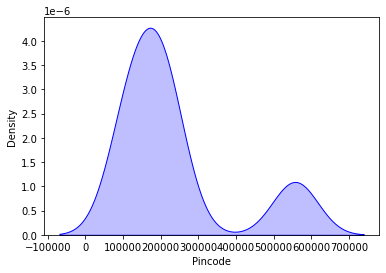

In [23]:
sns.distplot(df["Pincode"],color="b",kde_kws={"shade": True},hist=False)
plt.show()

# Pie plots

Pie plot for the column: Gender
Female    66
Male      37
Name: Gender, dtype: int64


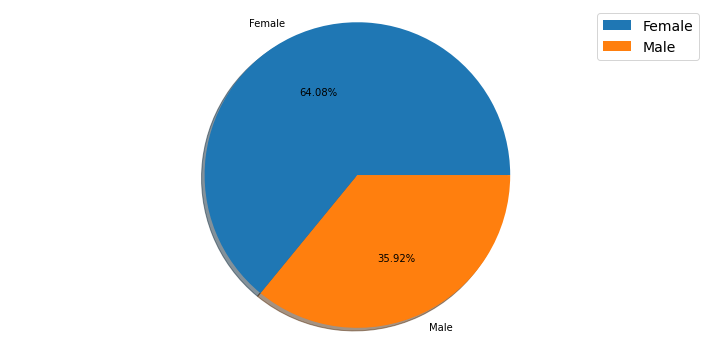

*****************************************************************************************************************************
Pie plot for the column: Age
21-30 years           32
31-40 years           30
41-50 yaers           29
Less than 20 years     6
51 years and above     6
Name: Age, dtype: int64


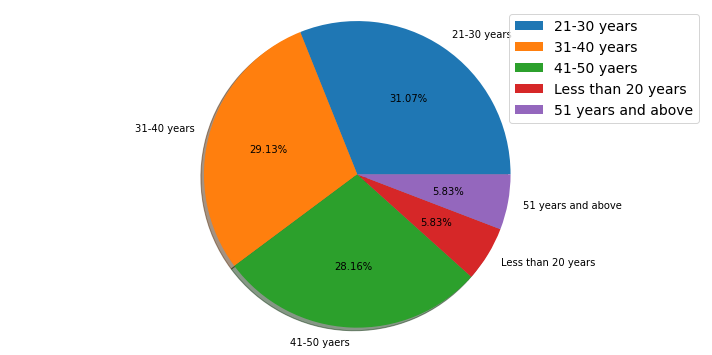

*****************************************************************************************************************************
Pie plot for the column: Internet_Accessibility
Mobile Internet    81
Wi-Fi              21
Dial-up             1
Name: Internet_Accessibility, dtype: int64


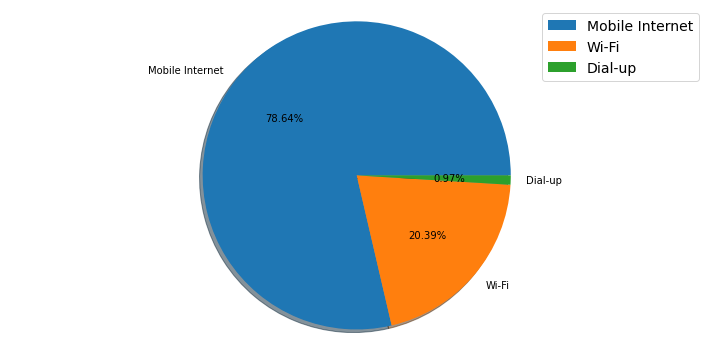

*****************************************************************************************************************************
Pie plot for the column: OS
Window/windows Mobile    46
Android                  30
IOS/Mac                  27
Name: OS, dtype: int64


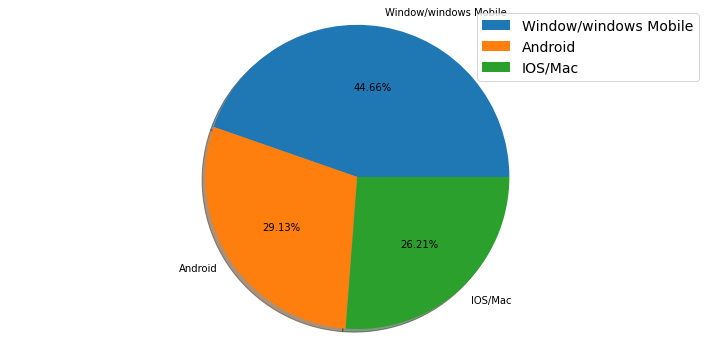

*****************************************************************************************************************************
Pie plot for the column: Channel_First_Used
Search Engine        86
Content Marketing    10
Display Adverts       7
Name: Channel_First_Used, dtype: int64


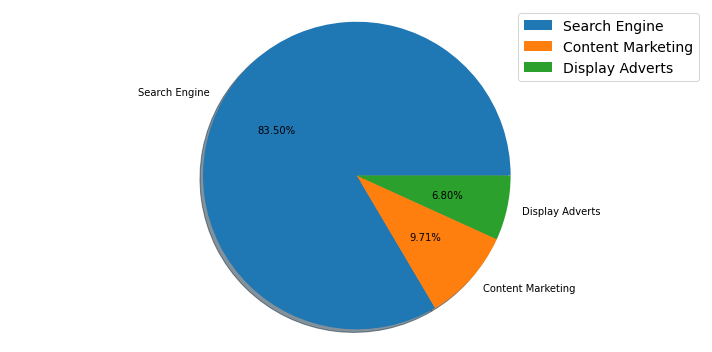

*****************************************************************************************************************************
Pie plot for the column: Payment_Mode
Credit/Debit cards                    59
Cash on delivery (CoD)                25
E-wallets (Paytm, Freecharge etc.)    19
Name: Payment_Mode, dtype: int64


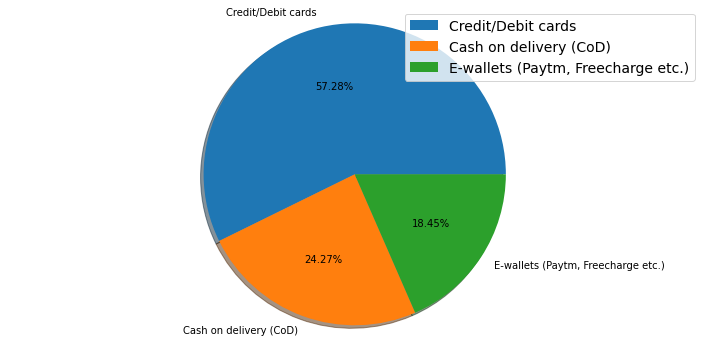

*****************************************************************************************************************************
Pie plot for the column: Convenient_Payment_Mode
Agree (4)        90
Dis-agree (2)    13
Name: Convenient_Payment_Mode, dtype: int64


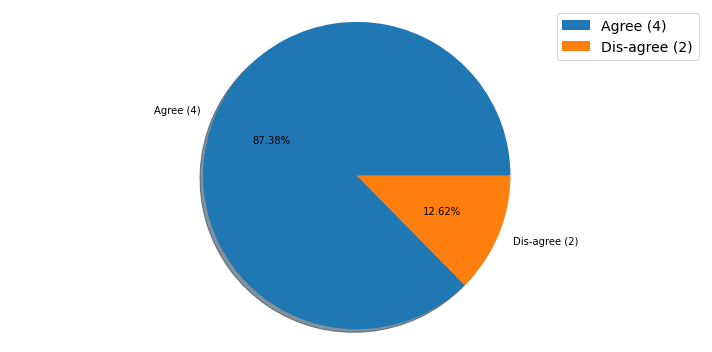

*****************************************************************************************************************************
Pie plot for the column: Customer_Privacy_Guarantee
Agree (4)          93
indifferent (3)    10
Name: Customer_Privacy_Guarantee, dtype: int64


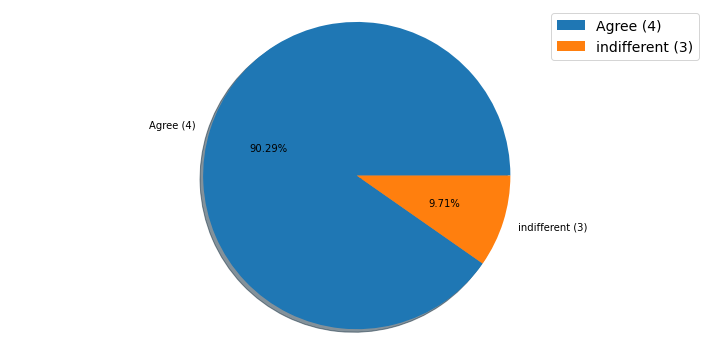

*****************************************************************************************************************************
Pie plot for the column: Benefits
Agree (4)          74
indifferent (3)    16
Dis-agree (2)      13
Name: Benefits, dtype: int64


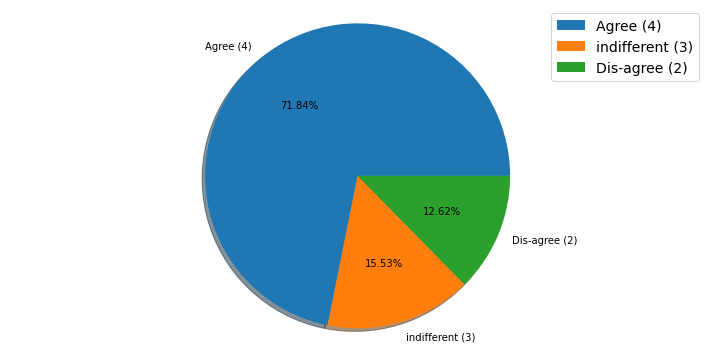

*****************************************************************************************************************************
Pie plot for the column: Enjoy
Agree (4)          57
indifferent (3)    27
Dis-agree (2)      19
Name: Enjoy, dtype: int64


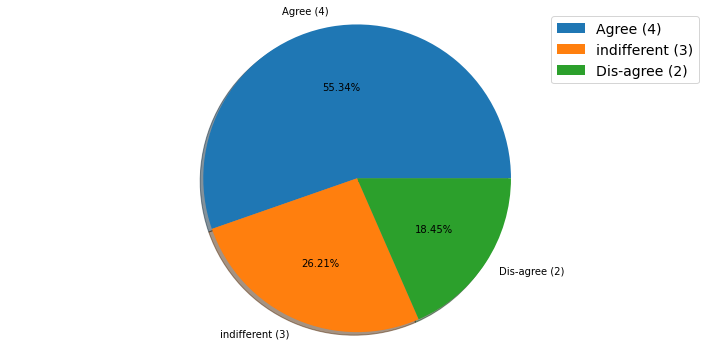

*****************************************************************************************************************************
Pie plot for the column: Return_Replacement_Policy
Agree (4)        96
Dis-agree (2)     7
Name: Return_Replacement_Policy, dtype: int64


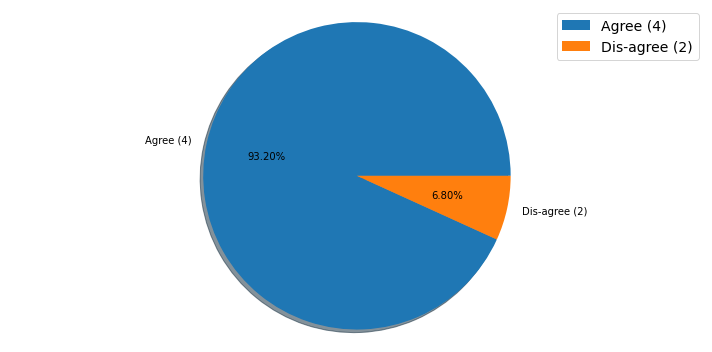

*****************************************************************************************************************************
Pie plot for the column: Loyalty_Programs_Access
Agree (4)          68
indifferent (3)    22
Dis-agree (2)      13
Name: Loyalty_Programs_Access, dtype: int64


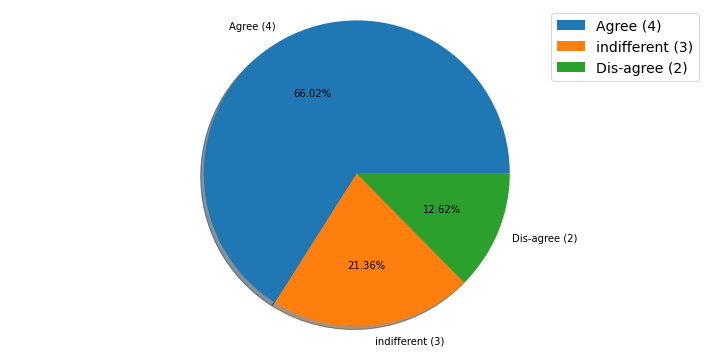

*****************************************************************************************************************************
Pie plot for the column: Info_Satisfaction
Agree (4)          80
indifferent (3)    23
Name: Info_Satisfaction, dtype: int64


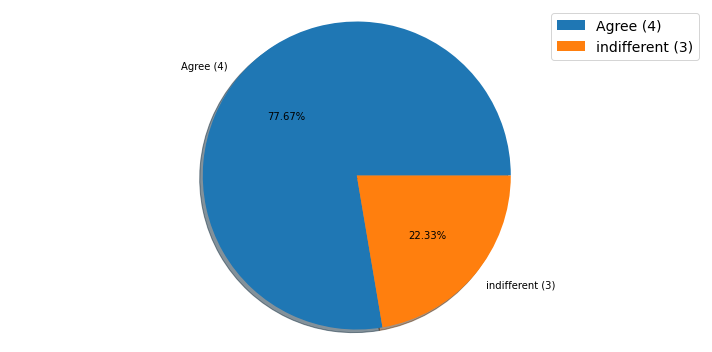

*****************************************************************************************************************************
Pie plot for the column: Site_Quality_Satisfaction
Agree (4)        101
Dis-agree (2)      2
Name: Site_Quality_Satisfaction, dtype: int64


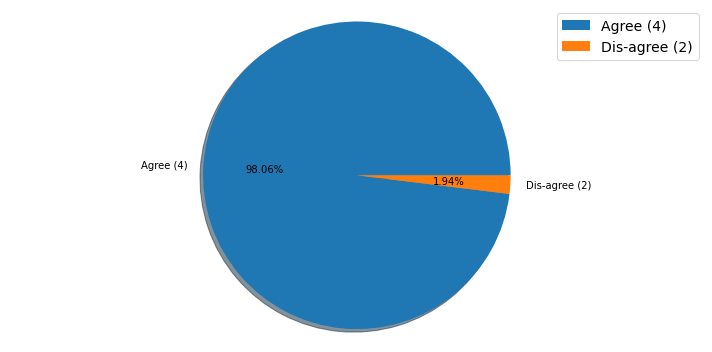

*****************************************************************************************************************************
Pie plot for the column: Net_Benefit_Satisfaction
Agree (4)          83
indifferent (3)    15
Dis-agree (2)       5
Name: Net_Benefit_Satisfaction, dtype: int64


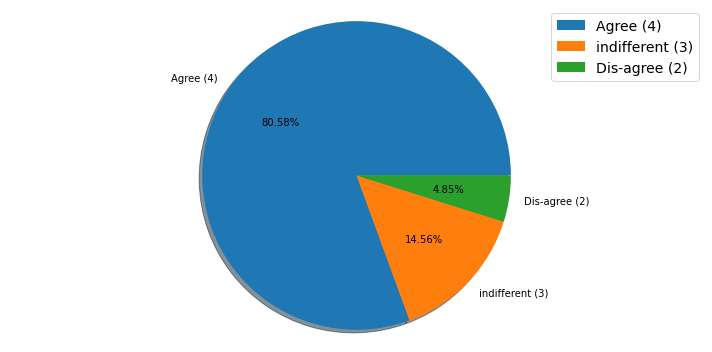

*****************************************************************************************************************************
Pie plot for the column: Trust
Agree (4)          91
Dis-agree (2)      10
indifferent (3)     2
Name: Trust, dtype: int64


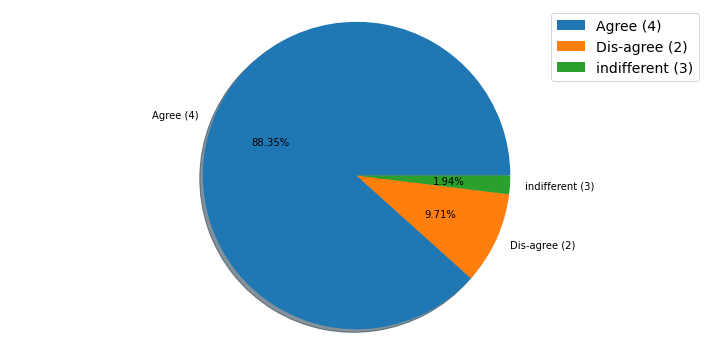

*****************************************************************************************************************************
Pie plot for the column: Monetary_Savings
Agree (4)          86
Disagree (2)       12
indifferent (3)     5
Name: Monetary_Savings, dtype: int64


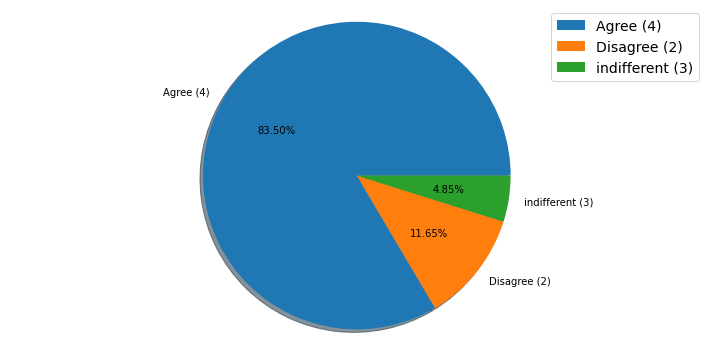

*****************************************************************************************************************************
Pie plot for the column: Patronizing_Convenience
Agree (4)          75
indifferent (3)    28
Name: Patronizing_Convenience, dtype: int64


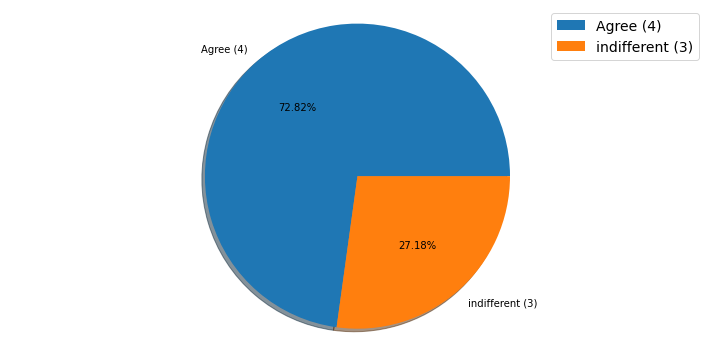

*****************************************************************************************************************************
Pie plot for the column: Adventure_Sense
Agree (4)          62
indifferent (3)    24
Dis-agree (2)      17
Name: Adventure_Sense, dtype: int64


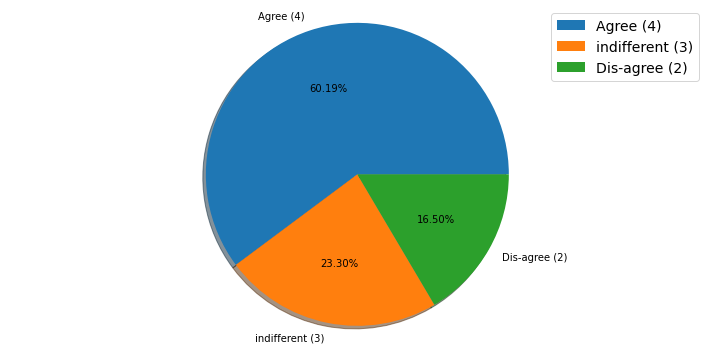

*****************************************************************************************************************************
Pie plot for the column: Social_Status
indifferent (3)    39
Agree (4)          38
Dis-agree (2)      26
Name: Social_Status, dtype: int64


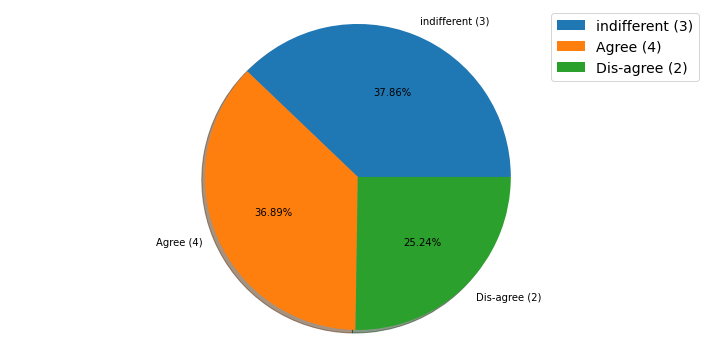

*****************************************************************************************************************************
Pie plot for the column: Gratification
Agree (4)          49
indifferent (3)    38
Disagree (2)       16
Name: Gratification, dtype: int64


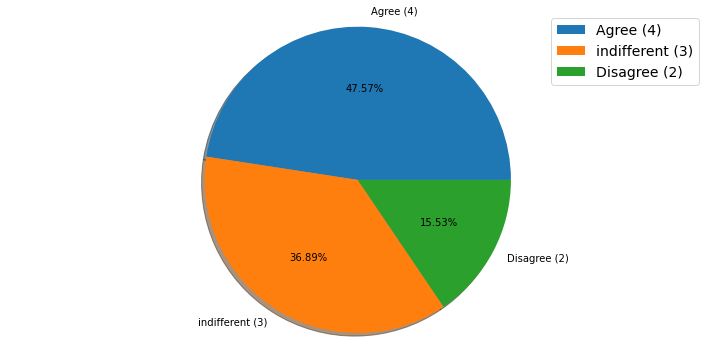

*****************************************************************************************************************************
Pie plot for the column: Money_Worthy
Agree (4)          89
indifferent (3)    14
Name: Money_Worthy, dtype: int64


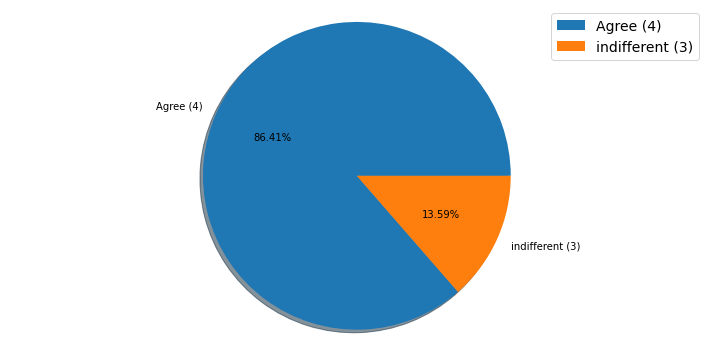

*****************************************************************************************************************************


In [24]:
def generate_pie(i):
    plt.figure(figsize=(10,5))
    plt.pie(i.value_counts(), labels=i.value_counts().index, autopct='%1.2f%%',shadow=True,)
    plt.legend(prop={'size':14})
    plt.axis('equal')
    plt.tight_layout()
    return plt.show()

cols1 = ['Gender', 'Age', 'Internet_Accessibility','OS','Channel_First_Used', 'Payment_Mode','Convenient_Payment_Mode','Customer_Privacy_Guarantee','Benefits','Enjoy','Return_Replacement_Policy','Loyalty_Programs_Access','Info_Satisfaction','Site_Quality_Satisfaction','Net_Benefit_Satisfaction','Trust','Monetary_Savings','Patronizing_Convenience','Adventure_Sense','Social_Status','Gratification','Money_Worthy']

plotnumber=1
for j in df[cols1]:
    print(f"Pie plot for the column:", j)
    print(df[j].value_counts())
    generate_pie(df[j])
    print("*"*125)

Observations:

Gender of respondent: The number of gender of respondent for Female customers have high counts compared to Male customers. That is around 67% of female customers shopped online and only 32% of male customers shopped online.

Age: The count is high for customers whose age is between 31-40 years and they shopped more from the online stores followed by the customers' age between 21-30 years and 41-50 years.

Internet_Accessibility: 70% of the customers access Mobile Internet to for online purchase and 28% of the customers used WiFi to shop online and only 1% of the customers used Dial-up method to shop online.

OS: About 45% of the customers' operating system is Windows/windows Mobile and the count is also high for the same followed by the customers having Android OS.

Channel_First_Used: Around 85.50% of the customers used Search Engine channel to arrive at their favorite online store for the first time.

Payment_Mode: Most of the customers prefer to pay the bill using Credit/Debit cards and some of the customers prefer cash on delivery and very few of customers use E-wallets payment methods.

Convenient_Payment_Mode: 88.85% of the customers agreed to the convenient payment mode and only 11% of the customers disagreed to convenient payment mode method.

Customer_Privacy_Guarantee: Being able to guarantee the privacy of the customer also got 90% agree. That is the customers are concerned about the unauthorized access to their data. Protecting user privacy will enable stores to drive more revenue and gain more customers. Only 9.67% of the customers in neutral state which means they are in confusion whether to agree with this method or not.

Benefits: About 70% of the customers agreed that the online shopping gives monetary benifita and discounts.

Enjoy: 53.90% of the customers agreed that they enjoys online shoppings and only 18% of the customers disagreed.

Return_Replacement_Policy: Around 73% of the customers strongly agree and 19% of the customers agree that the return and replacement policy helps them making purchase decision. It is evident from the fact that the customers actually not liking the products completely, they are just purchasing the products and returning them in case of any dissatisfaction. So it is important for the online shopping websites to make easy return and replacement policy if they want to retain their customers.

Loyalty_Programs_Access: 66% of the customers agrees that gaining access to loyalty programs is a benefit of shopping online.

Info_Satisfaction: 79% of the customers agreed that displaying quality information on the website improves satisfaction of customers since they believe that displaying quality information have significant association with customer satisfaction. And remaining 21% of the customers are in neutral situation.

Site_Quality_Satisfaction: 97% of the customers agreed that they are satisfied while shopping on a good quality website and 3% of the customers disagreed with it.

Net_Benefit_Satisfaction: About 81% of the customers agreed that the net benefit derived from shopping online can lead to users satisfaction.

Trust: 88.85% agreed that the customers satisfaction cannot exists without trust. The companies must learn how to manage the customers' trust.

Monetary_Savings: 82.90% customers agreed to receive monetary savings.The ecommerce company need to know that the best way to sell online is to make the consumer feel that he is saving money doing so. And not just feel, online shopping should result in a lot of saving for the consumer. This saving would automatically get converted into trust and brand equity for the seller. To do this the online companies should offer the best deals and bargains to the consumer through social platforms. If the retailers gives some discounted prices then the customers can make money savings.

Patronizing_Convenience: 71% of the customers agreed that the Convenience of patronizing the online retailer.

Adventure_Sense: 57% of the customers agreed that shopping on the website gives the sense of adventure. The adventures in the shopping websites gives positive activity to experience an amplified enjoyment to the customers while shopping on websites.

Social_Status: Around 39.78% customers agreed that shopping on preferred e-tailer enhances the social status of the customers.

Gratification: 47.58% of the customers agreed that they felt gratified while shopping on their favourite e-tailer.

Money_Worthy: Around 86% of the customers agreed that they are getting value for their money while shopping and 14% of the customers thinks either they are wasting money or getting benefit products from their money.

# Count plots

In [25]:
def value_count(column):
    counts=len(df[column].value_counts())
    if counts<5:
        plt.figure(figsize=(10,6))
    elif counts<10:
        plt.figure(figsize=(10,8))
        plt.xticks(rotation=90)
    elif counts<20:
        plt.figure(figsize=(25,6))
        plt.xticks(rotation=90)
    else:
        plt.figure(figsize=(20,6))
        plt.xticks(rotation=90)
    sns.countplot(x=column,data=df,palette="Dark2")
    plt.show()
    print("*"*125)

Delhi            22
Greater Noida    17
Bangalore        17
Noida            17
Karnal           11
Merrut            5
Ghaziabad         5
Solan             4
Gurgaon           3
Moradabad         1
Bulandshahr       1
Name: Shopping_City, dtype: int64


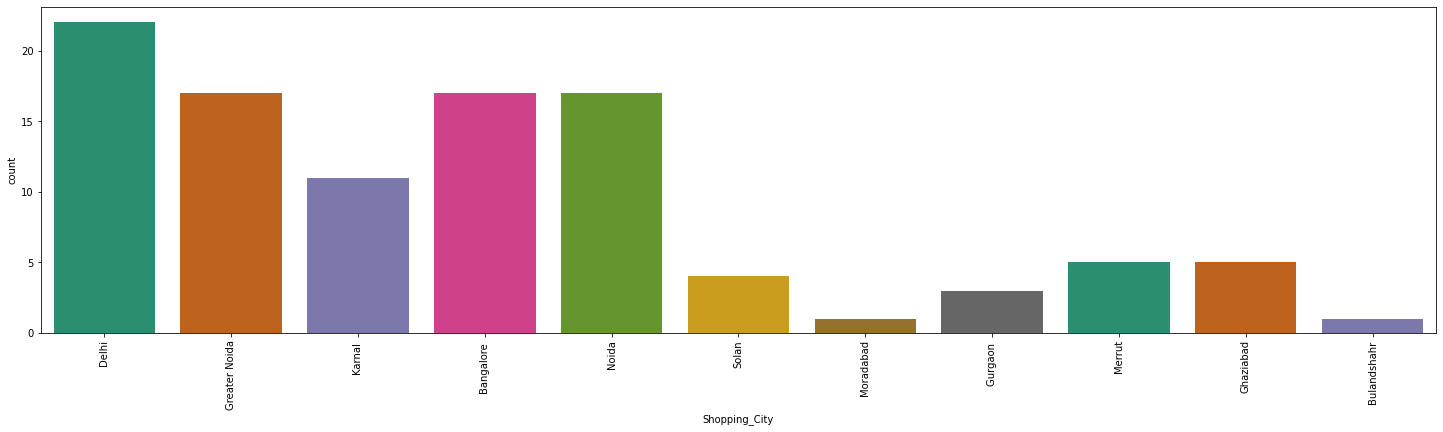

*****************************************************************************************************************************
Above 4 years       39
2-3 years           23
Less than 1 year    18
3-4 years           16
1-2 years            7
Name: Shopping_Since, dtype: int64


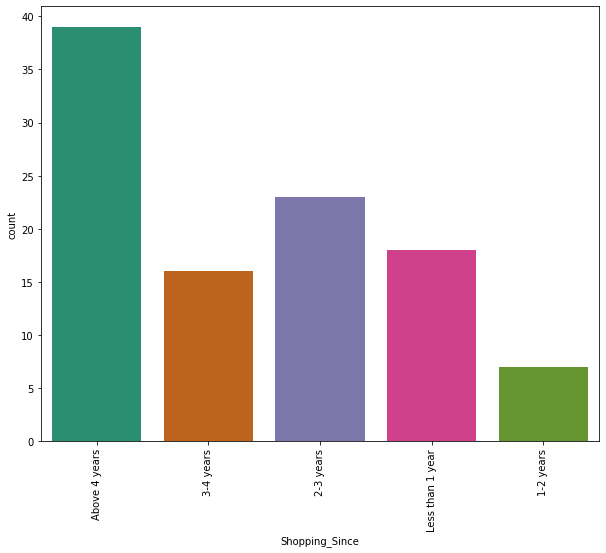

*****************************************************************************************************************************
Less than 10 times    39
31-40 times           24
41 times and above    24
11-20 times           12
21-30 times            4
Name: Shopping_Frequency, dtype: int64


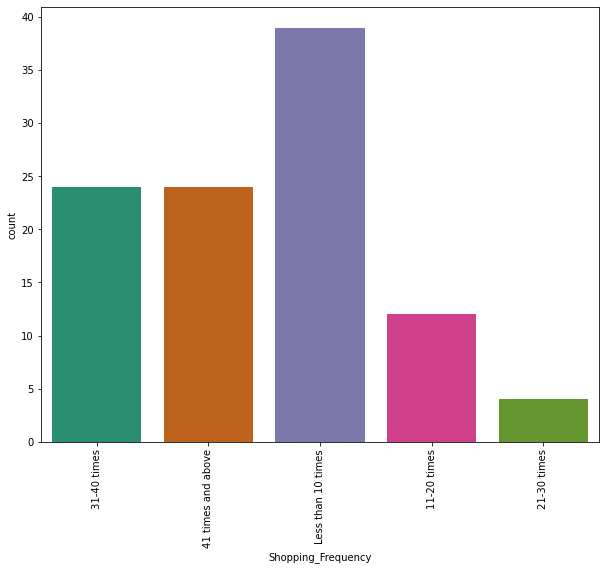

*****************************************************************************************************************************
Smartphone    52
Laptop        32
Desktop       13
Tablet         6
Name: Device_Used, dtype: int64


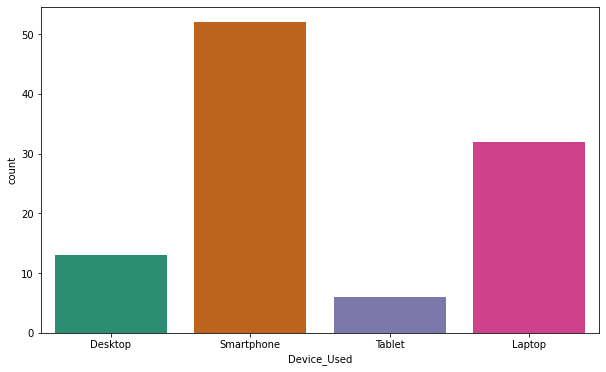

*****************************************************************************************************************************
Others        51
5.5 inches    35
4.7 inches    13
5 inches       4
Name: Screen_Size, dtype: int64


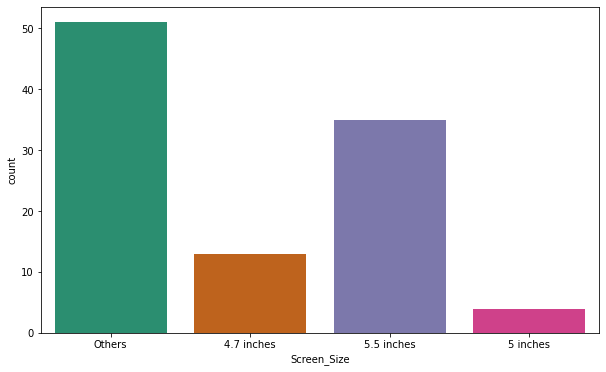

*****************************************************************************************************************************
Google chrome      80
Safari             19
Opera               2
Mozilla Firefox     2
Name: Browser_Used, dtype: int64


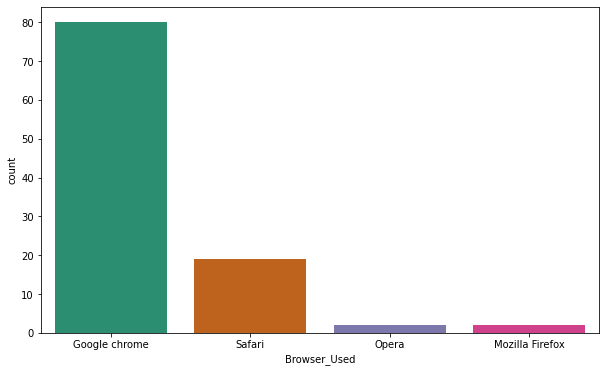

*****************************************************************************************************************************
Via application    34
Search Engine      33
Direct URL         26
E-mail              8
Social Media        2
Name: Login_Mode, dtype: int64


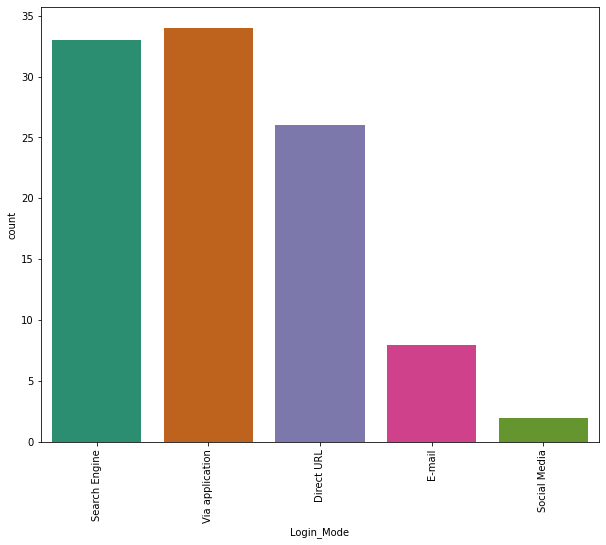

*****************************************************************************************************************************
more than 15 mins    48
6-10 mins            31
11-15 mins           15
1-5 mins              5
Less than 1 min       4
Name: Time_Explored, dtype: int64


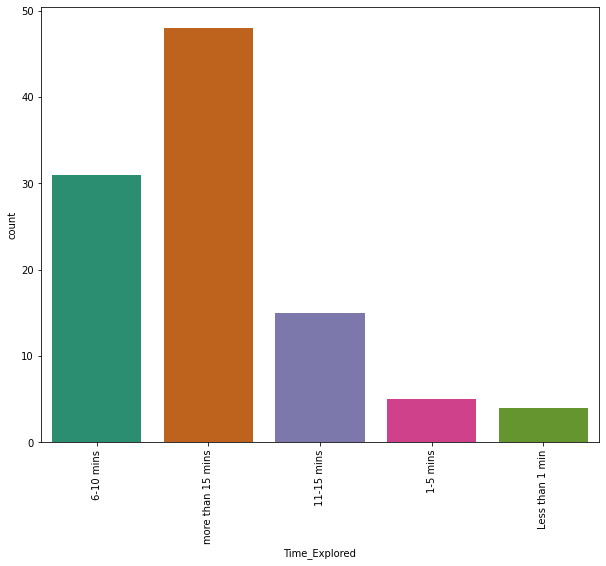

*****************************************************************************************************************************
Sometimes     64
Frequently    22
Never         17
Name: Abandon_Frequency, dtype: int64


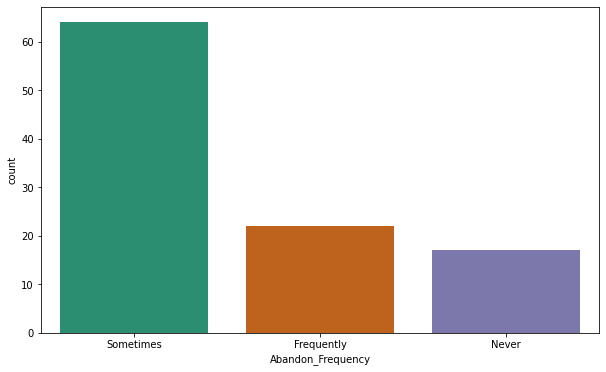

*****************************************************************************************************************************
Better alternative offer        49
Promo code not applicable       21
Change in price                 15
Lack of trust                   13
No preferred mode of payment     5
Name: Abandon_Reason, dtype: int64


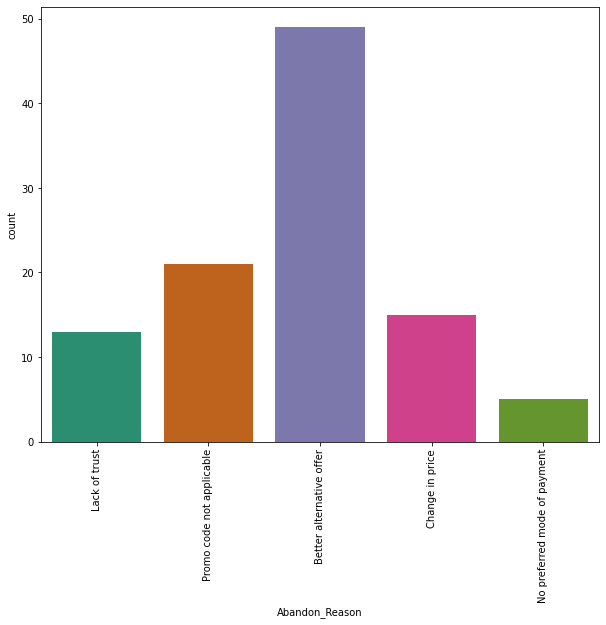

*****************************************************************************************************************************
Agree (4)                93
Strongly disagree (1)     8
Indifferent (3)           2
Name: Content_Readability, dtype: int64


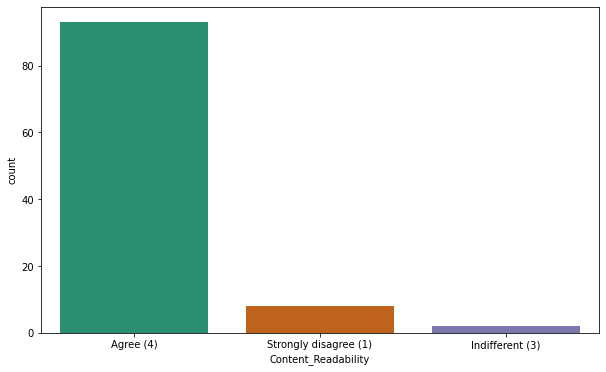

*****************************************************************************************************************************
Agree (4)          75
Indifferent (3)    20
Dis-agree (2)       8
Name: Similar_Product_Info, dtype: int64


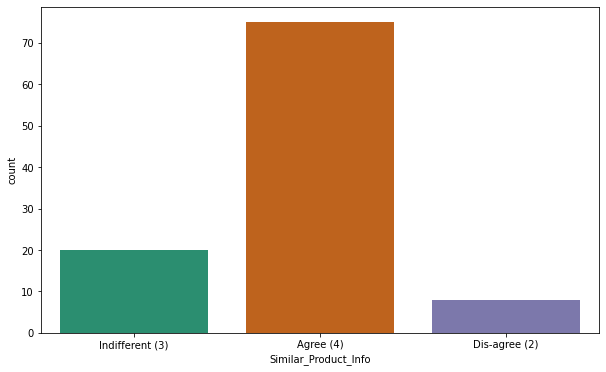

*****************************************************************************************************************************
Agree (4)          68
Indifferent (3)    24
Dis-agree (2)      11
Name: Seller_Product_Info, dtype: int64


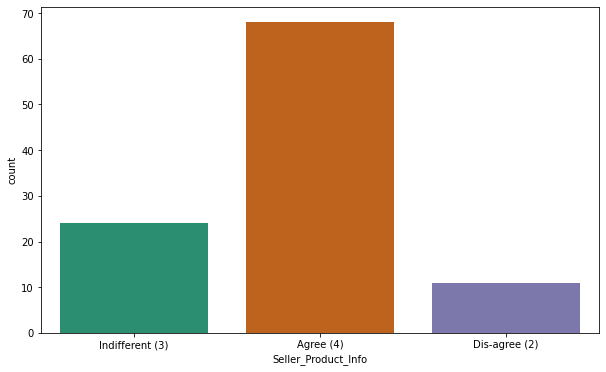

*****************************************************************************************************************************
Agree (4)        91
Dis-agree (2)    12
Name: Product_Info_Clarity, dtype: int64


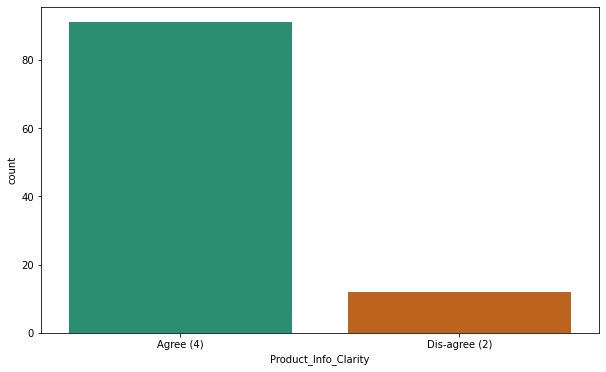

*****************************************************************************************************************************
Agree (4)        93
Dis-agree (2)    10
Name: Navigation_Ease, dtype: int64


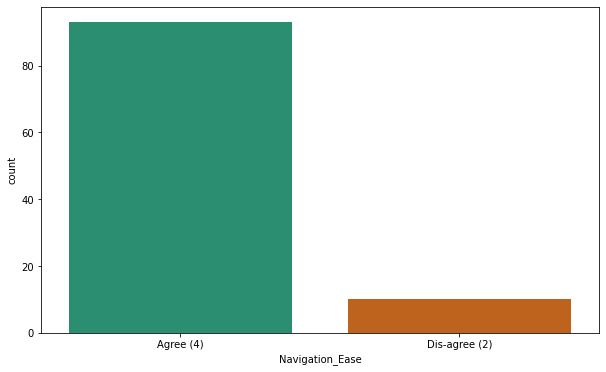

*****************************************************************************************************************************
Agree (4)          86
Dis-agree (2)      13
Indifferent (3)     4
Name: Loading_Processing_Speed, dtype: int64


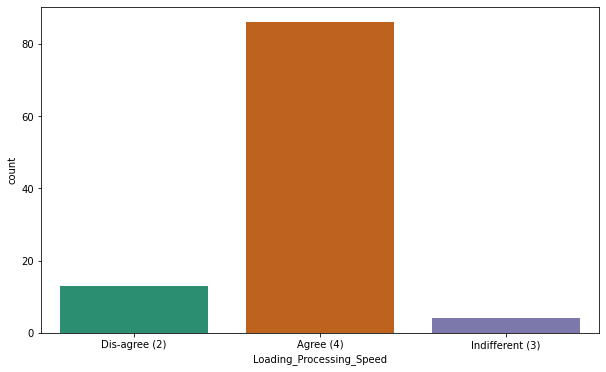

*****************************************************************************************************************************
Agree (4)          88
Dis-agree (2)      13
Indifferent (3)     2
Name: User_Friendly_Interface, dtype: int64


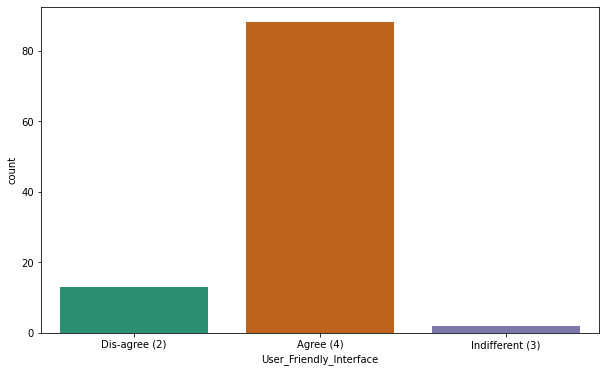

*****************************************************************************************************************************
Agree (4)           86
Disagree (2)        13
indifferent  (3)     4
Name: Timely_Fulfilment_Trust, dtype: int64


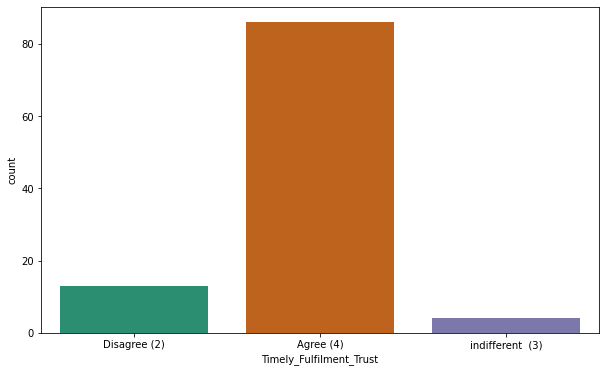

*****************************************************************************************************************************
Agree (4)                91
Strongly disagree (1)     8
indifferent (3)           4
Name: Customer_Support_Response, dtype: int64


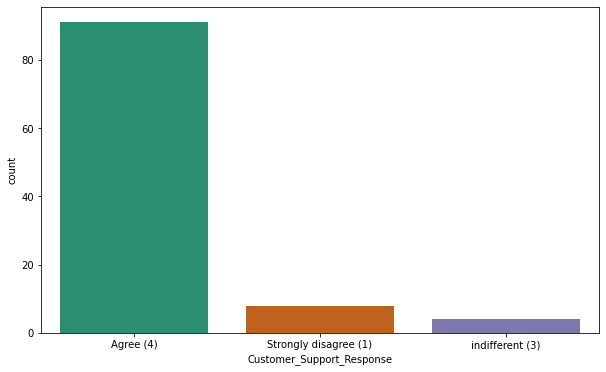

*****************************************************************************************************************************
Agree (4)                95
indifferent (3)           5
Strongly disagree (1)     3
Name: Various_Channel_Responses, dtype: int64


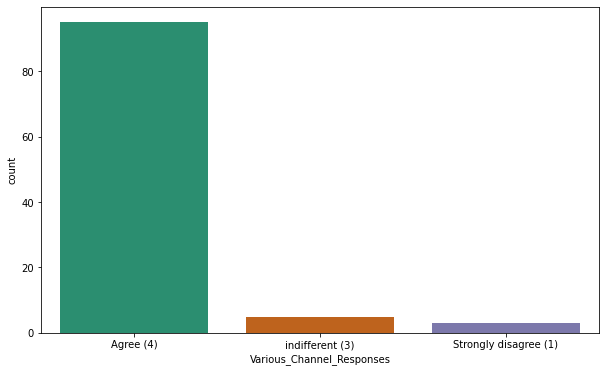

*****************************************************************************************************************************
Agree (4)          85
indifferent (3)    13
Dis-agree (2)       5
Name: Convenience, dtype: int64


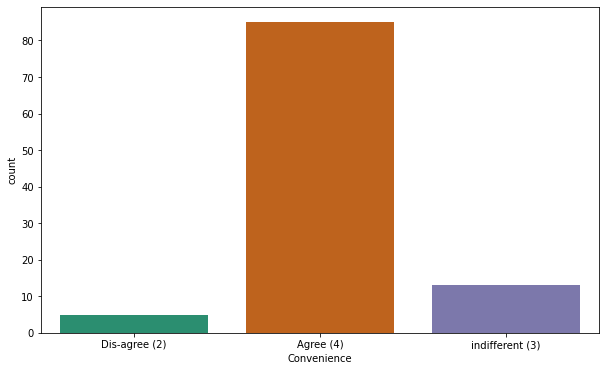

*****************************************************************************************************************************
Agree (4)          81
indifferent (3)    20
Dis-agree (2)       2
Name: Product_Several_Category, dtype: int64


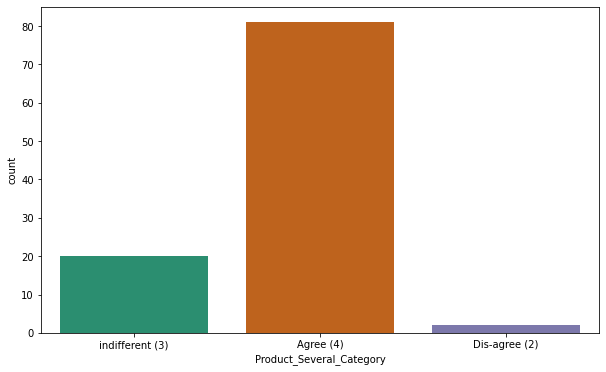

*****************************************************************************************************************************
Agree (4)          89
indifferent (3)    12
Disagree (2)        2
Name: Relevant_Product_Info, dtype: int64


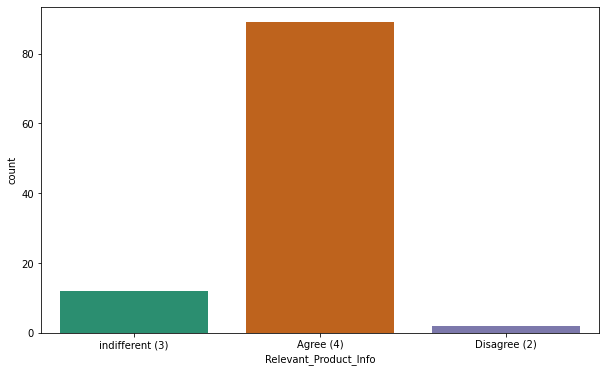

*****************************************************************************************************************************
Agree (4)          45
indifferent (3)    35
Dis-agree (2)      23
Name: Role_Fulfilment, dtype: int64


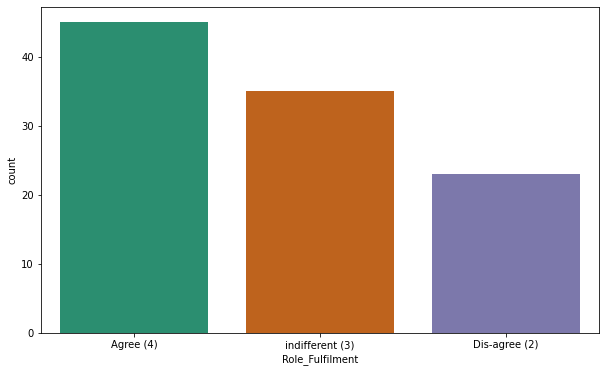

*****************************************************************************************************************************
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    36
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               16
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                12
Amazon.in, Flipkart.com                                         12
Amazon.in, Paytm.com, Myntra.com                                 8
Amazon.in, Flipkart.com, Snapdeal.com                            8
Amazon.in, Paytm.com                                             5
Amazon.in                                                        4
Amazon.in, Flipkart.com, Paytm.com                               2
Name: Shopped_From, dtype: int64


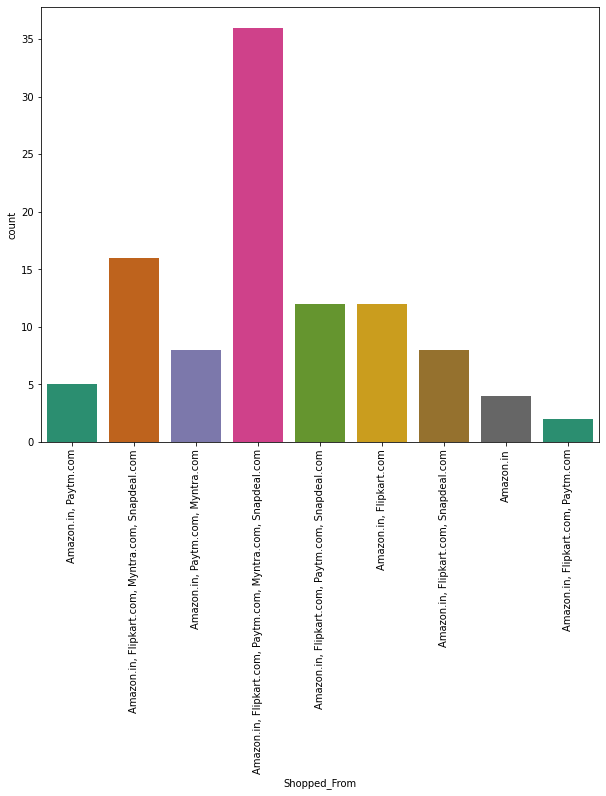

*****************************************************************************************************************************
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    28
Amazon.in, Flipkart.com                                         18
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               16
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                10
Amazon.in, Paytm.com, Myntra.com                                 8
Amazon.in                                                        8
Amazon.in, Flipkart.com, Myntra.com                              6
Paytm.com                                                        5
Amazon.in, Paytm.com                                             2
Flipkart.com                                                     2
Name: Easy_Web_App, dtype: int64


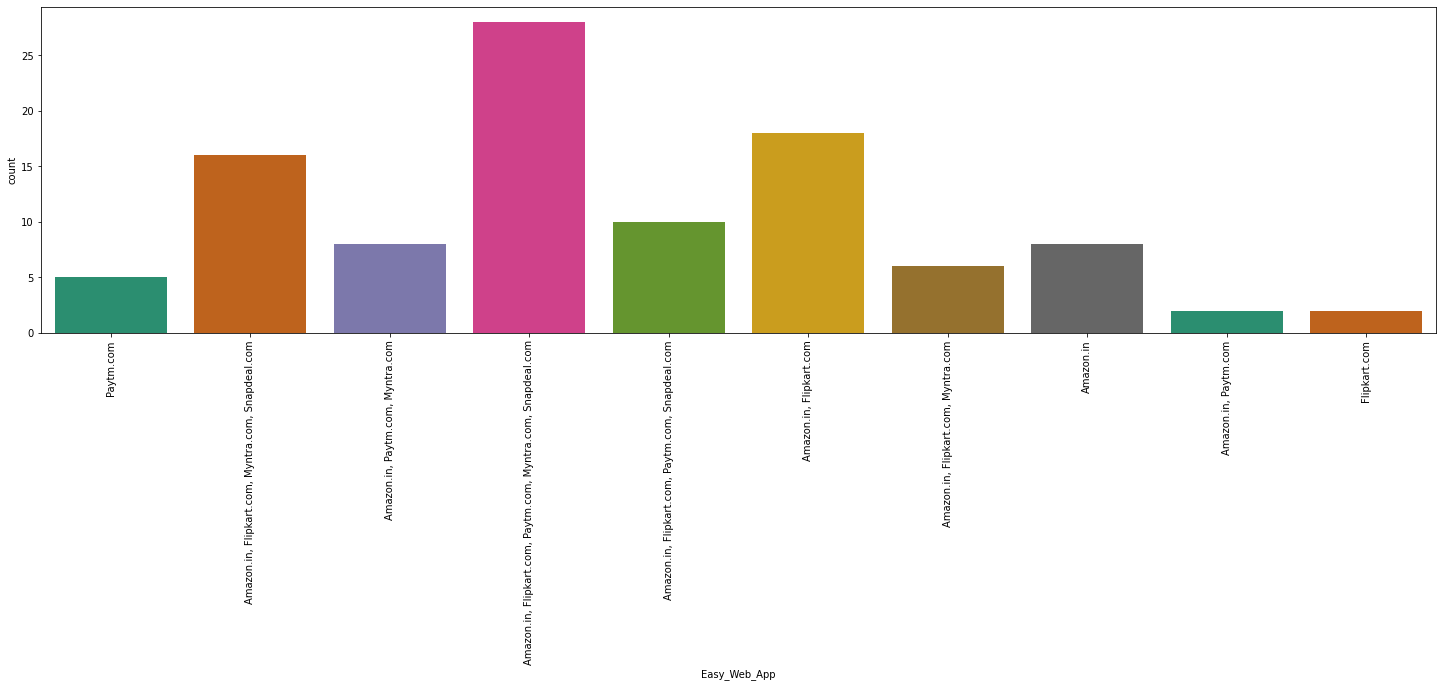

*****************************************************************************************************************************
Amazon.in, Flipkart.com                                         33
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    16
Amazon.in                                                       12
Amazon.in, Paytm.com, Myntra.com                                 8
Myntra.com                                                       8
Amazon.in, Myntra.com                                            6
Flipkart.com                                                     5
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                5
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                 5
Flipkart.com, Myntra.com                                         5
Name: Visually_Appealing_WebApp, dtype: int64


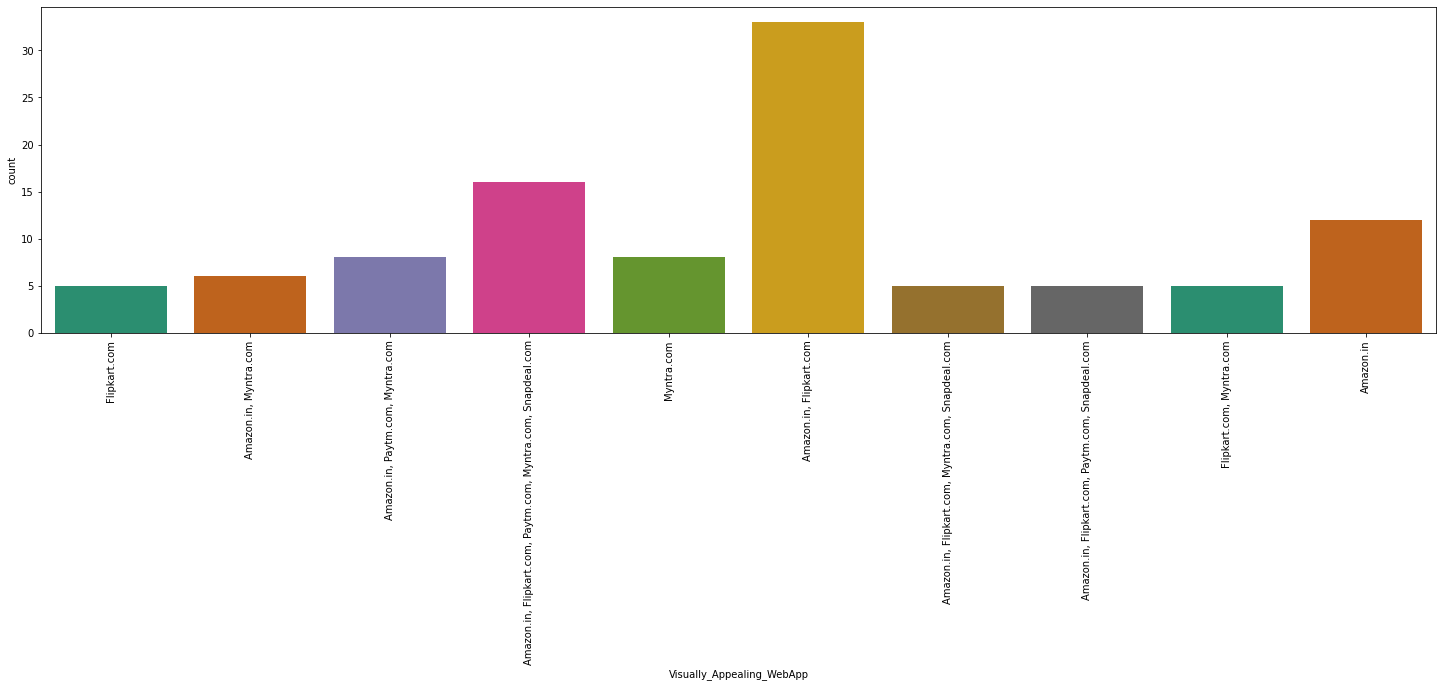

*****************************************************************************************************************************
Amazon.in, Flipkart.com                              50
Amazon.in                                            13
Amazon.in, Myntra.com                                 8
Myntra.com                                            8
Flipkart.com, Myntra.com                              6
Amazon.in, Flipkart.com, Paytm.com                    6
Flipkart.com                                          5
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com     5
Paytm.com                                             2
Name: Product_Variety, dtype: int64


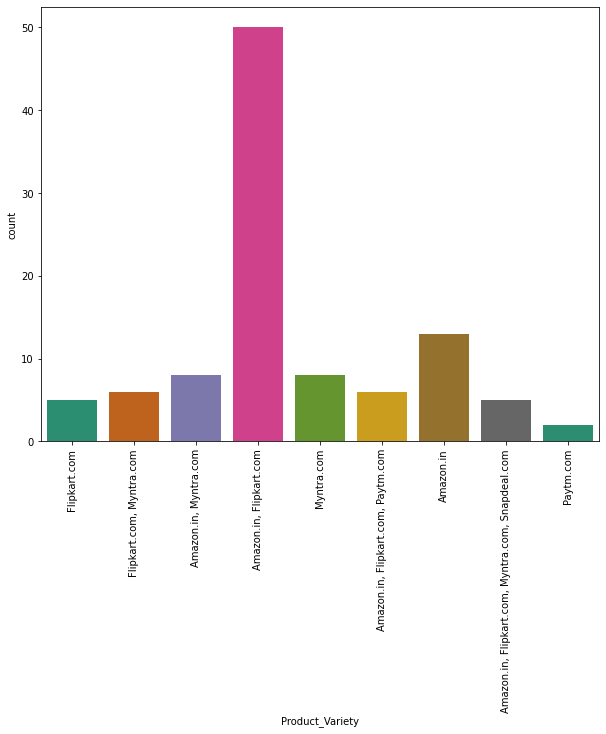

*****************************************************************************************************************************
Amazon.in, Flipkart.com                                         39
Amazon.in                                                       12
Amazon.in, Flipkart.com, Paytm.com                              11
Amazon.in, Paytm.com, Myntra.com                                 8
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com     8
Amazon.in, Flipkart.com, Myntra.com                              6
Snapdeal.com                                                     5
Flipkart.com, Snapdeal.com                                       5
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                5
Amazon.in, Flipkart.com, Snapdeal.com                            2
Flipkart.com                                                     2
Name: Complete_Product_Info, dtype: int64


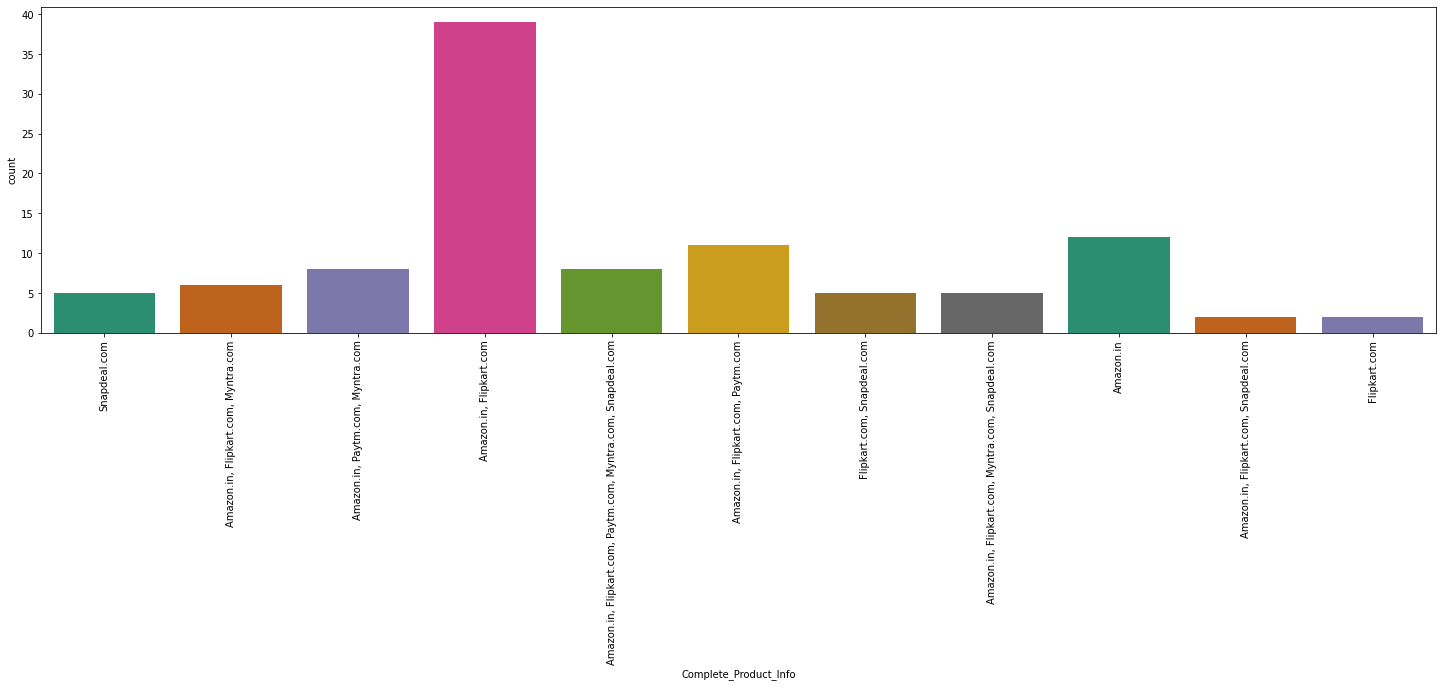

*****************************************************************************************************************************
Amazon.in, Paytm.com                                            19
Amazon.in                                                       18
Amazon.in, Flipkart.com, Myntra.com                             11
Amazon.in, Flipkart.com, Snapdeal.com                           11
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    11
Amazon.in, Flipkart.com                                         11
Amazon.in, Flipkart.com, Paytm.com                              10
Snapdeal.com                                                     5
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                5
Flipkart.com                                                     2
Name: Fast_WebApp, dtype: int64


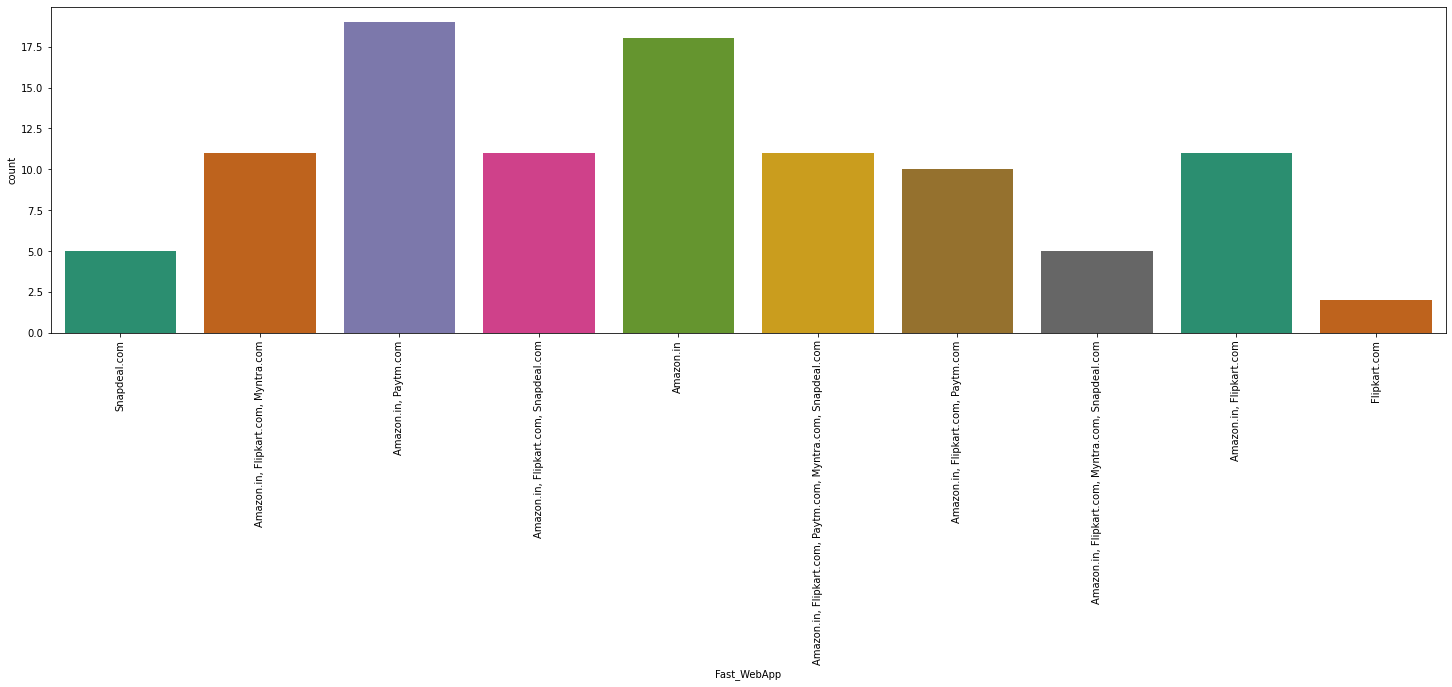

*****************************************************************************************************************************
Amazon.in                                            20
Amazon.in, Flipkart.com                              18
Amazon.in, Paytm.com, Myntra.com                     16
Amazon.in, Flipkart.com, Paytm.com                   16
Amazon.in, Flipkart.com, Snapdeal.com                 7
Myntra.com                                            6
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com      6
Paytm.com                                             5
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com     5
Flipkart.com                                          4
Name: Reliable_WebApp, dtype: int64


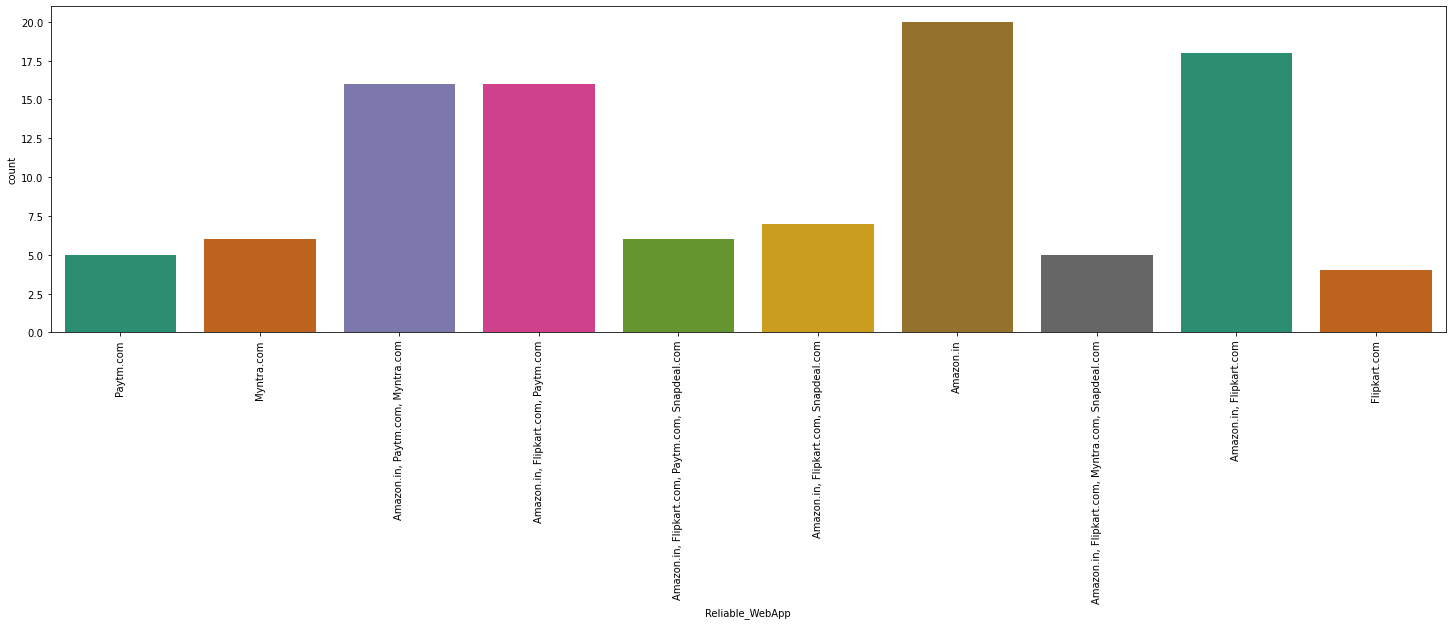

*****************************************************************************************************************************
Amazon.com                                                   22
Amazon.com, Flipkart.com, Paytm.com                          21
Amazon.com, Flipkart.com                                     13
Paytm.com                                                    11
Amazon.com, Flipkart.com, Myntra.com                         11
Amazon.com, Paytm.com, Myntra.com                             8
Amazon.com, Flipkart.com, Paytm.com, Myntra.com, Snapdeal     8
Flipkart.com, Myntra.com, Snapdeal                            5
Flipkart.com                                                  4
Name: Quick_Purchase, dtype: int64


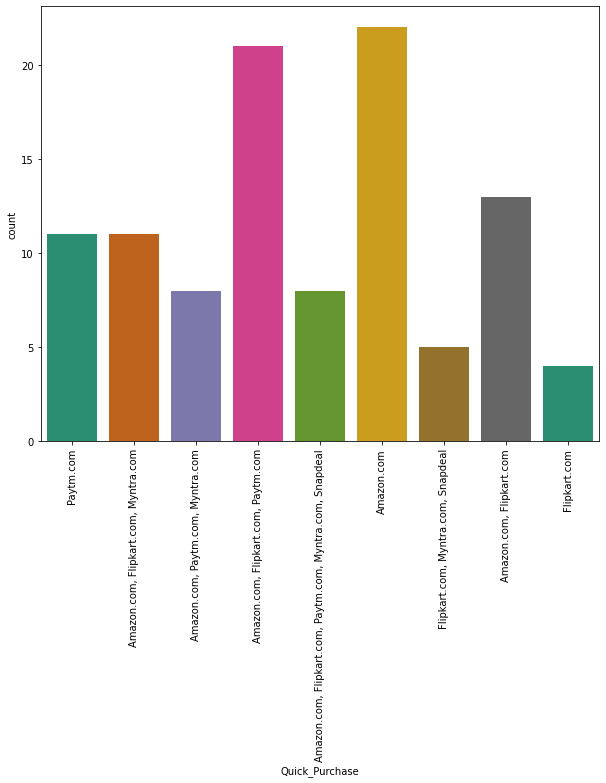

*****************************************************************************************************************************
Amazon.in, Flipkart.com                                         25
Amazon.in, Flipkart.com, Myntra.com                             17
Amazon.in, Flipkart.com, Patym.com, Myntra.com, Snapdeal.com    17
Patym.com, Myntra.com                                            8
Amazon.in, Flipkart.com, Snapdeal.com                            7
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                6
Amazon.in                                                        6
Patym.com                                                        5
Flipkart.com, Myntra.com, Snapdeal.com                           5
Amazon.in, Patym.com                                             5
Flipkart.com                                                     2
Name: Payment_Options_Availability, dtype: int64


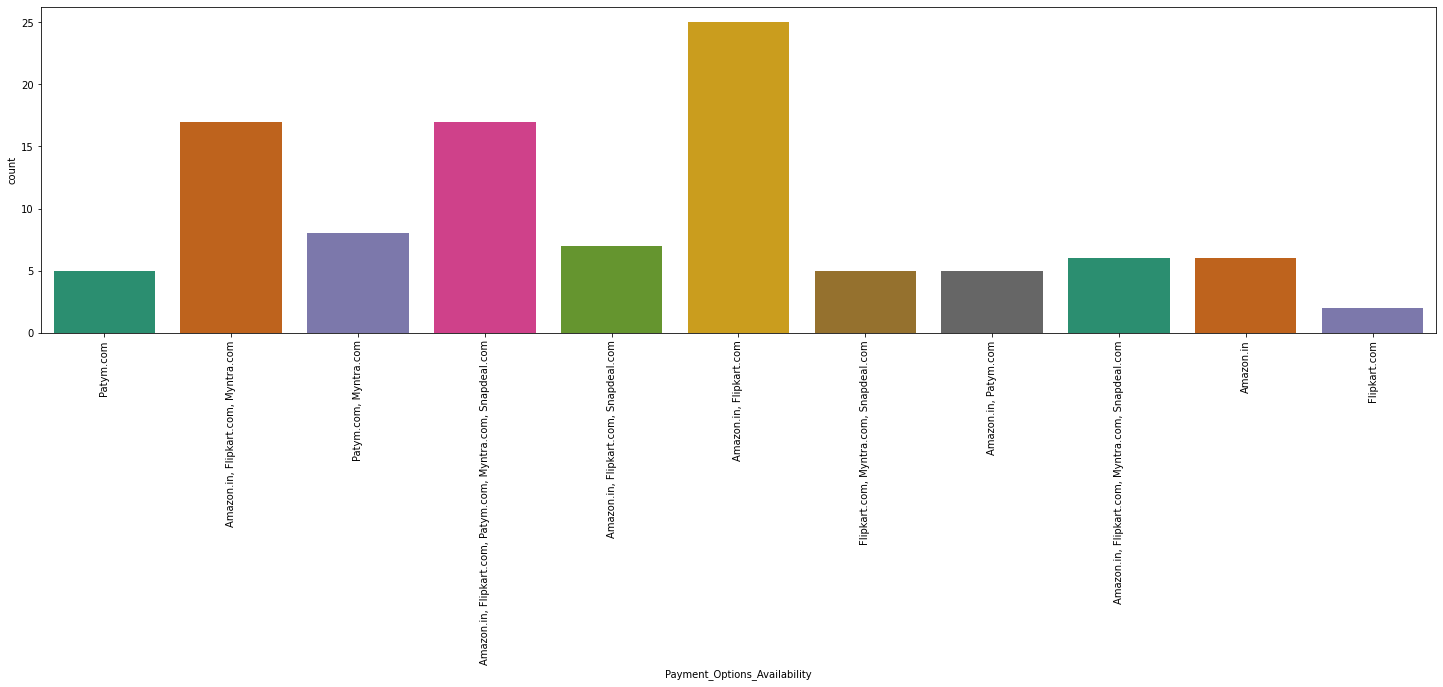

*****************************************************************************************************************************
Amazon.in                                 43
Amazon.in, Flipkart.com                   30
Amazon.in, Flipkart.com, Snapdeal.com     16
Flipkart.com, Myntra.com, Snapdeal.com     5
Amazon.in, Flipkart.com, Myntra.com        5
Flipkart.com                               4
Name: Fast_Delivery, dtype: int64


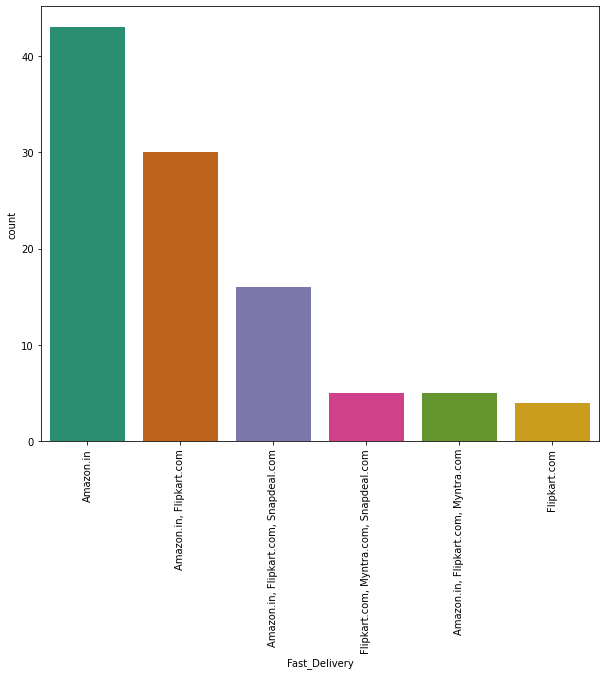

*****************************************************************************************************************************
Amazon.in                                                       24
Amazon.in, Flipkart.com                                         19
Amazon.in, Flipkart.com, Myntra.com                             11
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    11
Amazon.in, Paytm.com                                             8
Paytm.com                                                        8
Myntra.com                                                       6
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                5
Amazon.in, Flipkart.com, Paytm.com                               5
Flipkart.com                                                     4
Amazon.in, Flipkart.com, Snapdeal.com                            2
Name: Customer_Privacy_Info, dtype: int64


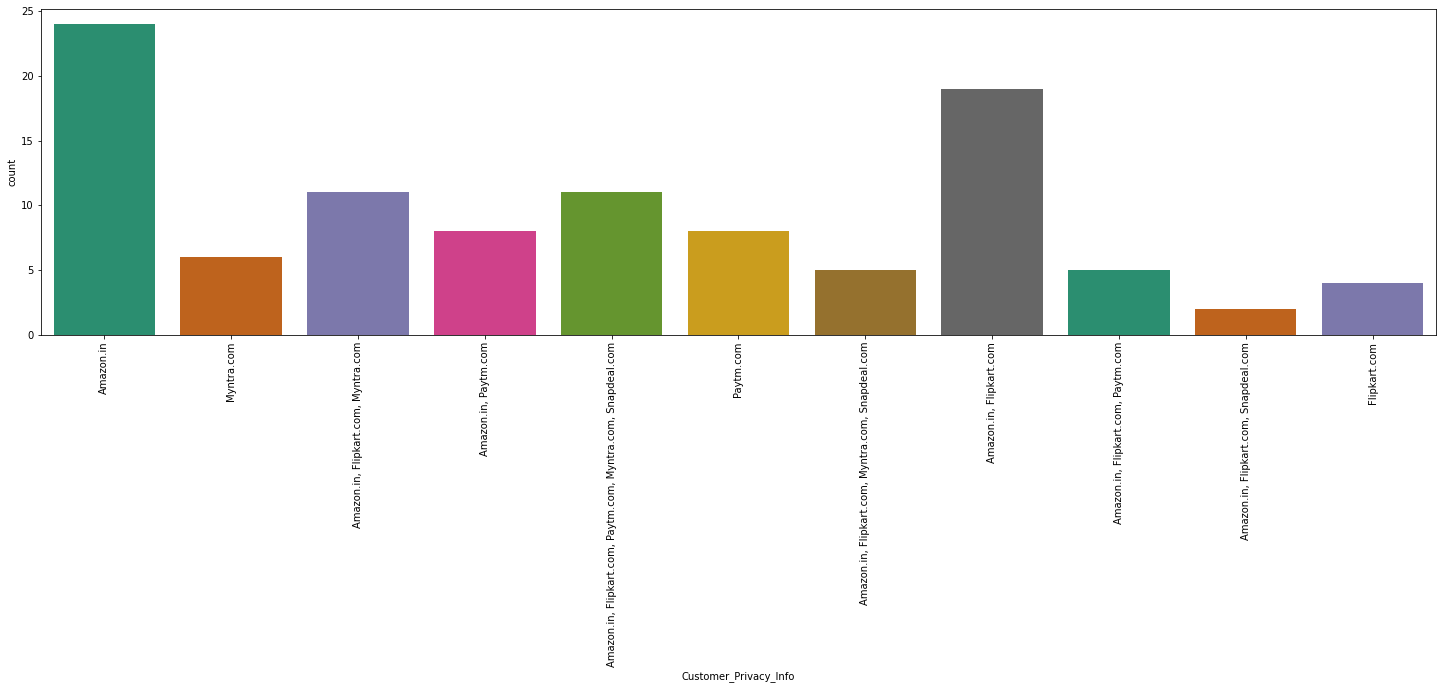

*****************************************************************************************************************************
Amazon.in                                                       16
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    16
Flipkart.com                                                    12
Amazon.in, Flipkart.com, Snapdeal.com                           11
Amazon.in, Flipkart.com                                         10
Amazon.in, Paytm.com, Myntra.com                                 8
Paytm.com                                                        8
Myntra.com                                                       6
Amazon.in, Snapdeal.com                                          6
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                5
Amazon.in, Flipkart.com, Paytm.com                               5
Name: Financial_Security_Info, dtype: int64


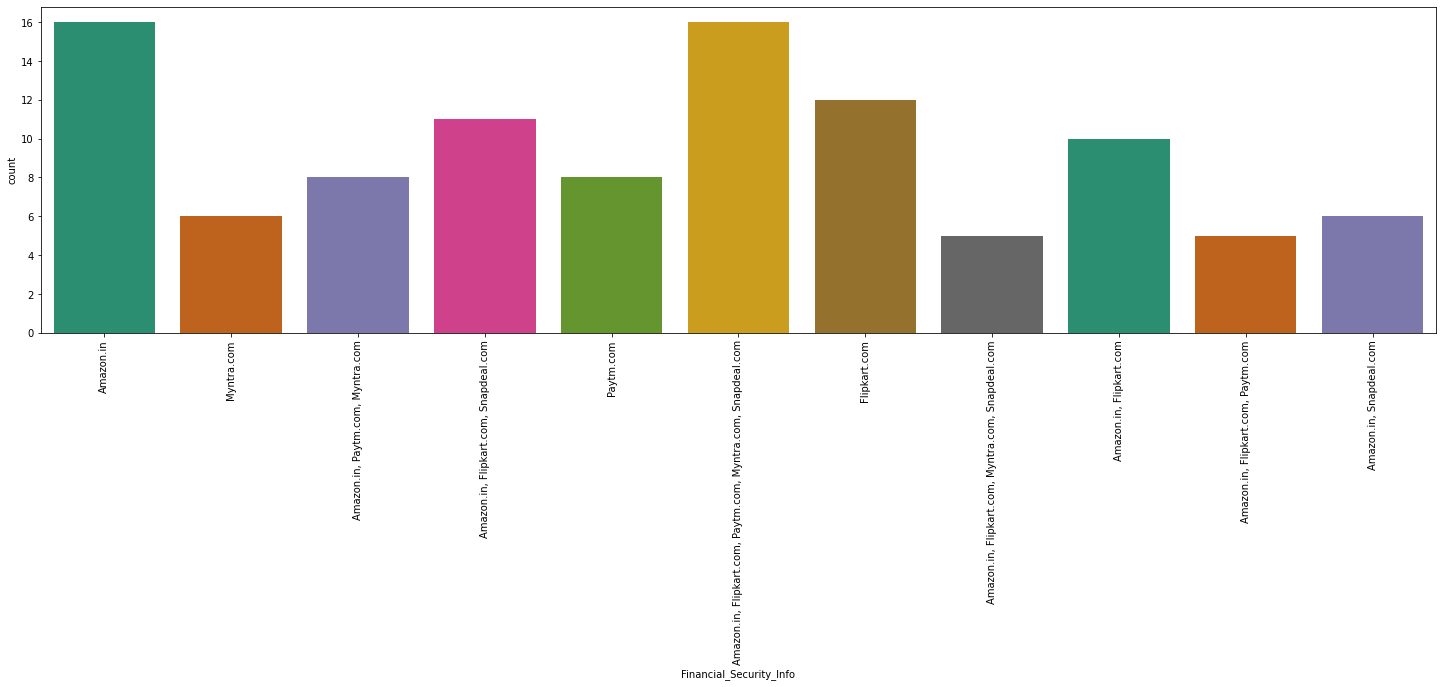

*****************************************************************************************************************************
Amazon.in                                                       25
Amazon.in, Myntra.com                                           16
Amazon.in, Flipkart.com, Snapdeal.com                           16
Amazon.in, Flipkart.com                                         12
Flipkart.com                                                     9
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                8
Myntra.com                                                       6
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com     6
Amazon.in, Flipkart.com, Paytm.com                               5
Name: Perceived_Trustworthiness, dtype: int64


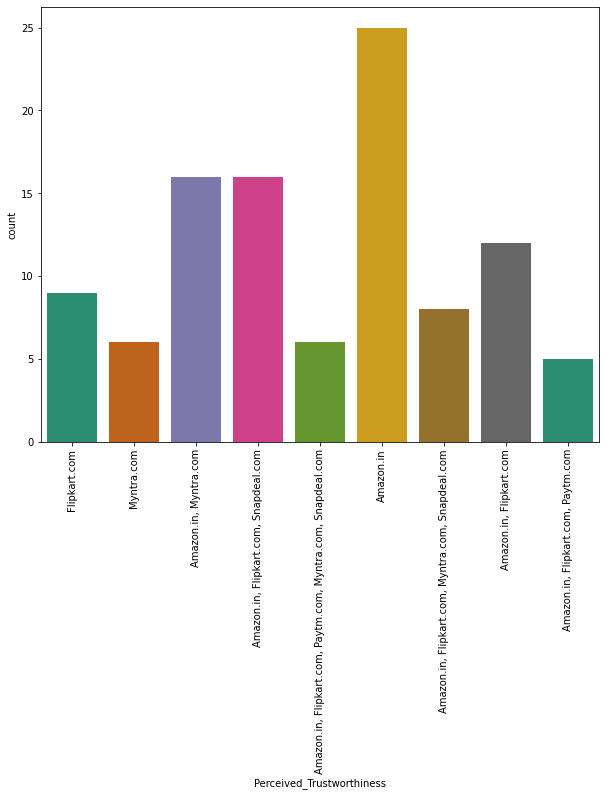

*****************************************************************************************************************************
Amazon.in, Flipkart.com, Myntra.com, Snapdeal    24
Amazon.in                                        21
Amazon.in, Flipkart.com                          15
Myntra.com                                        8
Amazon.in, Myntra.com                             8
Amazon.in, Snapdeal                               8
Amazon.in, Flipkart.com, Myntra.com               6
Amazon.in, Flipkart.com, Paytm.com                6
Paytm.com                                         5
Flipkart.com                                      2
Name: Multichannel_Assistance, dtype: int64


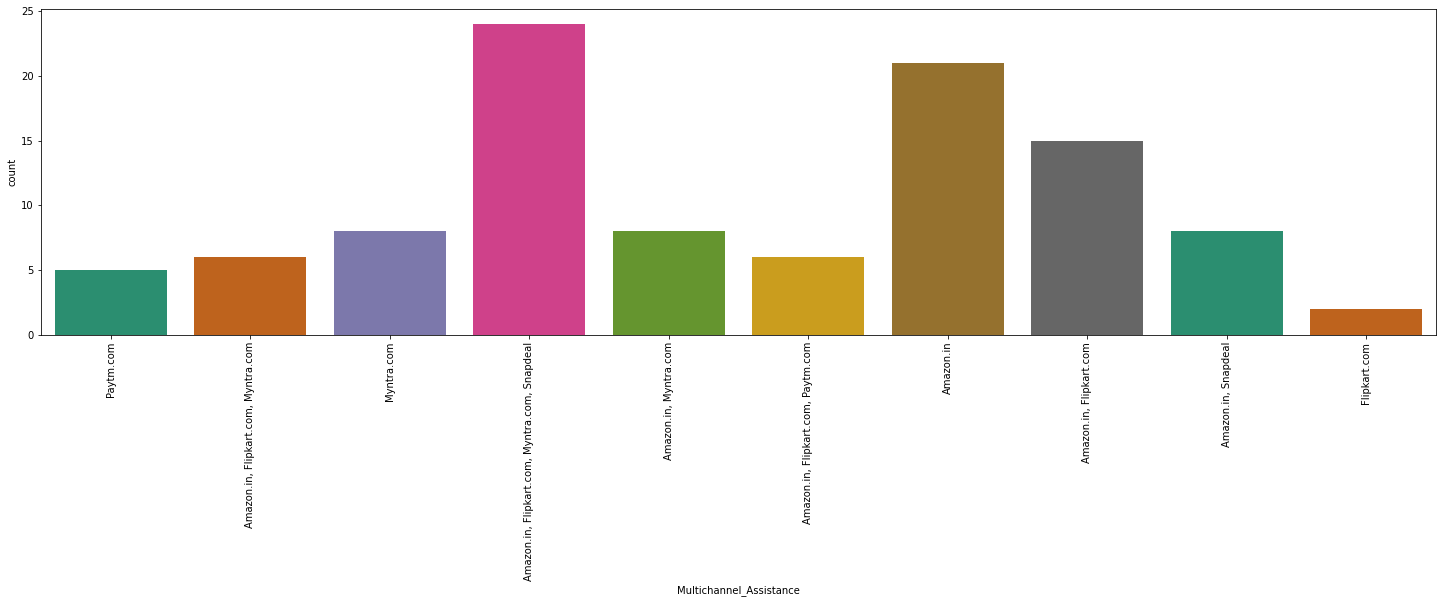

*****************************************************************************************************************************
Amazon.in                                18
Amazon.in, Flipkart.com                  16
Paytm.com                                14
Myntra.com                               13
Snapdeal.com                             11
Amazon.in, Flipkart.com, Snapdeal.com    10
Flipkart.com, Paytm.com                   8
Flipkart.com, Paytm.com, Snapdeal.com     6
Amazon.in, Paytm.com                      5
Flipkart.com                              2
Name: Long_Login_Time, dtype: int64


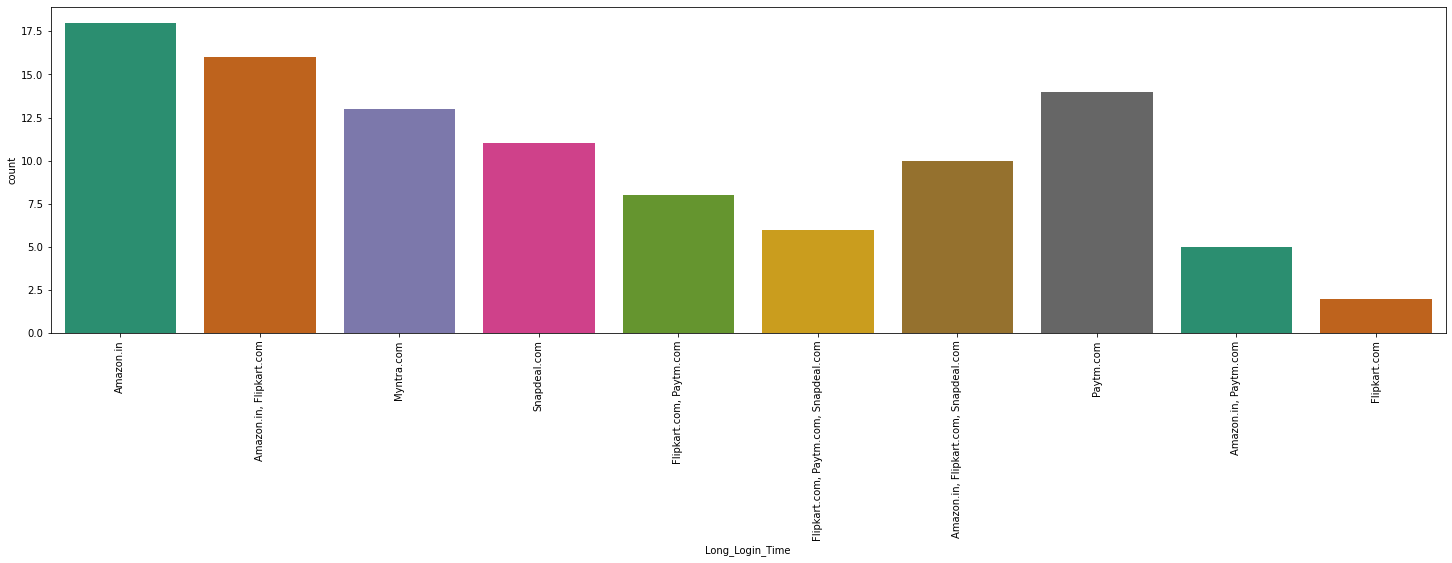

*****************************************************************************************************************************
Amazon.in, Flipkart.com                25
Amazon.in                              14
Myntra.com                             14
Myntra.com, Snapdeal.com               11
Snapdeal.com                           10
Paytm.com                               8
Amazon.in, Paytm.com                    6
Flipkart.com, Snapdeal.com              6
Amazon.in, Myntra.com, Snapdeal.com     5
Flipkart.com                            4
Name: Long_Display_Time, dtype: int64


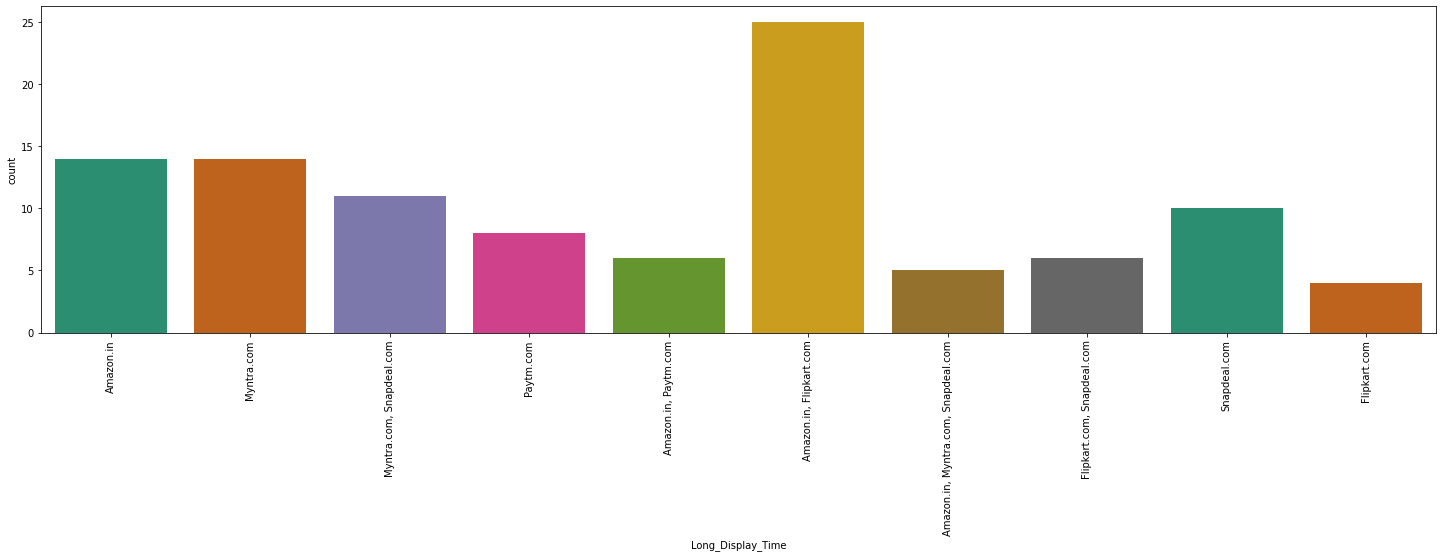

*****************************************************************************************************************************
Myntra.com                 30
Paytm.com                  24
Flipkart.com               14
snapdeal.com               14
Amazon.in                  11
Amazon.in, Paytm.com        6
Paytm.com, snapdeal.com     2
Amazon.in, Flipkart.com     2
Name: Late_Price_Declare, dtype: int64


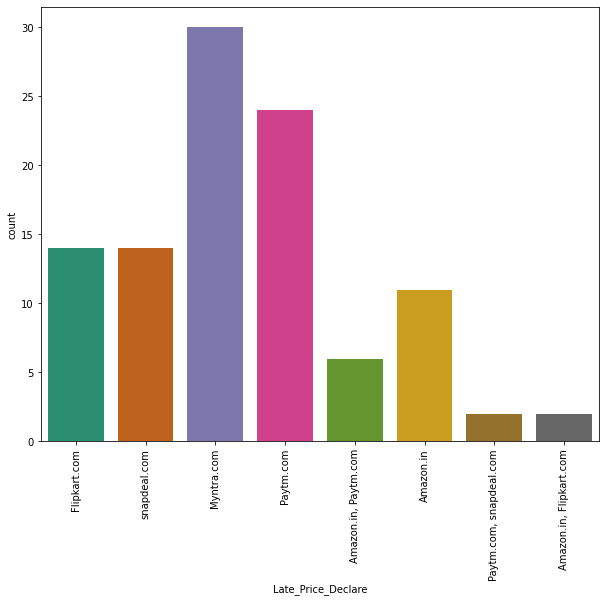

*****************************************************************************************************************************
Paytm.com                           27
Myntra.com                          22
Flipkart.com                        11
Snapdeal.com                         8
Amazon.in, Flipkart.com              8
Amazon.in, Paytm.com                 6
Amazon.in, Snapdeal.com              5
Flipkart.com, Snapdeal.com           5
Paytm.com, Snapdeal.com              5
Amazon.in                            4
Amazon.in, Paytm.com, Myntra.com     2
Name: Long_Loading_Time, dtype: int64


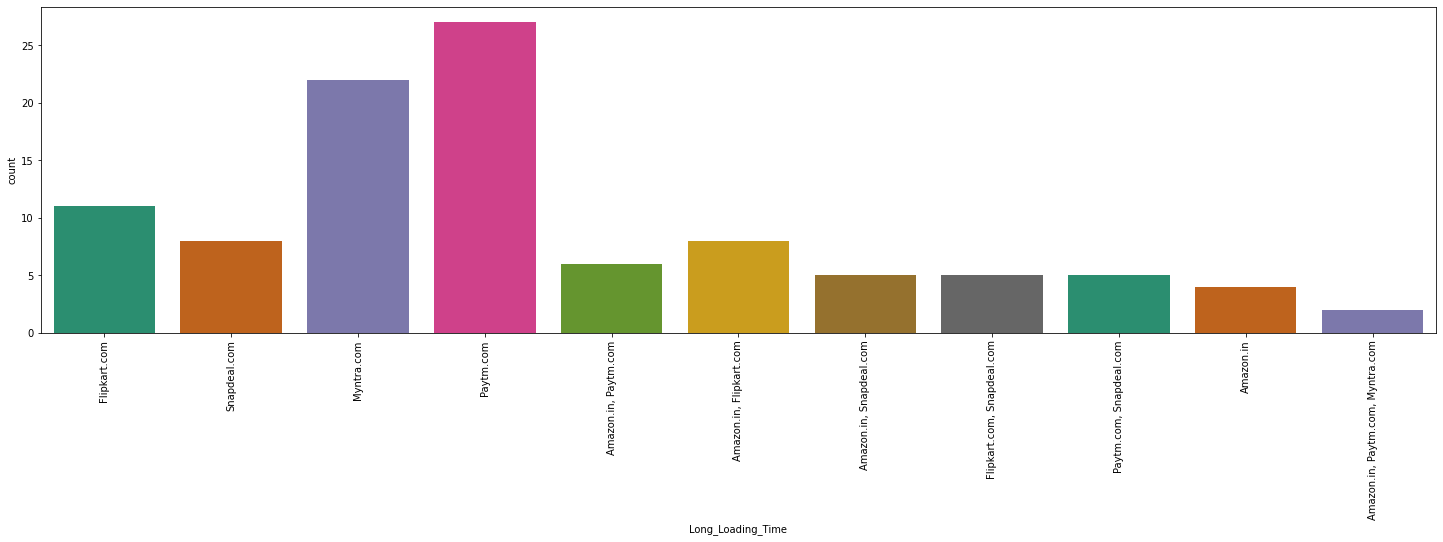

*****************************************************************************************************************************
Snapdeal.com                33
Amazon.in                   22
Amazon.in, Flipkart.com     13
Paytm.com                   11
Flipkart.com                11
Amazon.in, Paytm.com         6
Paytm.com, Snapdeal.com      5
Myntra.com, Snapdeal.com     2
Name: Limited_Payment_Mode, dtype: int64


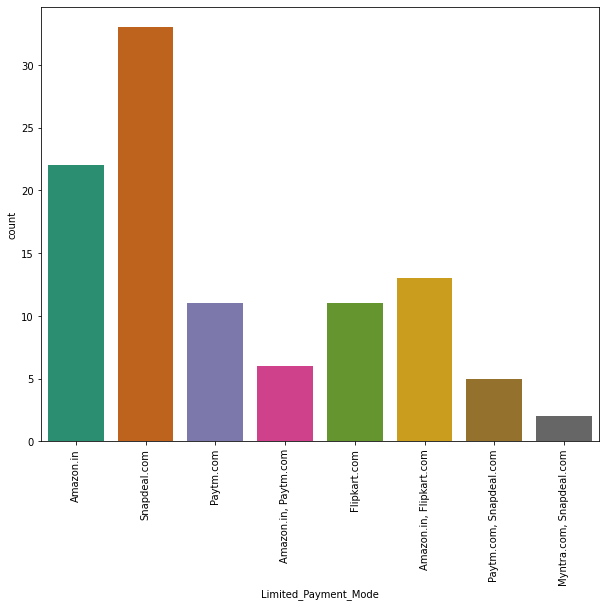

*****************************************************************************************************************************
Paytm.com                  32
Snapdeal.com               24
Flipkart.com               18
Amazon.in                  11
Paytm.com, Snapdeal.com    10
Myntra.com                  8
Name: Late_Delivery, dtype: int64


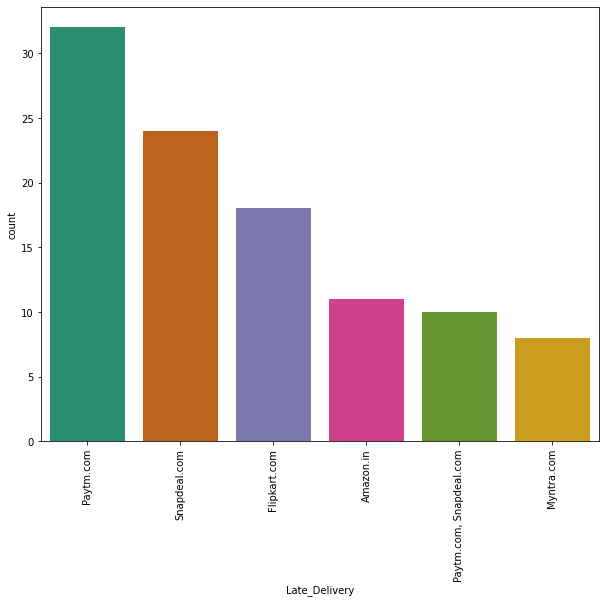

*****************************************************************************************************************************
Amazon.in                   38
Paytm.com                   23
Amazon.in, Flipkart.com     18
Myntra.com                  13
Flipkart.com                 7
Snapdeal.com                 2
Flipkart.com, Myntra.com     2
Name: WebApp_Design_Change, dtype: int64


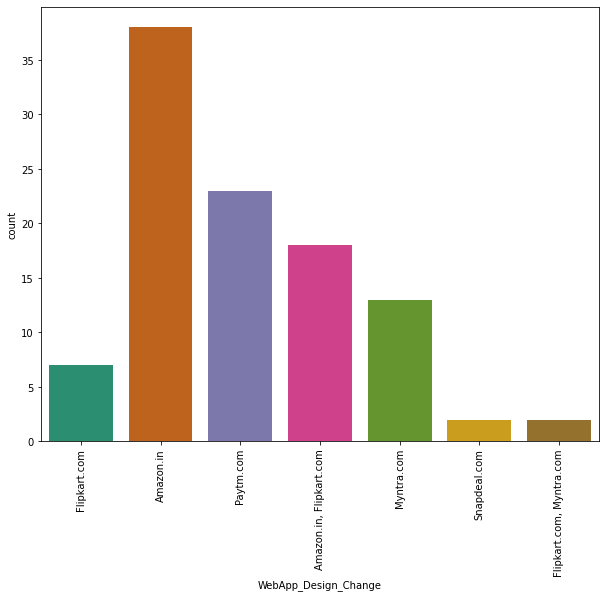

*****************************************************************************************************************************
Myntra.com                    21
Amazon.in                     19
Snapdeal.com                  18
Paytm.com                     14
Amazon.in, Flipkart.com       11
Flipkart.com                  10
Myntra.com, Snapdeal.com       5
Flipkart.com, Snapdeal.com     5
Name: Page_Disruption, dtype: int64


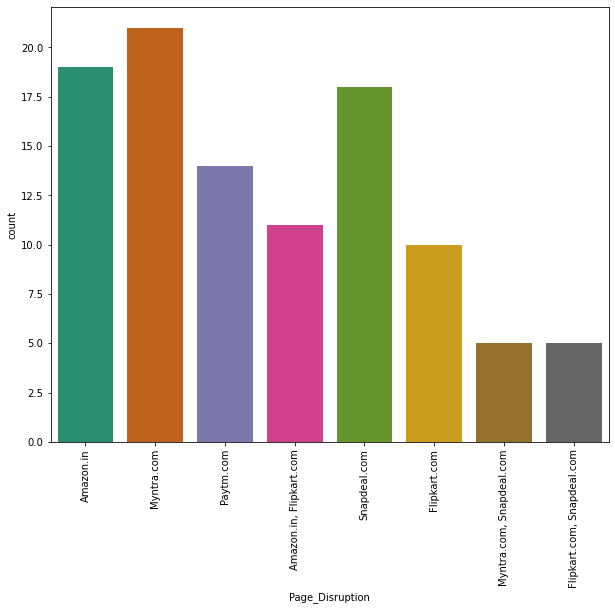

*****************************************************************************************************************************
Amazon.in                             35
Flipkart.com                          17
Amazon.in, Flipkart.com               15
Amazon.in, Flipkart.com, Paytm.com    11
Paytm.com                              8
Amazon.in, Paytm.com                   7
Snapdeal.com                           5
Myntra.com, Snapdeal.com               5
Name: WebApp_Efficiency, dtype: int64


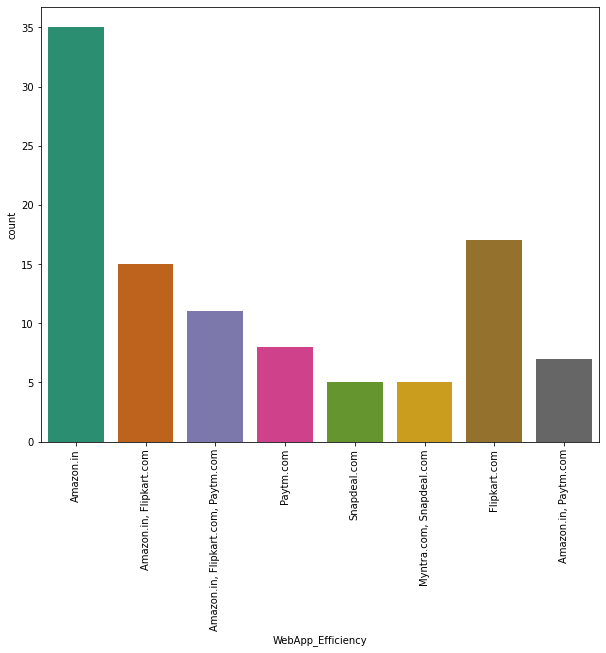

*****************************************************************************************************************************
Amazon.in                                            28
Amazon.in, Flipkart.com                              22
Flipkart.com                                         15
Amazon.in, Myntra.com                                14
Amazon.in, Paytm.com, Myntra.com                      8
Amazon.in, Paytm.com                                  6
Flipkart.com, Paytm.com, Myntra.com, snapdeal.com     5
Amazon.in, Flipkart.com, Myntra.com                   5
Name: Recommendation, dtype: int64


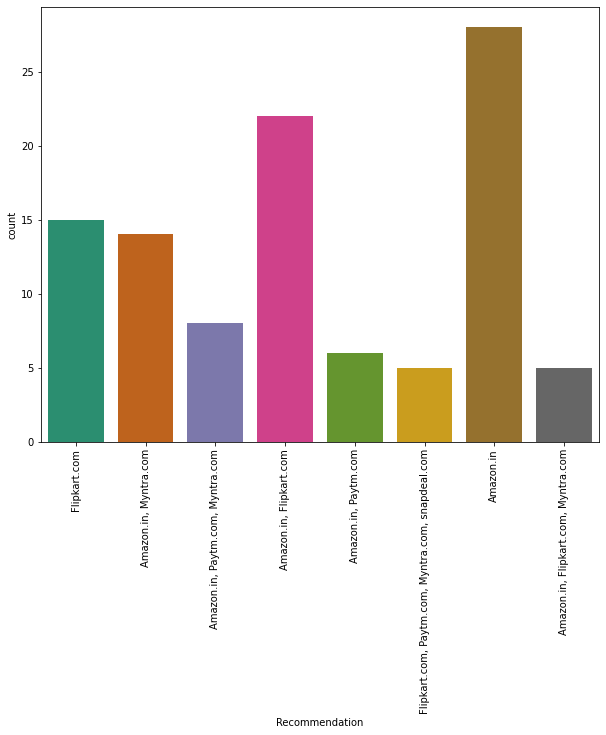

*****************************************************************************************************************************


In [26]:
df1=df.iloc[:,[2,4,5,7,8,10,12,13,15,16,17,18,19,20,21,22,23,25,26,28,31,38,39,45,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70]]
for i in df1:
    print(df1[i].value_counts())
    value_count(i)

Observations:

Most of the customers from the city Delhi, Greater Noida, Noida and Bangalore are used to shop onine and the shopping count is high in these cities.

Most of the customers found shopping online for more than 4 years and the count is high for the same followed by the customers shopping for 2-3 years.

In last 1 year, most of the customers were purchased online less than 10 times and only few of the customers purchased online 21-30 times.

Most of the customers used Smartphone device to access the online shopping and only few customers used Tablet to access the online shopping.

The count is high for others mobile screen size followed by 5.5 inches screen size and 5 inches screen size has least count. That means, the customers who have thier mobile screen size other than mentioned inches shopped more online followed by 5.5 inches and the customers having mobile screen size 5 inches shopped very less.

Most of the customers used Google chrome to access the website and only few of the customers used Opera and Mozilla Firefox to access the online shopping website.

Most of the customers used Search Engine and Via application to reach the online retail store after their first visit and also some customers used Detect URL to reach the online store. Which means these customers have downloaded their most favourite application to reach the online stores easily.

Many customers took more than 15 mins before making the purchase decision and some of the customers explored 6-10 mins.

Most of the customers abandoned their shopping cart sometimes and some of the customers abandoned their shopping cart frequently.

Around 133 customers abandoned their bag due to some better alternative offer and 54 customers abandoned due to promo code not applicable.

Around 90% of the customers agreed that the content on the website is easy to read and understand.

Around 77% of the customers agreed that the information on similar product to the one highlighted is important for product comparison.

About 70% of the customers agreed that complete information on listed seller and product being offered is important for purchase decision.

88.84% of the customers agreed that all relevant information on listed products must be stated clearly and only 11% of the customers disageed with it.

91% of the customers agreed that ease of navigation in website helps them more.

Most of the customers agreed that they have no issues with the loading and processing speed.

87% of the customers agreed with user friendly website interface. Creating new user friendly websites will impact on customers to shop more online. By doing this customers don't have to work around much and overall shoping experience would be smooth.

84% of the customers trusted that the online retail store will fulfill its part of the transaction at the stipulated time.

The count is high for the customers who agreed the empathy (readiness to assist with queries) towards the customers in the online shopping website is very helpful. If the online shopping companies ready to assist with customers queries then there will be benefit for both company and the customers.

The count is high for the customers who agreed that the responsiveness, availability of several communication channels will help them more while shopping online which means if one channel is not available then customers can easily reach out to other channel to fulfill their benifits. So it is important for the companies to provide various channels to communicate with the customers.

83% of the customers agreed that shopping online is convenient and flexible and 12% of the customers are indifferent which means either they are agreed to this or disagreed and only 5% of the customers completely disagreed with it.

Most of the customers agreed to offering a wide variety of listed product in several category and the count is high for the same.

Around 86% of the customers would like to have provision of complete and relevant product information in the online shopping website.

47% of the customers agreed that shopping on the website helps them fulfilling certain roles and 33% of the customers are in confusion whether to agree or disagree and only 20% of the customers disagrees with it.

Most of the people shopped from Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com companies and they think that it is easy to use website or applicatiion in these companies.

Amazon.in and Flipkart.com have high visual appealing web-page layout compared to others.

48% of the customers says that amazon and flipkart shows wide variety of products in their shopping websited compared to other websites. It's important for the companies to show different types of products to gain customers rate.

37% of the customers liked amazon and flipkart in displaying complete and relevant information of the products.

Around 51 customers says that Amazon.in is the fast loading website and application and they liked it. About 44 customers liked the web speed of both amazon and paytm followed by amazon ad flipkart.

The count is high for amazon followed by amazon and flipkart which means most of the customers liked the reliability of website or application in amazon and flipkart.

Most of the customers likes Amazon's quickness to complete the purchase followed by Flipart's and only few of the customers likes Myntra website.

In Amazon and flipkart websites there are several payment options available compared to the other shopping websites.

Most of the customers liked Amazon's delivery speed followed by flipkart and snapdeal.

Most of the customers trusts amazon followed by flipkart in terms of keeping the privacy of their data information.

The count is high for the customers who belives that amazon website keeps their finanacial information secrete also the customers trusts flipkart, Myntra, Snapdeal and paytm in terms of keeping thier finanacial information secured.

Most of the customers believed that Amazon has perceived trustworthiness comapared to others. Apart from this customers believed that flipkart and Myntra also have perceived trustworthiness.

Most of the customers like Amazon inerms of presence of online assistance through multi-channel followed by flipkart,Myntra and snapdeal.

Most of the customers agreed that Amazon takes longer time to get logged them in.

Customers believes that Amazon and flipkart takes longer time in display the graphics and photos in sales period.

Customers says that Myntra and paytm have late declaration of price in promotion/sales period compared to others.

Also Myntra and paytm takes longer page loading time.

Snapdeal.com has limited mode of payment on most products followed by Amazon.in.

In terms of time taken in product delivery Paytm has highest count followed by Snapdeal.com.

Most of the customers disliked change in website/Application design on amazon followed by paytm.

Most of the customers disliked frequent disruption when moving from one page to another on amazon, Myntra and snapdeal.

Most of the customers believes that Amazon and flipkart website is as efficient as before.

Most of the customers would like to recommend amazon retailer to a friend followed by flipkart.

# Bivariate Analysis

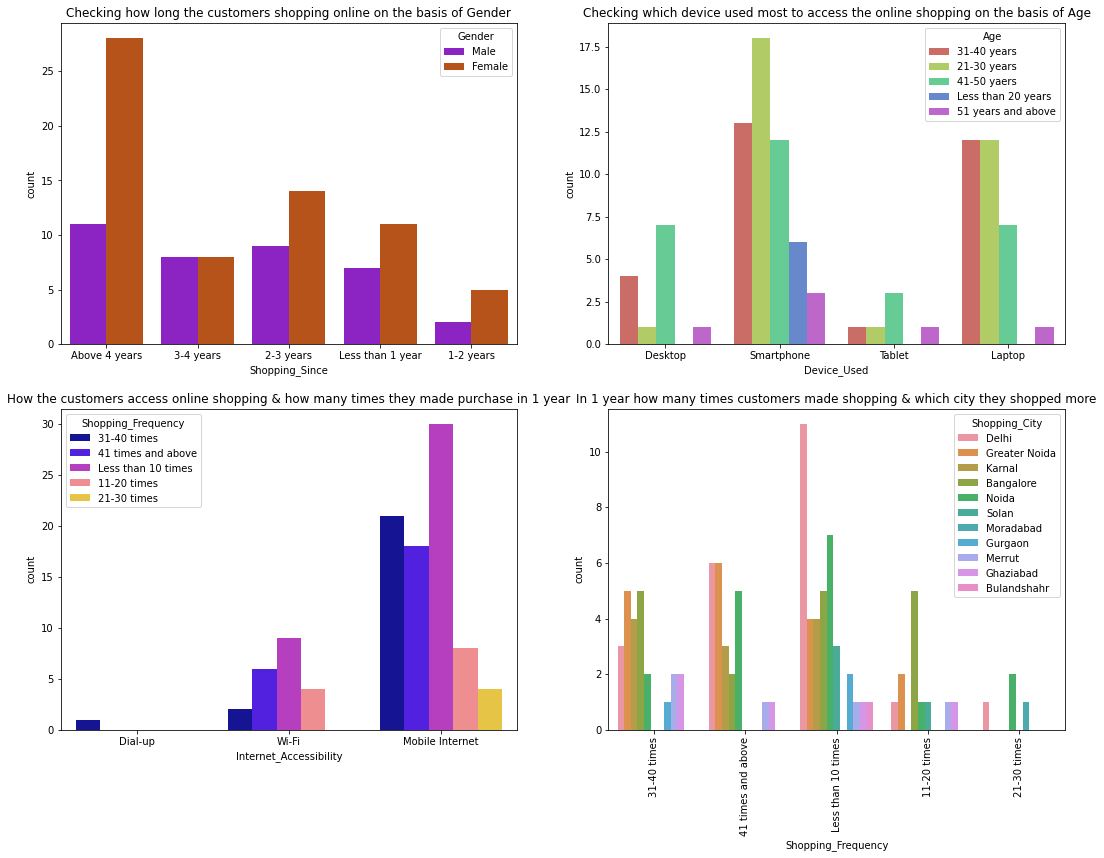

In [27]:
# Comparision between two variables
plt.figure(figsize=[18,13])

plt.subplot(2,2,1)
plt.title('Checking how long the customers shopping online on the basis of Gender')
sns.countplot(df['Shopping_Since'],hue=df['Gender'],palette="gnuplot");

plt.subplot(2,2,2)
plt.title('Checking which device used most to access the online shopping on the basis of Age')
sns.countplot(df['Device_Used'],hue=df['Age'],palette="hls");

plt.subplot(2,2,3)
plt.title('How the customers access online shopping & how many times they made purchase in 1 year')
sns.countplot(df['Internet_Accessibility'],hue=df['Shopping_Frequency'],palette="gnuplot2");

plt.subplot(2,2,4)
plt.title('In 1 year how many times customers made shopping & which city they shopped more')
sns.countplot(df['Shopping_Frequency'],hue=df['Shopping_City']);

plt.xticks(rotation=90)
plt.subplot(2,2,3).legend(loc ="upper left",title="Shopping_Frequency");
plt.subplot(2,2,4).legend(loc ="upper right",title="Shopping_City");
plt.show()

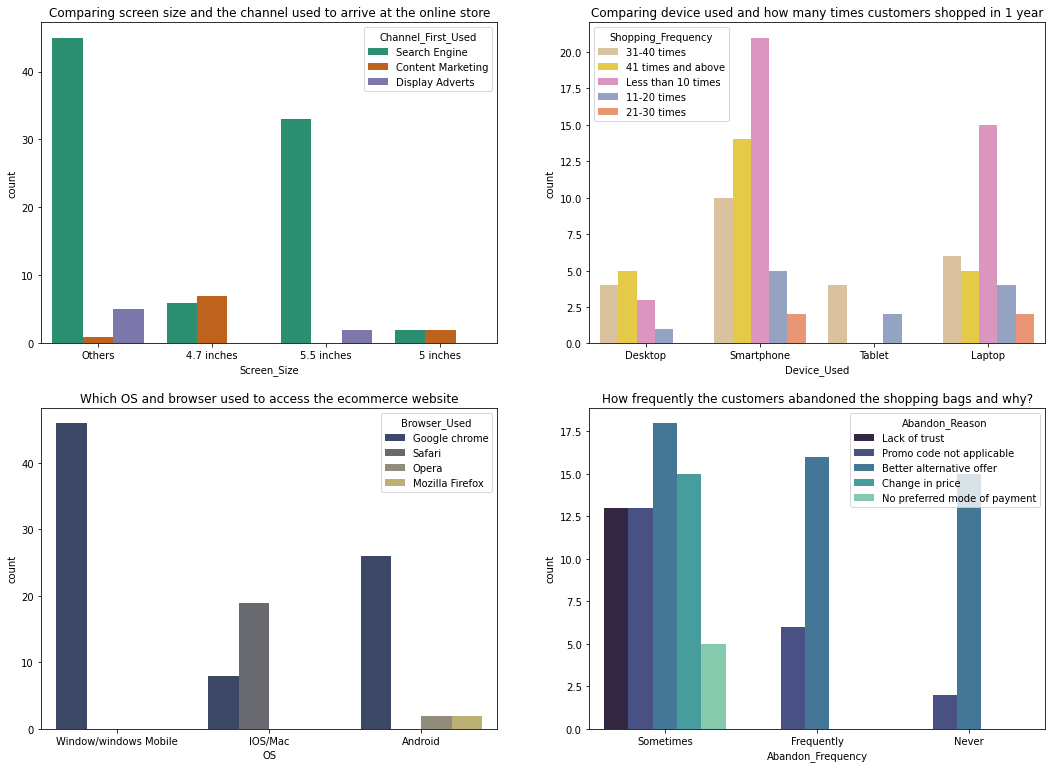

In [28]:
# Comparision between two variables
plt.figure(figsize=[18,13])

plt.subplot(2,2,1)
plt.title('Comparing screen size and the channel used to arrive at the online store',fontsize=12)
sns.countplot(df['Screen_Size'],hue=df['Channel_First_Used'],palette="Dark2");

plt.subplot(2,2,2)
plt.title('Comparing device used and how many times customers shopped in 1 year',fontsize=12)
sns.countplot(df['Device_Used'],hue=df['Shopping_Frequency'],palette="Set2_r");

plt.subplot(2,2,3)
plt.title('Which OS and browser used to access the ecommerce website',fontsize=12)
sns.countplot(df['OS'],hue=df['Browser_Used'],palette="cividis");

plt.subplot(2,2,4)
plt.title('How frequently the customers abandoned the shopping bags and why?',fontsize=12)
sns.countplot(df['Abandon_Frequency'],hue=df['Abandon_Reason'],palette="mako");

plt.subplot(2,2,2).legend(loc ="upper left",title="Shopping_Frequency");
plt.subplot(2,2,4).legend(loc ="upper right",title="Abandon_Reason");
plt.show()

# Observations:

The customers having their mobile screen size say 6 inches(others) have followed search engine channel to arrive at their favorite online store for the first time. Also the customers who have their screen size 5.5 inches also used search engine channel to access the online shopping store.

Most of the customers used Smartphones 31-40 times in an year to access the ecommerce websites to shop the products.

Many customers having windows operating system in their device ran Google chrome to access the ecommerce shopping websites and some of the customers having IOS/Mac operating system used Google chrome as well as Safari to reach the online shopping store.

Due to Lack of trust on the ecommerce websites, sometimes most of the customers abandoned the websites and some of the customers abandoned the shopping website due to the promo code not applicable. which means, if the product is having the special price or some catalogue price rule is applicable on it.Then coupon code should not be applicable on the products.

So it is important for the ecommerce companies to create discount price, offers, coupon codes to retain the customers.

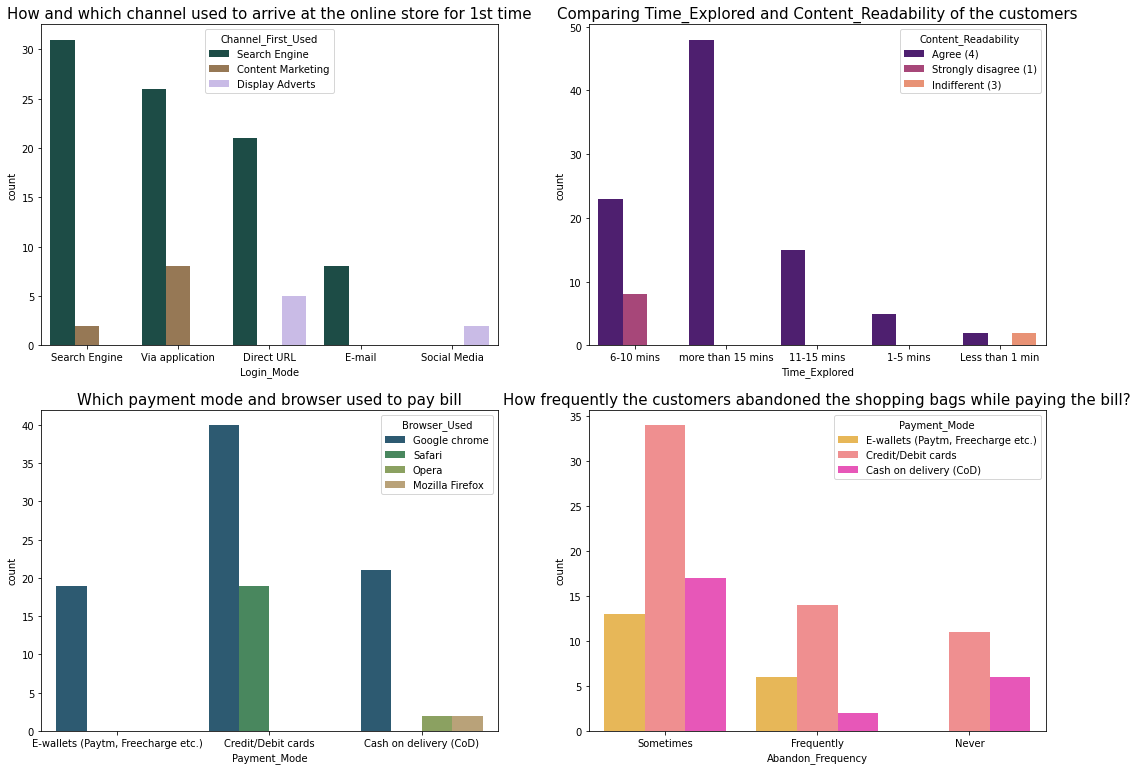

In [29]:
# Comparision between two variables
plt.figure(figsize=[18,13])

plt.subplot(2,2,1)
plt.title('How and which channel used to arrive at the online store for 1st time',fontsize=15)
sns.countplot('Login_Mode',hue='Channel_First_Used',palette="cubehelix",data=df);

plt.subplot(2,2,2)
plt.title('Comparing Time_Explored and Content_Readability of the customers',fontsize=15)
sns.countplot('Time_Explored',hue='Content_Readability',palette="magma",data=df);

plt.subplot(2,2,3)
plt.title('Which payment mode and browser used to pay bill',fontsize=15)
sns.countplot('Payment_Mode',hue='Browser_Used',palette="gist_earth",data=df);

plt.subplot(2,2,4)
plt.title('How frequently the customers abandoned the shopping bags while paying the bill?',fontsize=15)
sns.countplot('Abandon_Frequency',hue='Payment_Mode',palette="spring_r",data=df);

plt.show()


# Observations:

Search engine is the most used channel by the customers to arrive their favourite store for the first time and after visit the website for the first time, most of them used the same channel to reach the online retail store to reshopping the products.

Most of the customers agreed that the content on the website is easy to read and understand also they explored more than 15 mins before making the purchase decision and some of the customers strongly disagreed that the content is not good and they explored 6-10 mins before making the purchase decision. So ecommerce websites should enable some images and it should contain clear structure, so that the customers can easily read and understand the content of the product.

Most of the customers used google chrome to reach the websites and they preferred to pay their product price using Credit/Debit cards and only few of the customers used Safari browser to reach the e-retail websites.

Sometimes the customers used to abandon their selected items and wants to leave without making payment and most of them making the payment using E-wallets methods.

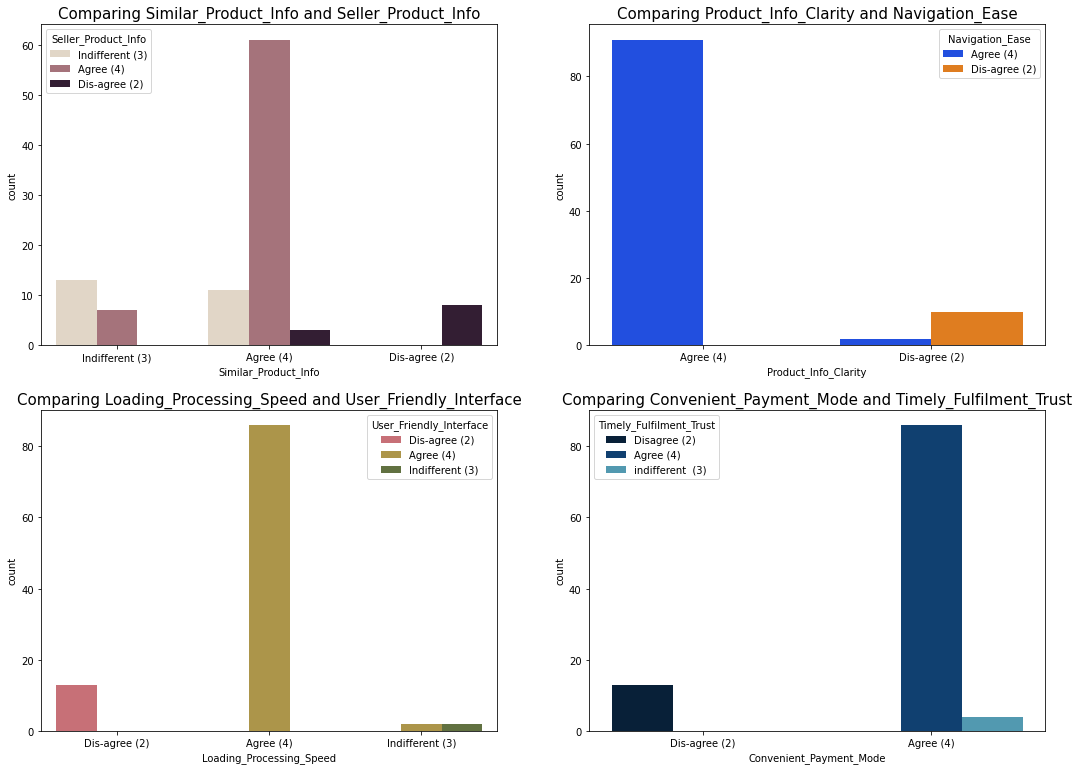

In [30]:
# Comparision between two variables
plt.figure(figsize=[18,13])

plt.subplot(2,2,1)
plt.title('Comparing Similar_Product_Info and Seller_Product_Info',fontsize=15)
sns.countplot(df['Similar_Product_Info'],hue=df['Seller_Product_Info'],palette="ch:.25");

plt.subplot(2,2,2)
plt.title('Comparing Product_Info_Clarity and Navigation_Ease',fontsize=15)
sns.countplot(df['Product_Info_Clarity'],hue=df['Navigation_Ease'],palette="bright");

plt.subplot(2,2,3)
plt.title('Comparing Loading_Processing_Speed and User_Friendly_Interface',fontsize=15)
sns.countplot(df['Loading_Processing_Speed'],hue=df['User_Friendly_Interface'],palette="tab20b_r");

plt.subplot(2,2,4)
plt.title('Comparing Convenient_Payment_Mode and Timely_Fulfilment_Trust',fontsize=15)
sns.countplot(df['Convenient_Payment_Mode'],hue=df['Timely_Fulfilment_Trust'],palette="ocean");

plt.subplot(2,2,4).legend(loc ="upper left",title="Timely_Fulfilment_Trust");
plt.show()

# Observations:

Most of the customers agreed that the information on similar product to the one highlighted is important for product comparison and also Complete information on listed seller and product being offered is important for purchase decision. In order to buy a product, the ecommerce website must give the complete information about the product and seller information then only the customers can compare the product costs and its details in different websites and they tend to buy that particular product in a particular website.

Around 90% of the customers agreed that they should be able to navigate the website easily and the products information in the website must be clearly stated their uses, lifetime, benefits etc.Then only more customers tend to buy those products and can shop easily.

Most of the customers agreed with the user friendly interface of the websites which can be easily loaded and processed also these websites' loading and processing capacity is very fast so that the customers like to shop in ecommerce websites. If these websites do not have this much of loading and processing speed then customers don't want to buy the products in this website and they tend to other websites or other options rather than this.

Most of the customers agree to the trust that the online retail stores will fulfil its part of the transaction at the stipulated time also most of them very happy with the convenient payment modes given by the websites. In other words, the websites must provide all the possible ways of payment methods then only the customers shop frequently all the time the mode of the payment for customers may not possible sometimes they may choose cash on delivery. So if the retailers provides all type of payment methods then the customers can easily make the payment also it enhances the sales of the ecommerce sites. And the transaction must also be given with some stipulated time otherwise the payments may be failed so they've to provide minimum amount of time which need to be fixed for all.

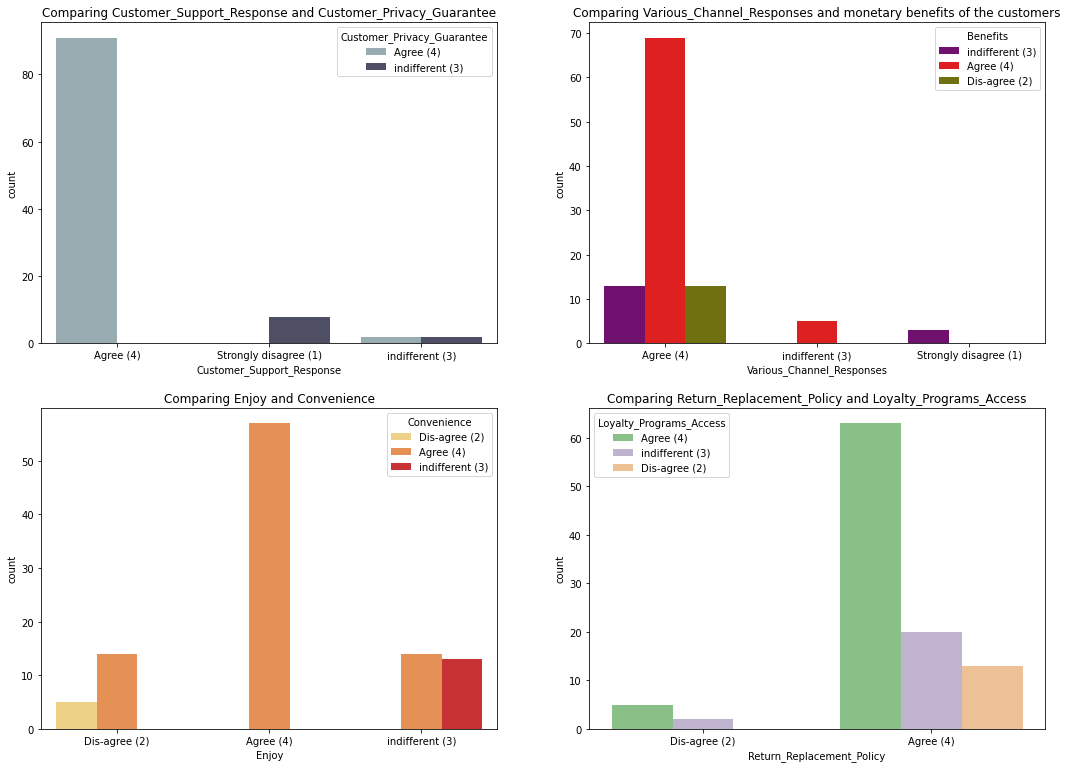

In [31]:
# Comparision between two variables
plt.figure(figsize=[18,13])

plt.subplot(2,2,1)
plt.title('Comparing Customer_Support_Response and Customer_Privacy_Guarantee',fontsize=12)
sns.countplot(df['Customer_Support_Response'],hue=df['Customer_Privacy_Guarantee'],palette="bone_r");

plt.subplot(2,2,2)
plt.title('Comparing Various_Channel_Responses and monetary benefits of the customers',fontsize=12)
sns.countplot(df['Various_Channel_Responses'],hue=df['Benefits'],palette="brg");

plt.subplot(2,2,3)
plt.title('Comparing Enjoy and Convenience',fontsize=12)
sns.countplot(df['Enjoy'],hue=df['Convenience'],palette="YlOrRd");

plt.subplot(2,2,4)
plt.title('Comparing Return_Replacement_Policy and Loyalty_Programs_Access',fontsize=12)
sns.countplot(df['Return_Replacement_Policy'],hue=df['Loyalty_Programs_Access'],palette="Accent");

plt.subplot(2,2,2).legend(loc ="upper right",title="Benefits");
plt.subplot(2,2,4).legend(loc ="upper left",title="Loyalty_Programs_Access");

plt.show()

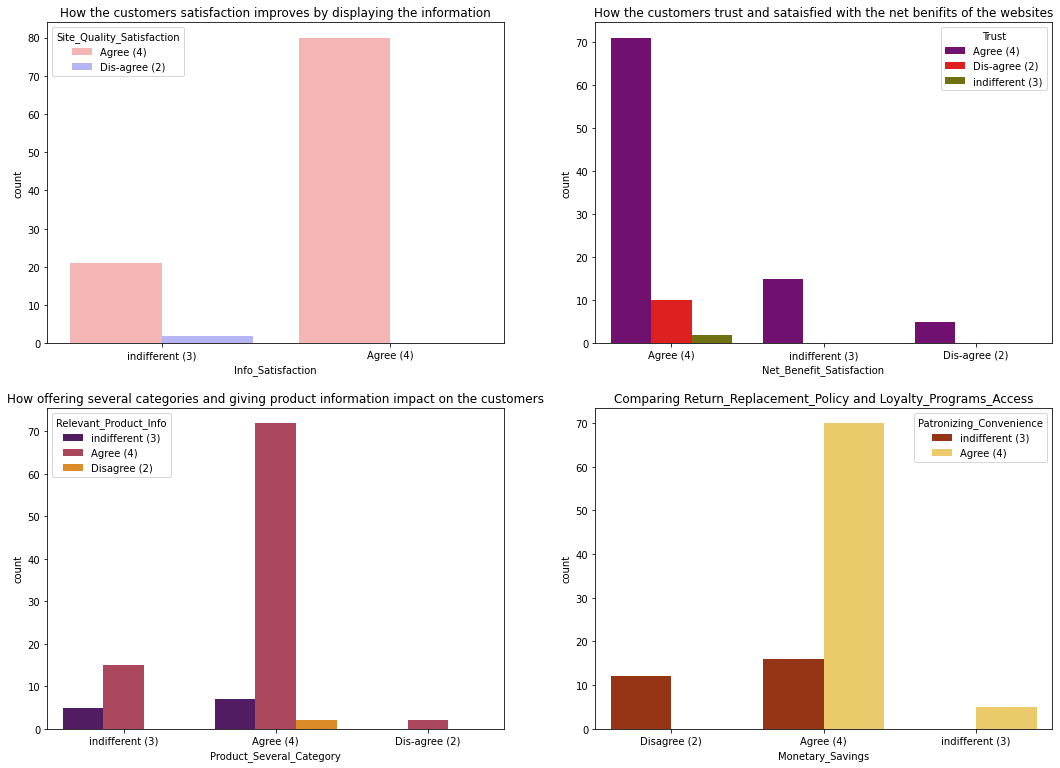

In [32]:
# Comparision between two variables
plt.figure(figsize=[18,13])

plt.subplot(2,2,1)
plt.title('How the customers satisfaction improves by displaying the information',fontsize=12)
sns.countplot(df['Info_Satisfaction'],hue=df['Site_Quality_Satisfaction'],palette="bwr_r");

plt.subplot(2,2,2)
plt.title('How the customers trust and sataisfied with the net benifits of the websites',fontsize=12)
sns.countplot(df['Net_Benefit_Satisfaction'],hue=df['Trust'],palette="brg");

plt.subplot(2,2,3)
plt.title('How offering several categories and giving product information impact on the customers',fontsize=12)
sns.countplot(df['Product_Several_Category'],hue=df['Relevant_Product_Info'],palette="inferno");

plt.subplot(2,2,4)
plt.title('Comparing Return_Replacement_Policy and Loyalty_Programs_Access',fontsize=12)
sns.countplot(df['Monetary_Savings'],hue=df['Patronizing_Convenience'],palette="afmhot");

plt.subplot(2,2,2).legend(loc ="upper right",title="Trust");
plt.show()

# Observations:

Many customers agreed that displaying quality information on the website improves satisfaction of customers since they believe that displaying quality information have significant association with customer satisfaction and they are satisfied and happy while shopping on good quality websites. In order to obtain high levels of customer satisfaction, high service quality is needed, which often leads to favourable behavioural intentions also a website with good system quality, information quality, and electronic service quality is a key to success in e-commerce. So, the online e-tailers must display all the information about the product then only customers get an idea to buy the products regularly.

Most of the customers agreed that net Benefit derived from shopping online can lead to users’ satisfaction also they believe that user satisfaction cannot exist without trust. The e-tailer should provide crediting points (net benefits) so that the customers tend to buy frequently in order to gain points. Trust is also a major factor for customers to decide whether to buy products from online stores or not also trust helps reduce uncertainty when the degree of familiarity between the customer and transaction security mechanism is insufficient. If customers have a high level of trust toward the website, it is more likely for them to have intention to purchase so it’s important for the ecommerce website to make the customers get trust on them.

The customers are more likely to purchase on the same websites if that website offers them a wide variety of products in several category and giving relevant information about the products. Having multiple product lines may allow to grow the ecommerce business and finding accurate and up-to-date information of the product must be stated clearly in the website so that the customers can buy the products without any confusion.

In this digital and competitive world, everyone wants to save money, the ecommerce company need to know that the best way to sell online is to make the consumer feel that he is saving money doing so. And not just feel, online shopping should result in a lot of saving for the consumer. This saving would automatically get converted into trust and brand equity for the seller. To do this the online companies should offer the best deals and bargains to the consumer through social platforms. If the retailers give some discounted prices then the customers can make money savings and they tend to purchase in the same websites regularly. Convenience is the important thing for ecommerce and most of the customers agreed with it.

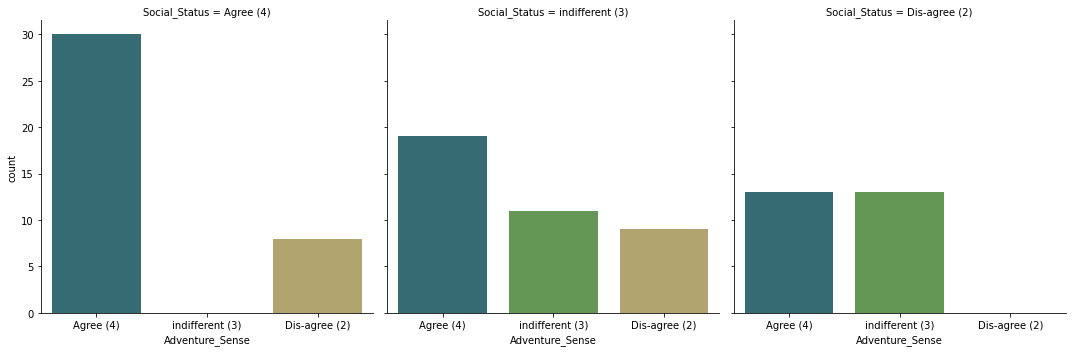

In [33]:
# Comparing how the shopping on e-tailer gives sense of adventure and enhances the social status of the customers
sns.factorplot(x='Adventure_Sense',col='Social_Status',data=df,palette="gist_earth",kind="count")
plt.show()

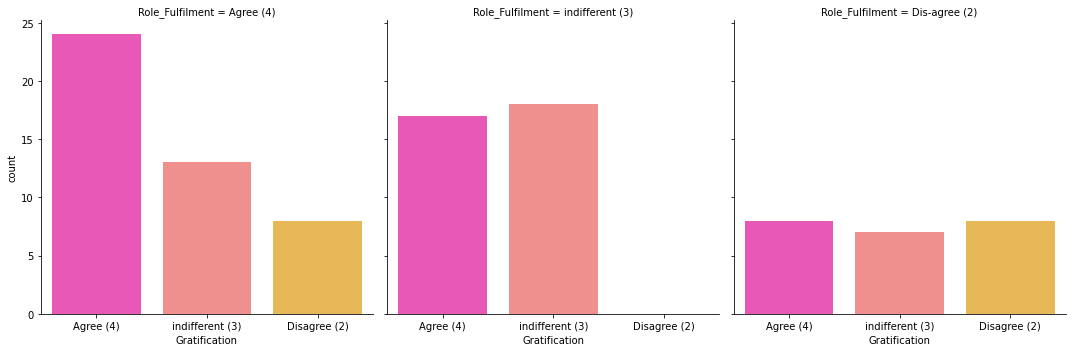

In [34]:
# Comparing how the shopping on favorite e-tailer makes customer feel gratification and helps them fulfill their certain role
sns.factorplot(x='Gratification',col='Role_Fulfilment',data=df,palette="spring",kind="count")
plt.show()

# Observations:

Most of the customers agreed that they felt gratified while shopping on their favourite e-tailer. This is because the e-tailer companies can successfully make up for a mistake or a dissatisfied customer is to be equally expedient in addressing the customer’s needs.

Also, most of the customers agreed that shopping on online website helps them fulfil their certain roles. Fulfilment refers to activities that ensure customers receive what they ordered, including the time of delivery, order accuracy, and delivery condition, also the customers cannot see the product directly before they purchase it. Companies must ensure delivery timeliness, order accuracy, and delivery conditions to provide superior service quality for customers. The companies must understand that the customer satisfaction is an indication of the customer's belief of the probability of a service leading to a positive feeling. If the companies give positive vibration to the customers by giving chance to fulfil their roles then they shop more on that particular website.

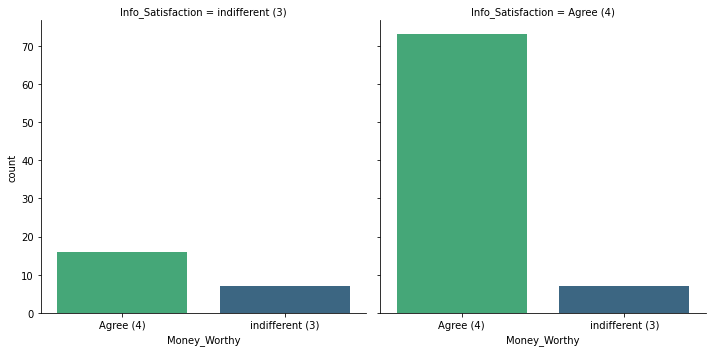

In [35]:
# Checking whether the customers getting value for money spent while shopping online after getting information about the product
sns.factorplot(x='Money_Worthy',col='Info_Satisfaction',data=df,palette="viridis_r",kind="count")
plt.show()

The customers should satisfy with their product that they shopped from the online store then only they agreed that they got value for the money they spent. The companies should display the quality information about the products so that the customers being able to purchase their product and thinks that it worth for money and this comes under utilitarian value.

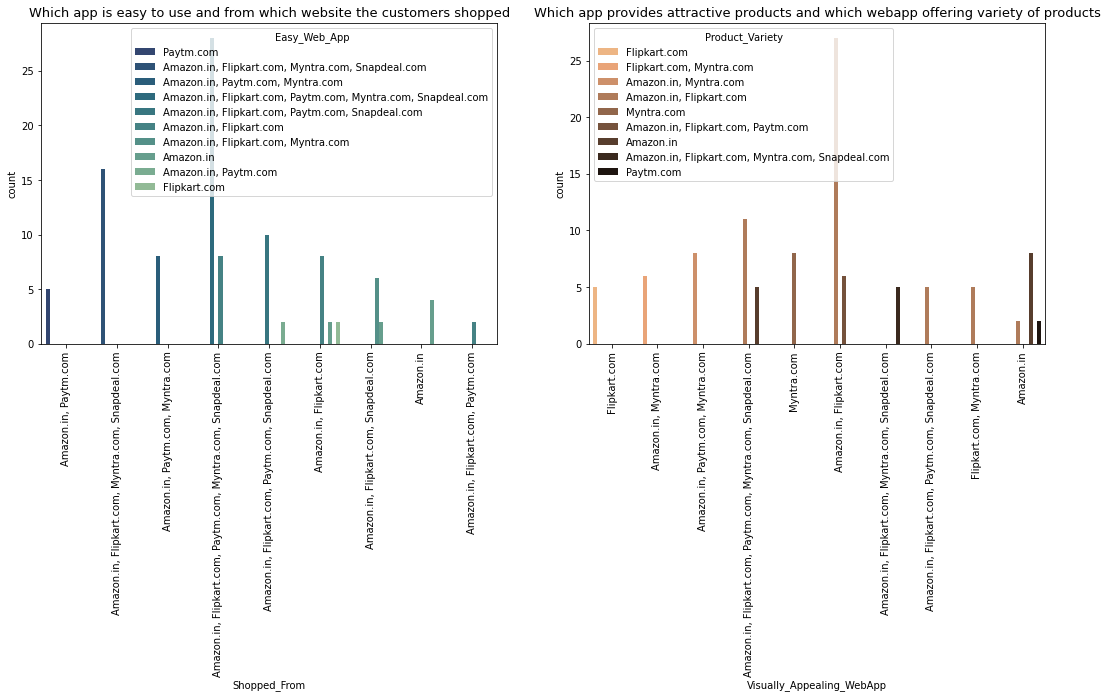

In [36]:
# Comparision between two variables
plt.figure(figsize=[18,13])

plt.subplot(2,2,1)
plt.title('Which app is easy to use and from which website the customers shopped',fontsize=13)
sns.countplot(x='Shopped_From',hue='Easy_Web_App',palette="crest_r",data=df);
plt.xticks(rotation=90)

plt.subplot(2,2,2)
plt.title('Which app provides attractive products and which webapp offering variety of products',fontsize=13)
sns.countplot(x='Visually_Appealing_WebApp',hue='Product_Variety',palette="copper_r",data=df);
plt.xticks(rotation=90)

plt.subplot(2,2,1).legend(loc='upper right',title="Easy_Web_App");
plt.subplot(2,2,2).legend(loc ="upper left",title="Product_Variety");
plt.show()

# Observations:

There are many websites for selling the products among them Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com are easy to use and shop. Most of the customers used these websites more, this is because, these websites may provide less price products, good discounts and may have lots of varieties of similar products with different brand.

Amazon and Flipkart have high visual appealing web-page layout compared to others that means these websites provides some colourful graphics on the homepage. The more people find the website attractive, there are higher chances that they will stay a little longer in that website, also these websites provide wild variety of products in an attractive manner which makes the customers to buy the product.

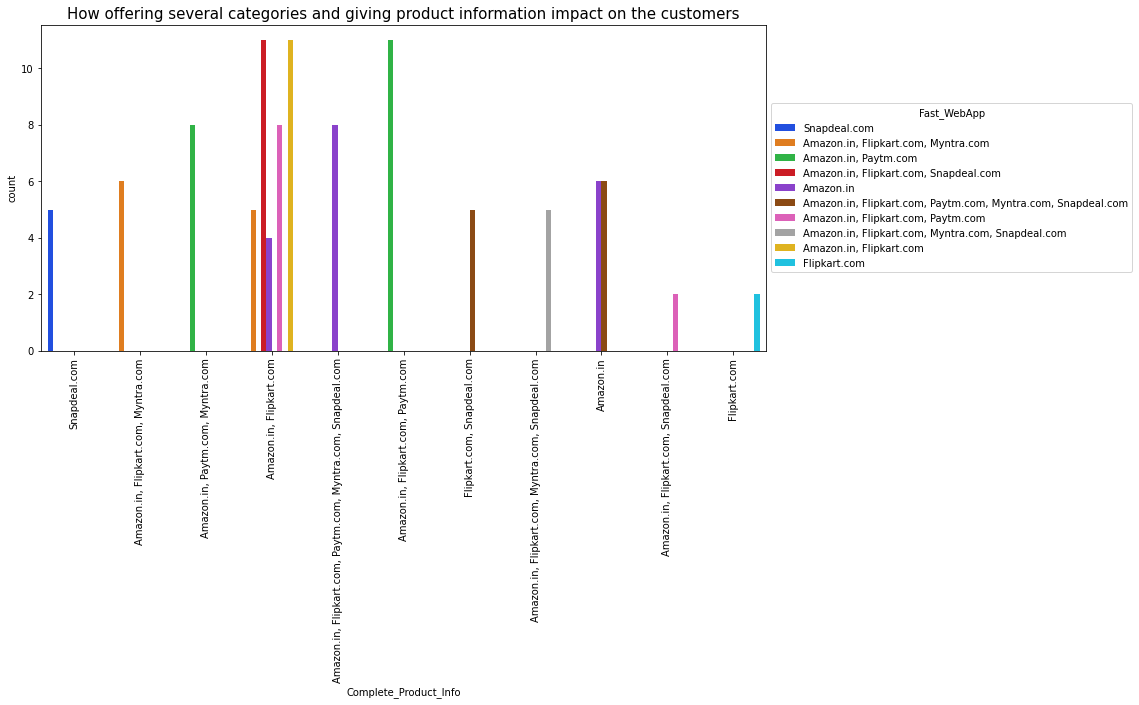

In [37]:
plt.figure(figsize=(13,6))
plt.title('How offering several categories and giving product information impact on the customers',fontsize=15)
sns.countplot(x='Complete_Product_Info',hue='Fast_WebApp',palette="bright",data=df);
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),title="Fast_WebApp")
plt.show()

The most common problem which is faced by the customers is server problem, in many websites these problems are common. Also, only few websites provide the relevant information about the products. These things may lead the customers to have bad impression on these websites.

From the plot we can visualize that the amazon and flip kart websites gives complete and relevant information and these websites have no issue with the server and most of the customer liked the web speed of both amazon and flip kart.

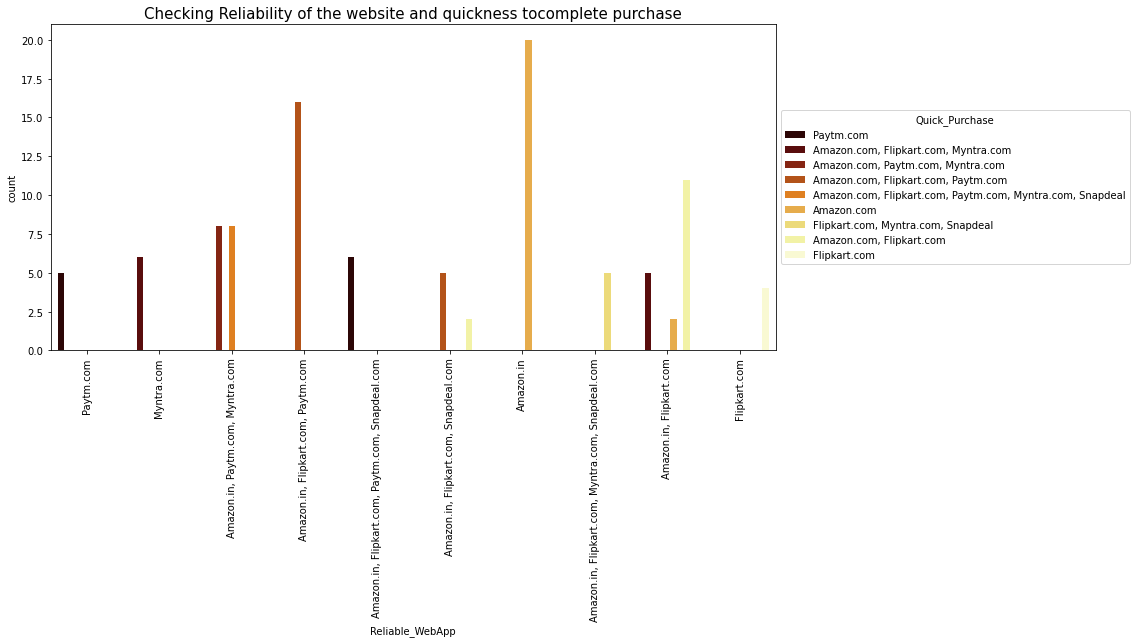

In [38]:
# Checking Reliability of the website and quickness to complete purchase
plt.figure(figsize=(13,6))
plt.title('Checking Reliability of the website and quickness tocomplete purchase',fontsize=15)
sns.countplot(x='Reliable_WebApp',hue='Quick_Purchase',palette="afmhot",data=df);
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),title="Quick_Purchase")
plt.show()

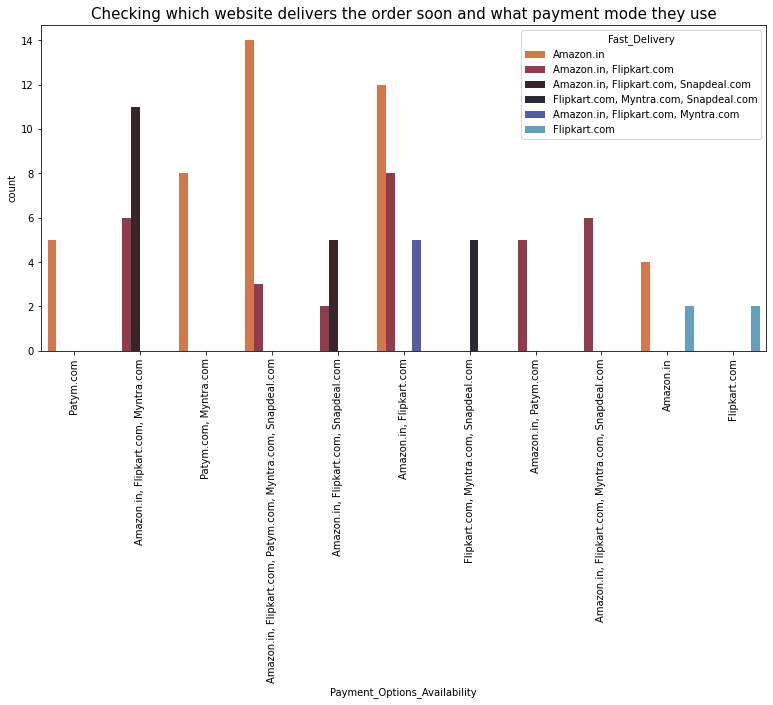

In [39]:
# Checking which website delivers the order soon and what payment mode they use
plt.figure(figsize=(13,6))
plt.title('Checking which website delivers the order soon and what payment mode they use',fontsize=15)
sns.countplot(x='Payment_Options_Availability',hue='Fast_Delivery',palette="icefire_r",data=df);
plt.xticks(rotation=90)
plt.legend(loc ="upper right",title="Fast_Delivery")
plt.show()

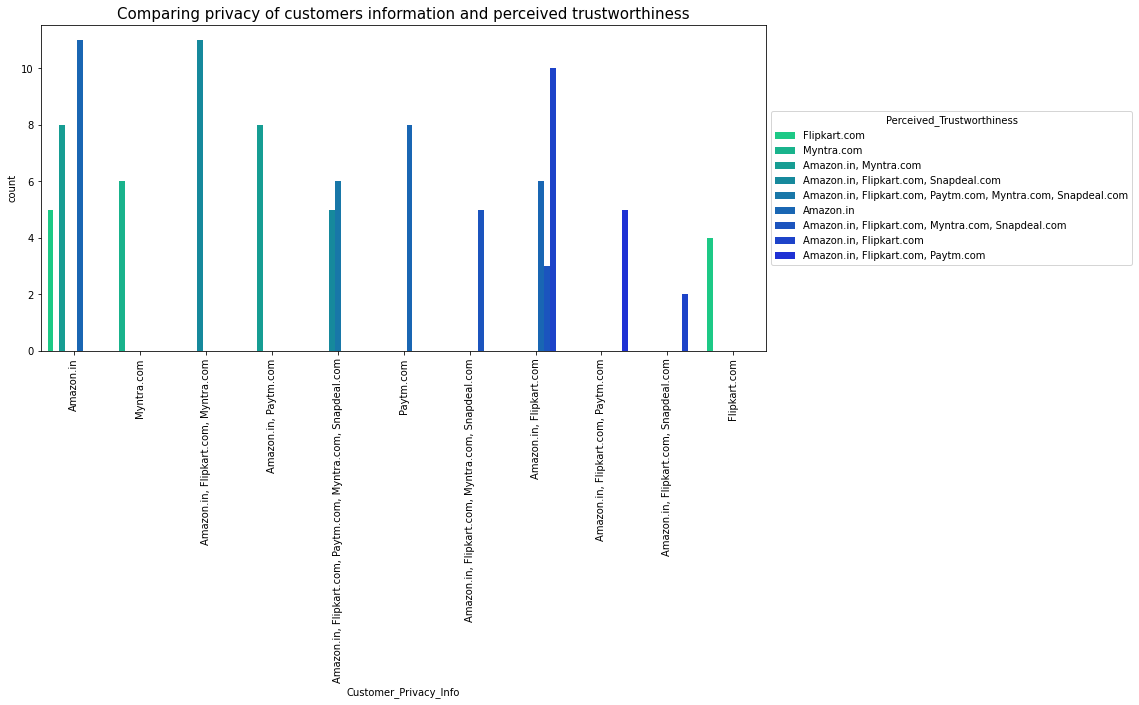

In [40]:
# Comparing privacy of customers information and perceived trustworthiness
plt.figure(figsize=(13,6))
plt.title('Comparing privacy of customers information and perceived trustworthiness',fontsize=15)
sns.countplot(x='Customer_Privacy_Info',hue='Perceived_Trustworthiness',palette="winter_r",data=df);
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),title="Perceived_Trustworthiness")
plt.show()

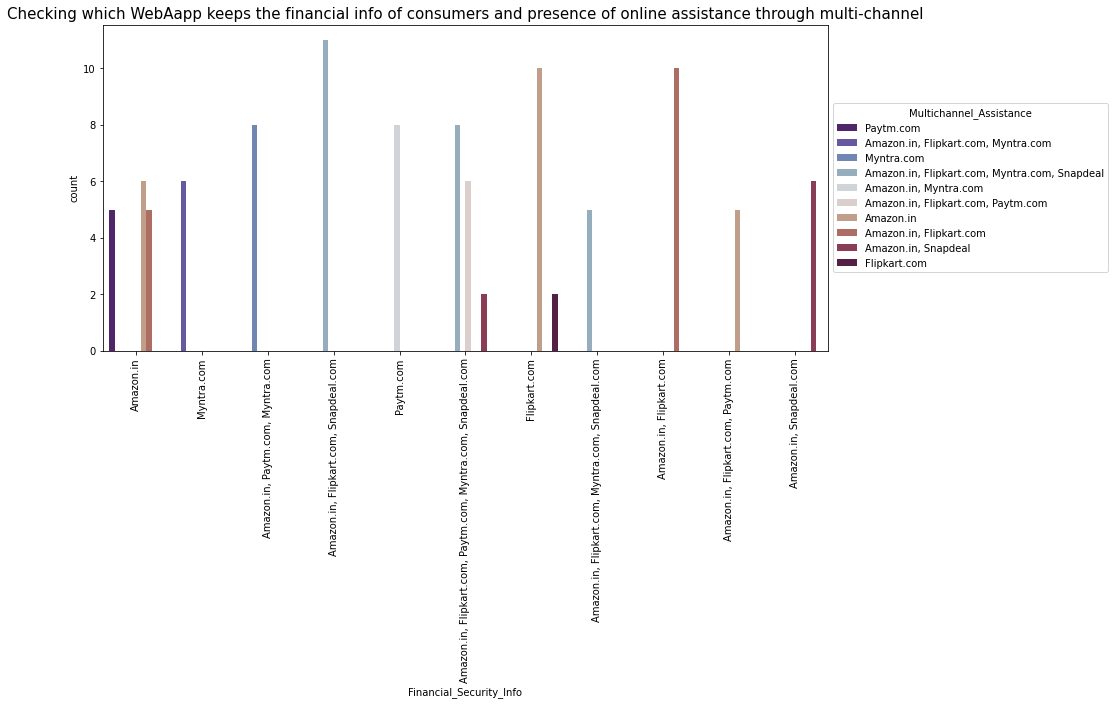

In [41]:
# Comparing privacy of customers information and perceived trustworthiness
plt.figure(figsize=(13,6))
plt.title('Checking which WebAapp keeps the financial info of consumers and presence of online assistance through multi-channel',fontsize=15)
sns.countplot(x='Financial_Security_Info',hue='Multichannel_Assistance',palette="twilight_shifted",data=df);
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),title="Multichannel_Assistance")
plt.show()

The customers trusts that amazon and flip kart keeps their financial information private and they never share any type of information to others.

Multi-channel retailing provides several benefits which includes several shoppers like the convenience that is provided through online channels in comparison to physical stores. Most of the customers like Amazon in terms of presence of online assistance through multi-channel.

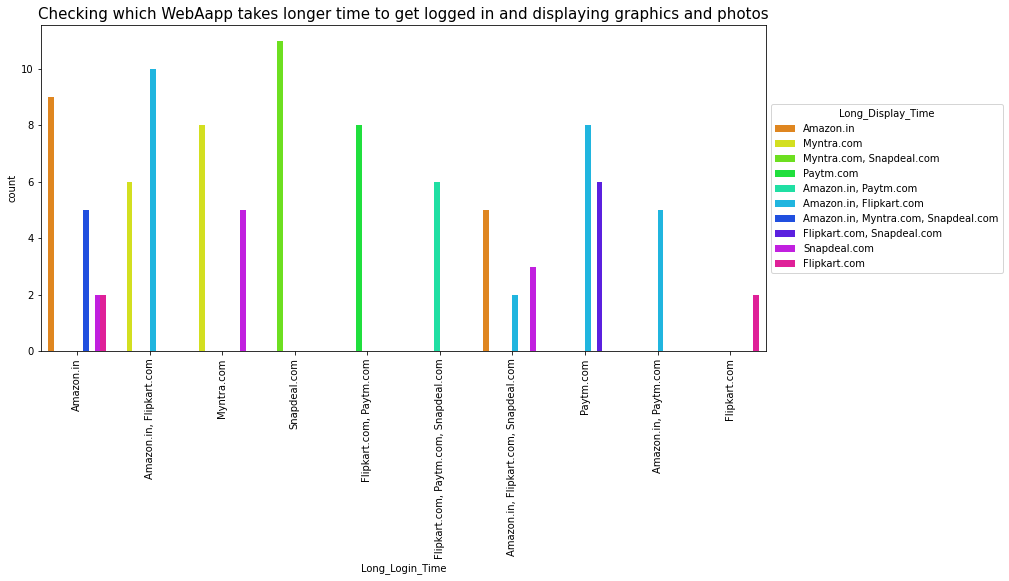

In [42]:
# Comparing Long_Login_Time and Long_Display_Time
plt.figure(figsize=(13,6))
plt.title('Checking which WebAapp takes longer time to get logged in and displaying graphics and photos',fontsize=15)
sns.countplot(x='Long_Login_Time',hue='Long_Display_Time',palette="hsv",data=df);
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),title="Long_Display_Time")
plt.show()

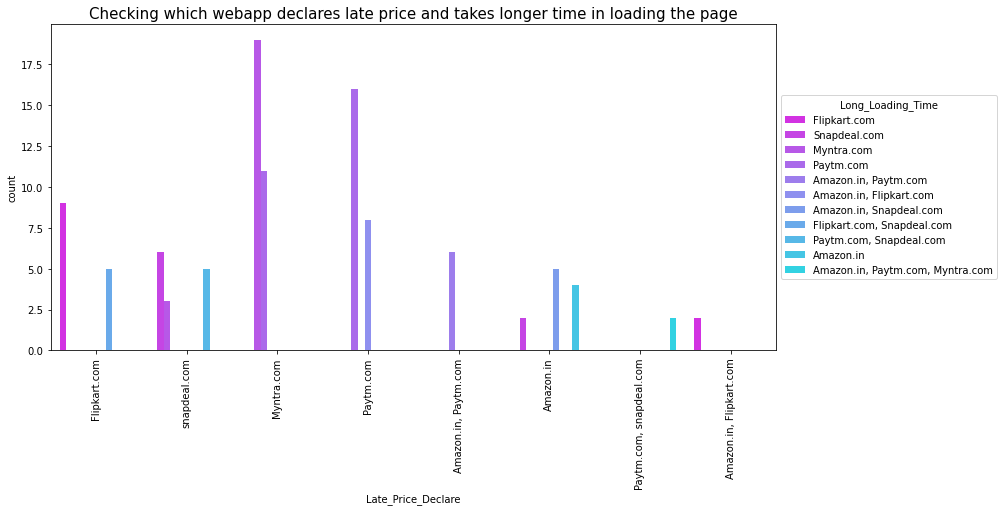

In [43]:
# Comparing Late_Price_Declare and Long_Loading_Time
plt.figure(figsize=(13,6))
plt.title('Checking which webapp declares late price and takes longer time in loading the page',fontsize=15)
sns.countplot(x='Late_Price_Declare',hue='Long_Loading_Time',palette="cool_r",data=df);
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),title="Long_Loading_Time")
plt.show()


When there is promotion and sales, Myntra takes time ti load the page and it has late declaration of price in these days.

Myntra declare the late price in order to clear the sales and they fix the price by comparing with other websites and they end up sales by providing benefits to the customers. In this time most of the customers tries to shop in this website so it takes long loading time.

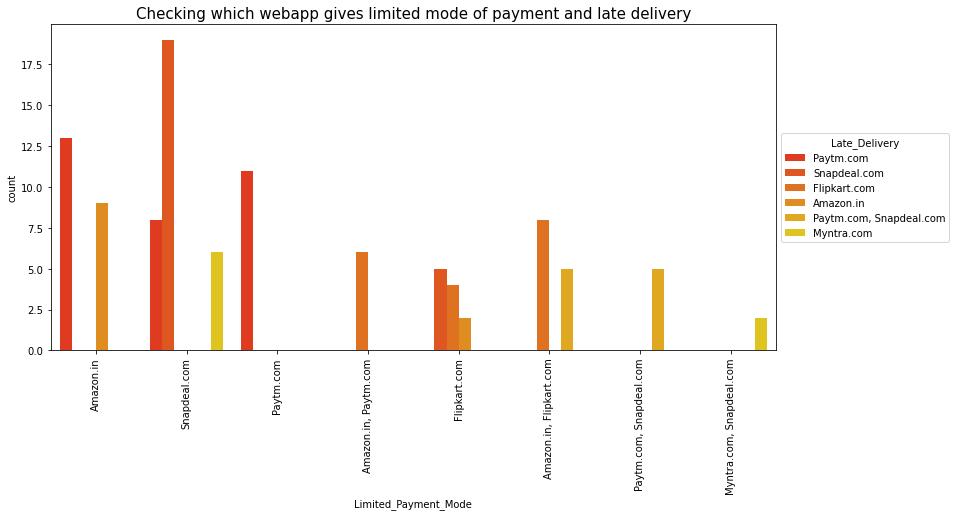

In [45]:
# Comparing Late_Price_Declare and Long_Loading_Time
plt.figure(figsize=(13,6))
plt.title('Checking which webapp gives limited mode of payment and late delivery',fontsize=15)
sns.countplot(x='Limited_Payment_Mode',hue='Late_Delivery',palette="autumn",data=df);
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),title="Late_Delivery")
plt.show()

Snapdeal has limited mode of payment on most of the products followed by Amazon. And paytm takes more time to deliver the product. So this website may not satisfy the customers due to late delivery.

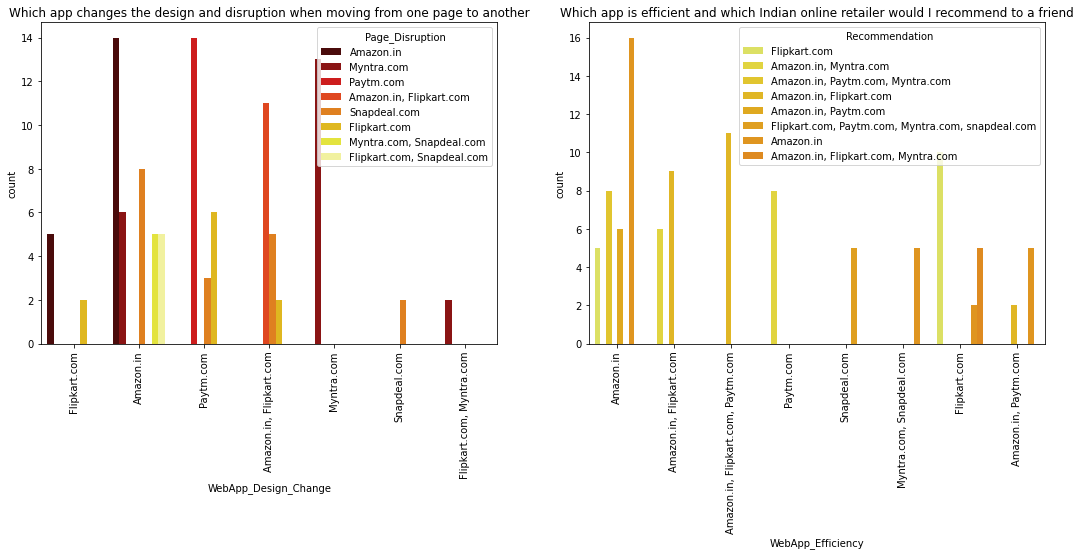

In [46]:
# Comparision between two variables
plt.figure(figsize=[18,13])

plt.subplot(2,2,1)
plt.title('Which app changes the design and disruption when moving from one page to another')
sns.countplot(x='WebApp_Design_Change',hue='Page_Disruption',palette="hot",data=df);
plt.xticks(rotation=90)

plt.subplot(2,2,2)
plt.title('Which app is efficient and which Indian online retailer would I recommend to a friend')
sns.countplot(x='WebApp_Efficiency',hue='Recommendation',palette="Wistia",data=df);
plt.xticks(rotation=90)

plt.subplot(2,2,1).legend(loc='upper right',title="Page_Disruption");
plt.subplot(2,2,2).legend(loc ="upper right",title="Recommendation");
plt.show()


Amazon is the website where they frequently change their application designs in order to attract the customers and satisfies the customers’ needs and they tend to make customers by updating everyday as per the trend. But the disadvantages of this website are when moving from one page to other it slows down and sometimes it may shutdown.

Amazon is the website which is more efficient as before and I suggest Amazon.com and Flipkart as a best Indian online retailer store for purchasing all types of products, as they provide enormous amounts of benefits.

Since we have observed all the columns contains object type data, so we need to convert them into numerical by using appropriate encding techniques. Here I am using label encoding method to convert the data.

# Taking care of categorical columns using label encoding method

In [47]:
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=LE.fit_transform(df[i])

In [48]:
df.head()

Gender  Age  Shopping_City  Pincode  Shopping_Since  Shopping_Frequency  \
0       1    1              2   110009               3                   2   
1       0    0              2   110030               3                   3   
2       0    0              4   201308               2                   3   
3       1    0              6   132001               2                   4   
4       0    0              0   530068               1                   0   

   Internet_Accessibility  Device_Used  Screen_Size  OS  Browser_Used  \
0                       0            0            3   2             0   
1                       2            2            0   1             0   
2                       1            2            2   0             0   
3                       1            2            2   1             3   
4                       2            2            0   1             3   

   Channel_First_Used  Login_Mode  Time_Explored  Payment_Mode  \
0                   2           2              2             2   
1                   2           4              4             1   
2                   2           4              1             2   
3                   2           2              2             1   
4                   0           4              4             1   

   Abandon_Frequency  Abandon_Reason  Content_Readability  \
0                  2               2                    0   
1                  0               4                    0   
2                  2               4                    0   
3                  1               0                    0   
4                  0               0                    0   

   Similar_Product_Info  Seller_Product_Info  Product_Info_Clarity  \
0                     2                    2                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    2                     0   
4                     2                    2                     0   

   Navigation_Ease  Loading_Processing_Speed  User_Friendly_Interface  \
0                0                         1                        1   
1                0                         0                        0   
2                0                         0                        0   
3                0                         0                        0   
4                0                         0                        0   

   Convenient_Payment_Mode  Timely_Fulfilment_Trust  \
0                        1                        1   
1                        0                        0   
2                        0                        0   
3                        0                        0   
4                        0                        0   

   Customer_Support_Response  Customer_Privacy_Guarantee  \
0                          0                           0   
1                          0                           0   
2                          0                           0   
3                          0                           0   
4                          0                           0   

   Various_Channel_Responses  Benefits  Enjoy  Convenience  \
0                          0         2      1            1   
1                          0         0      0            0   
2                          0         0      0            0   
3                          0         0      2            2   
4                          0         0      0            0   

   Return_Replacement_Policy  Loyalty_Programs_Access  Info_Satisfaction  \
0                          1                        0                  1   
1                          0                        0                  0   
2                          0                        0                  0   
3                          0                        2                  1   
4                         

In [49]:
df.describe()

Gender         Age  Shopping_City        Pincode  Shopping_Since  \
count  103.000000  103.000000     103.000000     103.000000      103.000000   
mean     0.359223    1.262136       4.320388  232449.844660        2.368932   
std      0.482119    1.137258       3.193786  150755.596481        1.204487   
min      0.000000    0.000000       0.000000  110008.000000        0.000000   
25%      0.000000    0.000000       2.000000  132001.000000        1.000000   
50%      0.000000    1.000000       4.000000  201305.000000        3.000000   
75%      1.000000    2.000000       7.000000  202156.500000        3.000000   
max      1.000000    4.000000      10.000000  560037.000000        4.000000   

       Shopping_Frequency  Internet_Accessibility  Device_Used  Screen_Size  \
count          103.000000              103.000000   103.000000   103.000000   
mean             2.718447                1.194175     1.495146     2.203883   
std              1.324116                0.421441     0.790554     1.003516   
min              0.000000                0.000000     0.000000     0.000000   
25%              2.000000                1.000000     1.000000     2.000000   
50%              3.000000                1.000000     2.000000     2.000000   
75%              4.000000                1.000000     2.000000     3.000000   
max              4.000000                2.000000     3.000000     3.000000   

               OS  Browser_Used  Channel_First_Used  Login_Mode  \
count  103.000000    103.000000          103.000000  103.000000   
mean     1.155340      0.611650            1.737864    2.097087   
std      0.848959      1.181831            0.625616    1.562518   
min      0.000000      0.000000            0.000000    0.000000   
25%      0.000000      0.000000            2.000000    0.500000   
50%      1.000000      0.000000            2.000000    2.000000   
75%      2.000000      0.000000            2.000000    4.000000   
max      2.000000      3.000000            2.000000    4.000000   

       Time_Explored  Payment_Mode  Abandon_Frequency  Abandon_Reason  \
count     103.000000    103.000000         103.000000      103.000000   
mean        2.728155      0.941748           1.407767        1.359223   
std         1.315028      0.654176           0.821726        1.589514   
min         0.000000      0.000000           0.000000        0.000000   
25%         2.000000      1.000000           1.000000        0.000000   
50%         3.000000      1.000000           2.000000        1.000000   
75%         4.000000      1.000000           2.000000        2.500000   
max         4.000000      2.000000           2.000000        4.000000   

       Content_Readability  Similar_Product_Info  Seller_Product_Info  \
count           103.000000            103.000000           103.000000   
mean              0.174757              0.466019             0.572816   
std               0.549994              0.802148             0.847163   
min               0.000000              0.000000             0.000000   
25%               0.000000              0.000000             0.000000   
50%               0.000000              0.000000             0.000000   
75%               0.000000              1.000000             1.000000   
max               2.000000              2.000000             2.000000   

       Product_Info_Clarity  Navigation_Ease  Loading_Processing_Speed  \
count            103.000000       103.000000                103.000000   
mean               0.116505         0.097087                  0.203883   
std                0.322398         0.297525                  0.492278   
min                0.000000         0.000000                  0.000000   
25%                0.000000         0.000000                  0.000000   
50%                0.000000         0.000000                  0.000000   
75%                0.000000         0.000000                  0.000000   
max                1.000000         1.000000                  2.000000   



Before we got only one column's statistical summary, after label encoding we can able to notice all the columns statistical summary.

Here the count of all the columns are same which means there are no missing values present in the dataset.

Some of the columns have their mean value greater than the median (50%), so we can say they are skewed to right.

In some of the columns, the median is greater than the mean, so the data is skewed to left.

We can also notice the min value, standard deviation and 25% percentile.

In summarising the data, we cna notice huge difference between max and 75% percentile in some of the columns which means there are huge outliers present in those columns. Since all the columns in the dataset are categorical, no need to remove outliers and skewness.

# Identifying the outliers

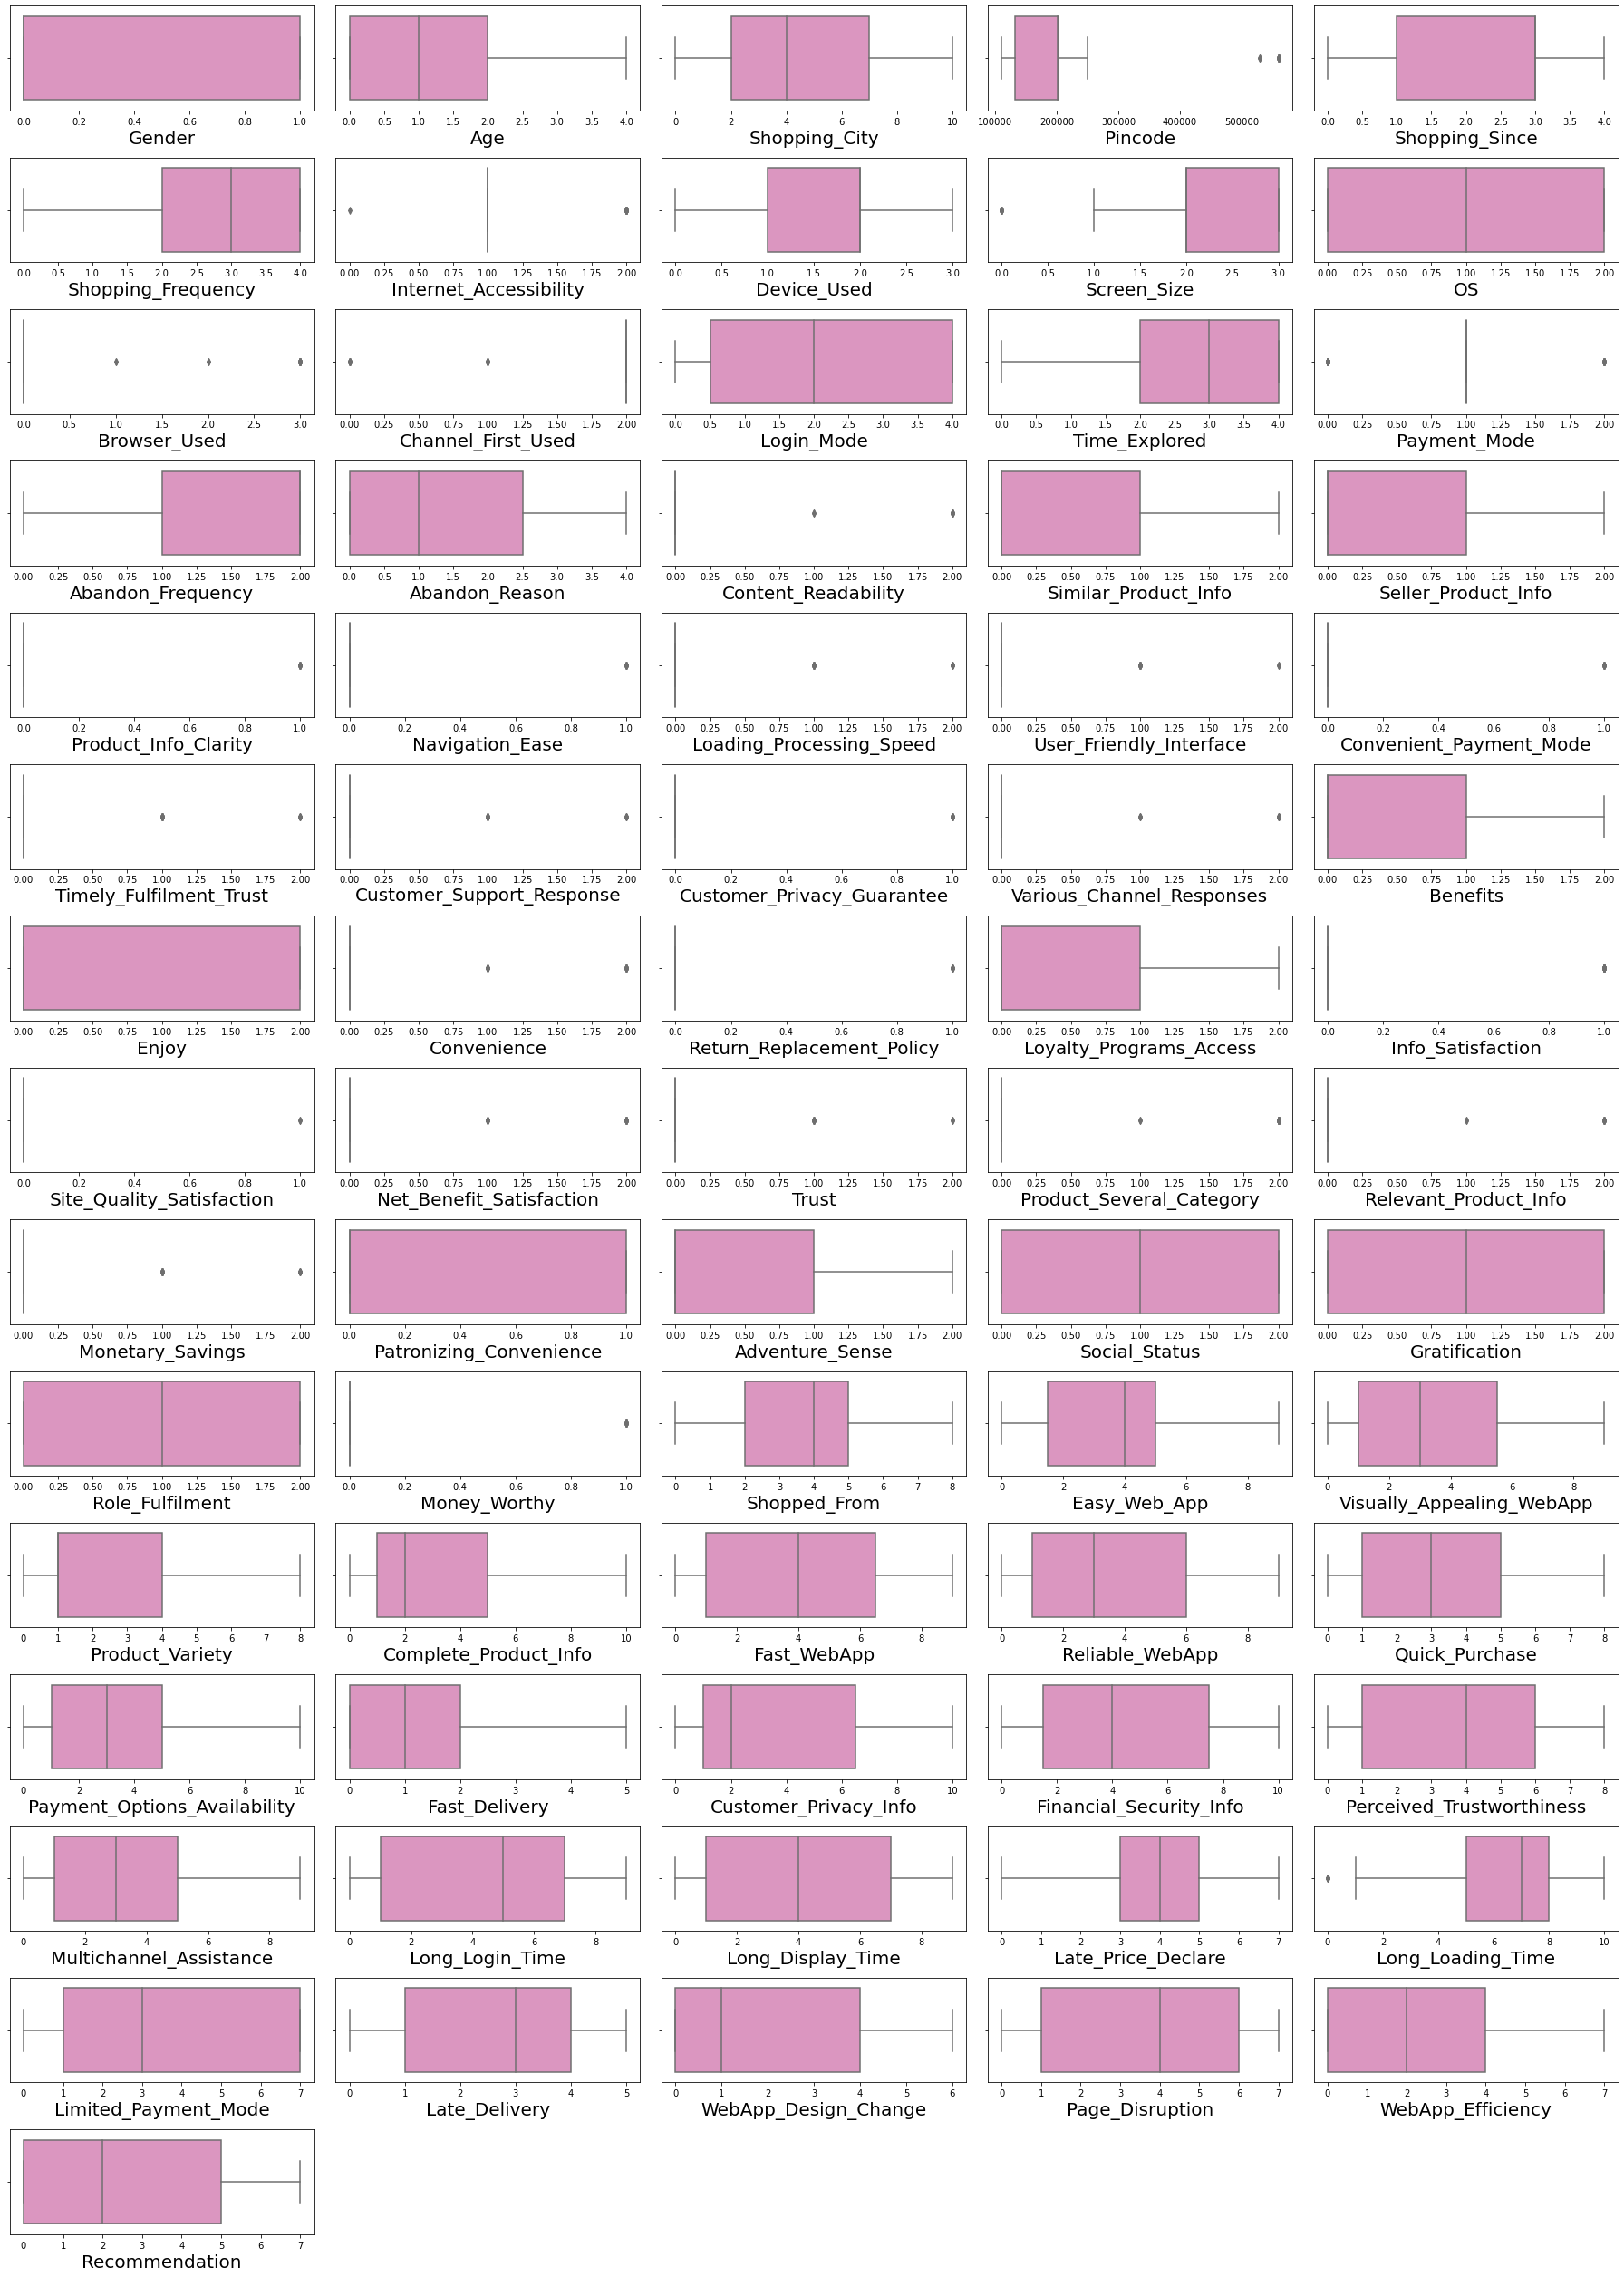

In [51]:
# Let's check the outliers by ploting box plot

plt.figure(figsize=(25,35),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=71:
        ax=plt.subplot(15,5,plotnumber)
        sns.boxplot(df[column],palette="Set2_r")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Checking skewness in the data

In [52]:
# Checking the skewness
df.skew()

Gender                          0.595556
Age                             0.689249
Shopping_City                   0.300637
Pincode                         1.524364
Shopping_Since                 -0.371648
Shopping_Frequency             -0.808123
Internet_Accessibility          1.161061
Device_Used                    -0.408695
Screen_Size                    -1.194134
OS                             -0.304667
Browser_Used                    1.490068
Channel_First_Used             -2.194655
Login_Mode                     -0.038335
Time_Explored                  -0.404834
Payment_Mode                    0.058877
Abandon_Frequency              -0.887208
Abandon_Reason                  0.718239
Content_Readability             2.961151
Similar_Product_Info            1.274990
Seller_Product_Info             0.951204
Product_Info_Clarity            2.426125
Navigation_Ease                 2.762065
Loading_Processing_Speed        2.431096
User_Friendly_Interface         2.591661
Convenient_Payme

# Observations:

The outliers present in many of the columns but the dataset contains all the categorical data so no need to remove the outliers.

Skewness is also present in many of the columns but all the columns are categorical so no need to remove skewness also.

# Checking Correlation between the independent variables

In [53]:
# Checking the correlation between features and the target
cor = df.corr()
cor

Gender       Age  Shopping_City   Pincode  \
Gender                        1.000000  0.130547       0.160104 -0.318142   
Age                           0.130547  1.000000       0.009041 -0.123367   
Shopping_City                 0.160104  0.009041       1.000000 -0.462275   
Pincode                      -0.318142 -0.123367      -0.462275  1.000000   
Shopping_Since               -0.027865 -0.006879      -0.161004 -0.116325   
Shopping_Frequency            0.037126  0.257829       0.081815 -0.247831   
Internet_Accessibility       -0.250157  0.035946       0.026165 -0.130698   
Device_Used                   0.094649  0.050500       0.014212  0.008223   
Screen_Size                   0.070038 -0.038699       0.181309 -0.211350   
OS                           -0.065812 -0.093361      -0.065541 -0.035518   
Browser_Used                 -0.062478 -0.083991      -0.026453  0.091186   
Channel_First_Used           -0.042287  0.097527       0.091512 -0.209906   
Login_Mode                   -0.176893  0.084846      -0.155602  0.187453   
Time_Explored                -0.045490 -0.155104      -0.263845  0.176304   
Payment_Mode                  0.066999  0.060260       0.088792 -0.014542   
Abandon_Frequency             0.096825 -0.105011       0.155193 -0.169434   
Abandon_Reason                0.085827  0.180606       0.054355 -0.133579   
Content_Readability           0.019743  0.161154      -0.099163  0.052935   
Similar_Product_Info          0.145951 -0.113730       0.109529  0.180129   
Seller_Product_Info          -0.028665 -0.035270       0.018469  0.047144   
Product_Info_Clarity          0.106553  0.129802      -0.141342  0.098973   
Navigation_Ease               0.096217  0.068920      -0.187817  0.120929   
Loading_Processing_Speed      0.184082  0.096230      -0.048190  0.060576   
User_Friendly_Interface       0.187451  0.011098      -0.105001  0.089884   
Convenient_Payment_Mode       0.081050  0.092796       0.007680 -0.002433   
Timely_Fulfilment_Trust       0.101466  0.096230      -0.085604  0.039707   
Customer_Support_Response    -0.033100  0.184060      -0.007527  0.094389   
Customer_Privacy_Guarantee   -0.040478  0.126870      -0.094960  0.114417   
Various_Channel_Responses    -0.074207 -0.101875      -0.027940 -0.102975   
Benefits                      0.131132 -0.147127       0.096551 -0.128336   
Enjoy                         0.136753 -0.061579       0.109394 -0.089397   
Convenience                   0.055448 -0.014202       0.094601 -0.144319   
Return_Replacement_Policy     0.119436 -0.028460       0.179116 -0.115533   
Loyalty_Programs_Access       0.012920 -0.051626       0.043664  0.003554   
Info_Satisfaction             0.181626 -0.062398       0.268691 -0.148666   
Site_Quality_Satisfaction     0.041290 -0.032594       0.074366 -0.085207   
Net_Benefit_Satisfaction      0.040221  0.021807       0.130972 -0.143929   
Trust                         0.152074  0.072264      -0.173749  0.129124   
Product_Several_Category      0.099765 -0.086581       0.217642 -0.060087   
Relevant_Product_Info         0.269863  0.028857       0.125454 -0.145466   
Monetary_Savings              0.082428 -0.129421       0.189581 -0.123720   
Patronizing_Convenience       0.224768 -0.083680       0.020798 -0.047058   
Adventure_Sense               0.015746 -0.000399      -0.193031  0.056711   
Social_Status                 0.038404  0.056934      -0.135396  0.124983   
Gratification                -0.067582  0.027099       0.068684 -0.035289   
Role_Fulfilment              -0.148033 -0.150614      -0.149247 -0.003038   
Money_Worthy                  0.234472 -0.041801       0.271995 -0.028752   
Shopped_From                  0.067016  0.077175       0.210325 -0.084415   
Easy_Web_App                  0.064681  0.056235       0.217367 -0.092179   
Visually_Appealing_WebApp    -0.019218 -0.036457       0.090664  0.030180   
Product_Variety              -0.029096  0.106063      -0.017154  0.150372   
Complete_Product_Info       

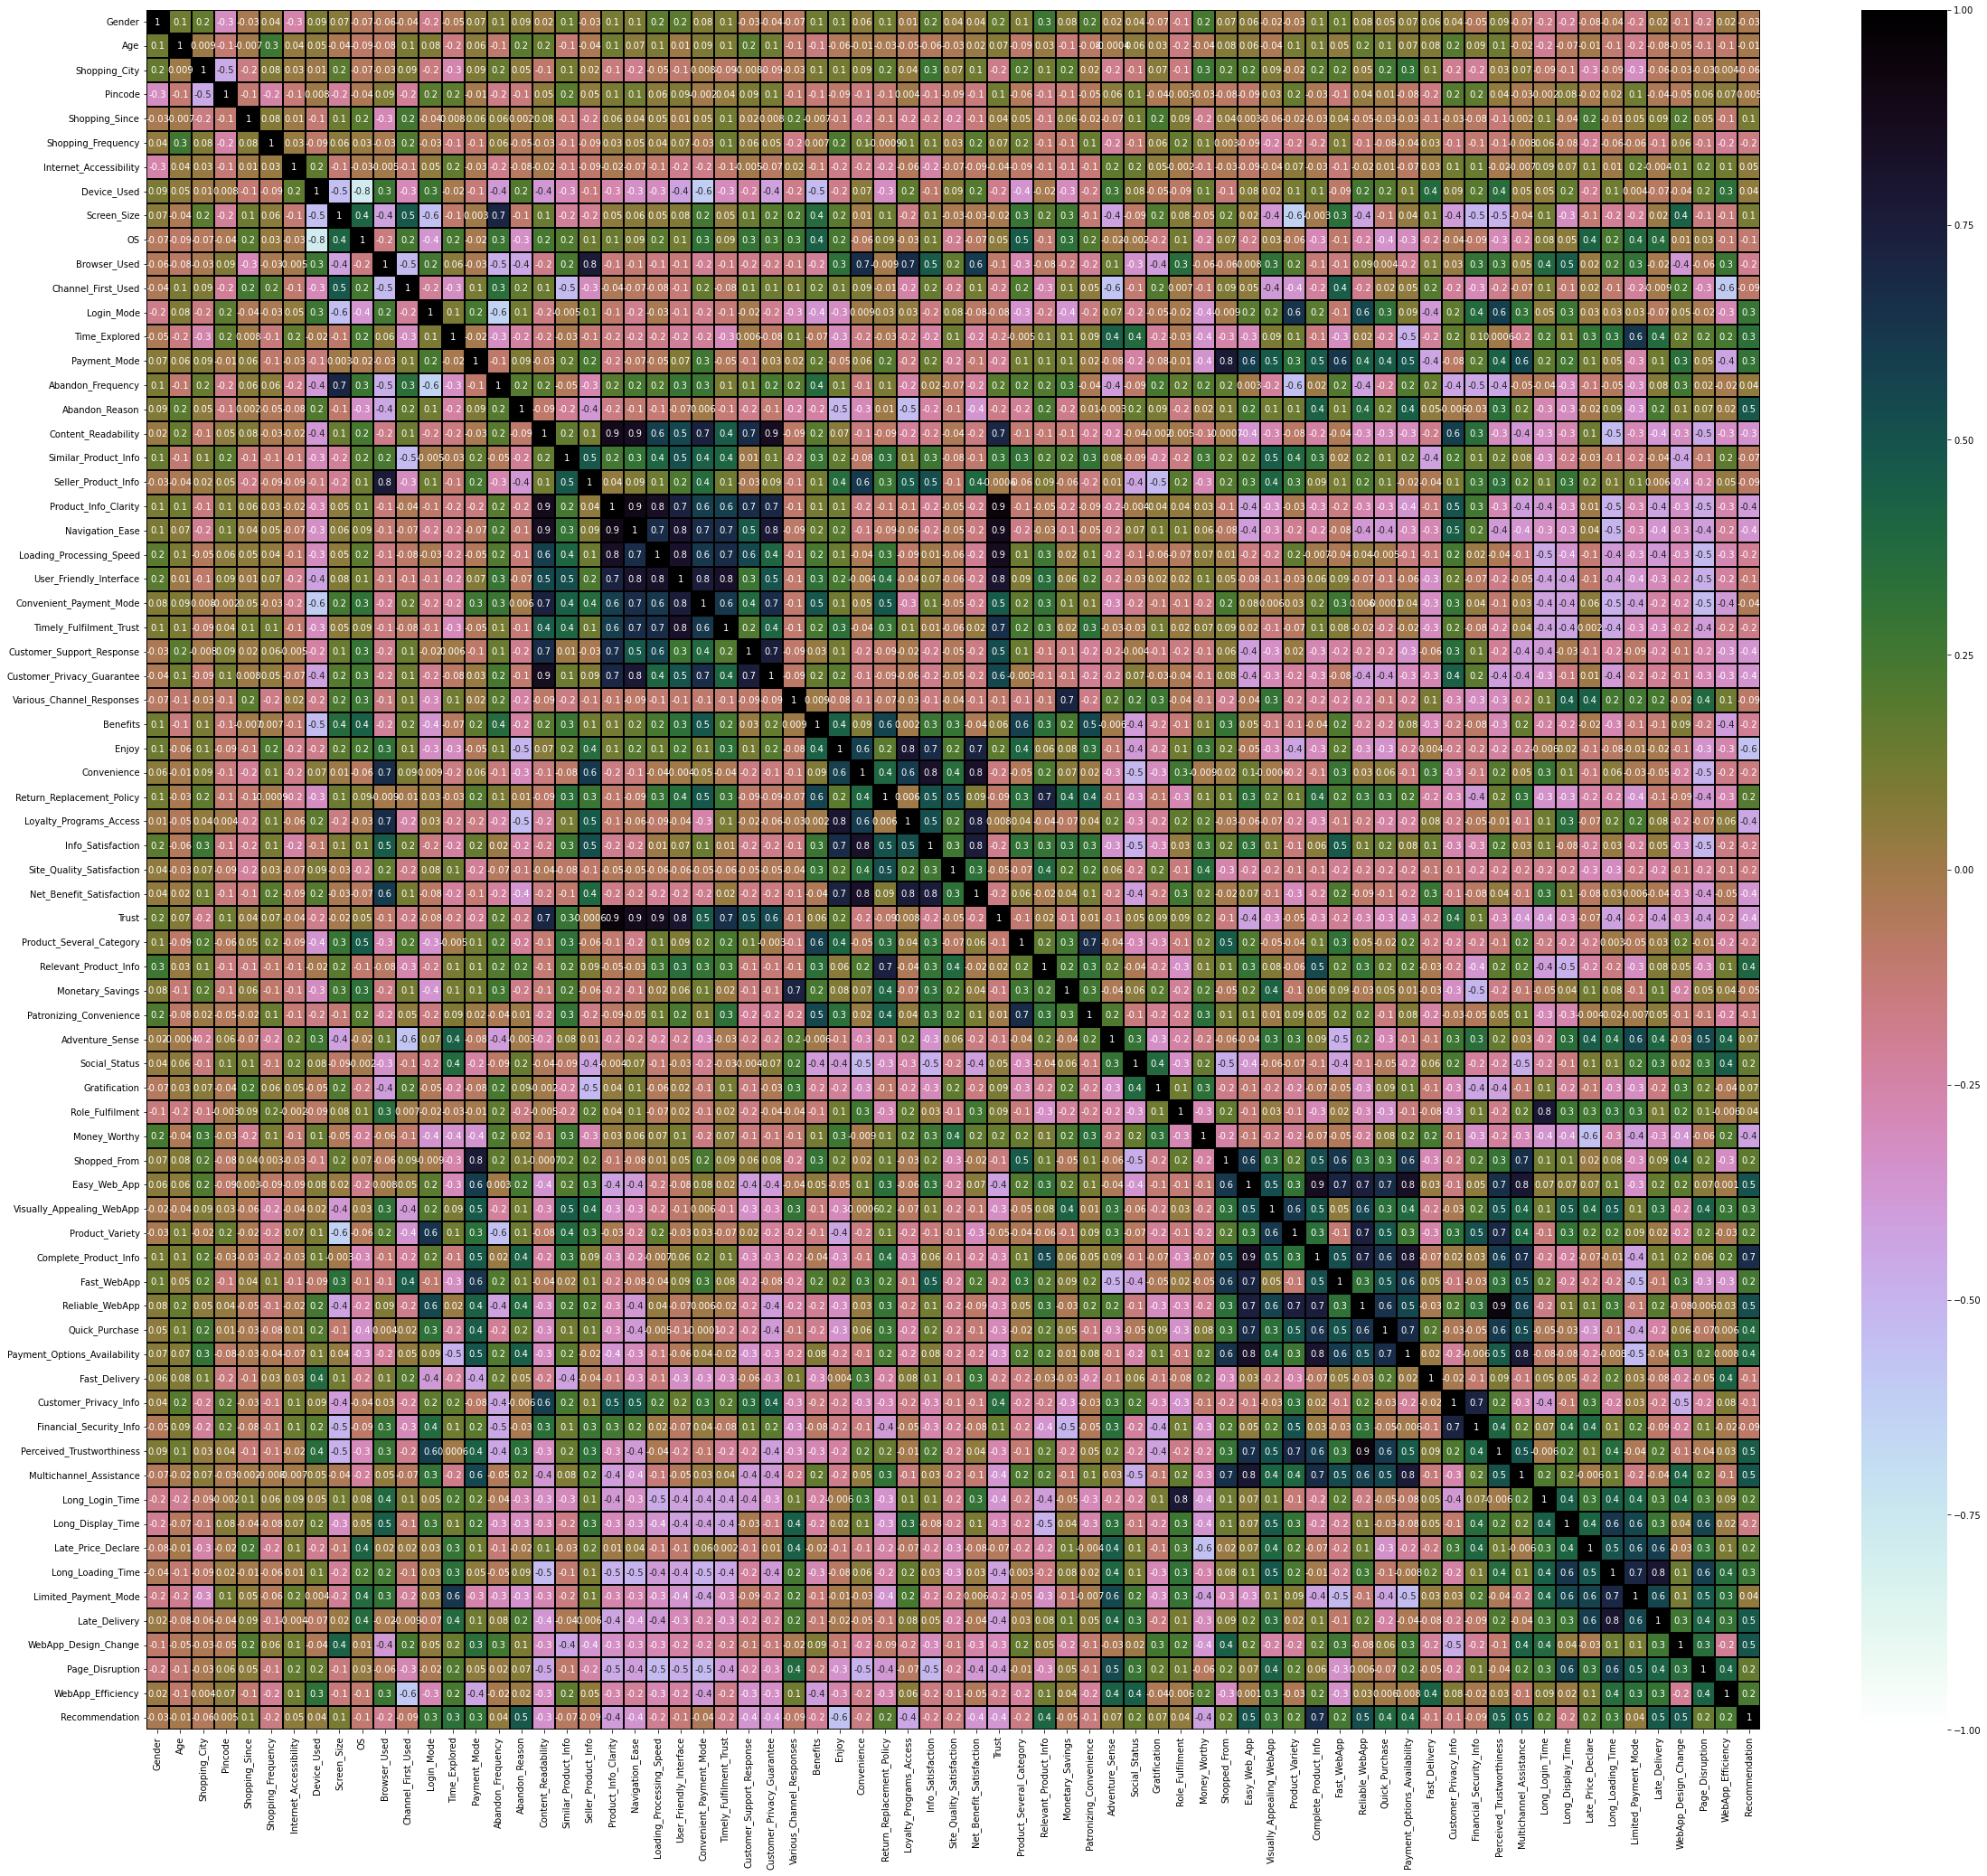

In [54]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(40,35))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g',linecolor="black", annot = True, annot_kws={'size':10},cmap="cubehelix_r")
plt.yticks(rotation=0);

This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between one feature to other.

This heat mapcontains both positive and negative correlation.

Dark shades are highly correlated.

Light shades are less correlated.

By looking at the heat map we can observe most of the columns have strong correlation with each other, which leads to multicollinearity issue and it will impact on the model accuracy, so we can check the VIF values to solve this issue by dropping the columns having VIF values more than 10. But here we are not building machine learning models so I am keeping this issue as it is.

Outcomes from the data analysis:

In this project we have investigated ecommerce quality in online businesses and develop new knowledge to understand the most important dimensions of E-retail factor for customer activation and retention.

This project aimed to enhance prior understanding of how ecommerce websites affected customer satisfaction, customer trust, and customer behaviour, i.e., repurchase intention, customer loyalty, and site revisit.

The dimensions like information about the products, convenient payment mode, Trust, Fulfilment, website design change, security/privacy and many others had a positive impact on the ecommerce websites for customers. Also, some of the dimensions like ease of navigation, loading and speed, late delivery etc did not have impact on the ecommerce websites.

Thus, a company needs to pay attention to these dimensions more specifically and seek breakthroughs that can improve its performance and e-service quality.

Customer satisfaction and customer trust appeared as the outcomes of overall e-retail factor. The results of the analysis showed that e-retail factor had a positive impact on customer satisfaction. The majority of research done about e-retail factor states that customer satisfaction is the main determinant impacting on e-retail factor. It supports the idea that there is a significant relationship between e-retail factor and customer satisfaction. E-retail factor also had a positive impact on customer trust. The better the e-retail factor of a company, the higher the customer trust. Providing good service quality enhances customer satisfaction and customer trust.

From the above analysis we found that the mains reasons or factors which attract consumers to do shopping online and then main reasons or obstacles which discourage consumers from shopping online. Therefore, from the analysis, it is found that most of the respondents use internet daily but most of the respondents do not use internet daily to buy products. Nearly half of the total respondents' opinions were that they would only use the internet to buy products when the need arises to do so.



# Assumptions or recommendations to the online sellers:

Based upon the findings and analysis, the following assumptions are presented for the online sellers to make online shopping more popular, convenient, reliable and trustworthy.

Transaction security and consumers data safety are principal concerns of online customers purchasing products or services online. Therefore online vendors can assure their consumers' by offering personal information privacy, protection policy and guarantee for transaction security by improving their technological systems.

Retailers should be careful about the annoying factors of online shopping such as being unable to access the website, long delays in completing online orders, inconsistencies in the items available online, mistakes in filling orders, and the hassle of returning goods.

Online sellers can be more concerned about delivery times, delivery charge and product return policies. They can make it easier, quicker and reliable, so that consumers can enjoy the online shopping experience and they likes ti shop in the particular websites regularly.

The respondents thought that products' mixing up or they find different product at delivery time which is the main inhibition of online shopping, so that the sellers must be very cautious when it comes to delivery.

Getting feedbacks from the customers is also on of the important thing to improve the sales of the company. The e-tailer wants to keep the customer happy in order to build the successful business, but they easily fall into a trap of assuming that the customers will give feedback without being prompted. If the e-tailers are doing something wrong, most of the customers won’t complain, they will just go elsewhere. So it is important to ask customers how they really feel about their services.

# Conclusions:

The endeavour of this study is to identify the motivating factors towards online shopping and in which e-tailer the customers likely to shop more.

In this project, I have done some feature engineering by replacing the unwanted entries by suitable columns, found no null values, and renamed the columns by giving new names. Visualized the data using count plot, factor plot, pie plot and distribution plot, also encoded the object data into numerical using label encoding method. Checked the statistical summary of the dataset and checked for skewness, outliers and correlation between the features.

From the analysis it was found that consumers purchasing decisions were dependent on various factors. All these motives motivate consumers to purchase products through online. According to consumers' opinions, "time saving" is the most important motivating factor for online shopping.

Again "information availability", "open 24/7", "huge range of products/ brands", "reasonable prices", "various offers for online products", "easy ordering system", and "shopping fun" are other motivating factors for online shopping respectively. Also, "online payment system", "personal privacy or security issues", "delaying of delivery" and "lacks of personal customer service" are the main inhibitions of online shopping to the respondents.

After visualizing the data, I found Amazon is the best online store where the customers trust on buying products and it has positive impact on the customers. Also, amazon and flip kart have increased customers’ expectations. So, they are the best online retailer who makes the loyal customers and satisfies the customers.

It was also observed that online shopping is not trustworthy and reliable to some consumers due to only online payment system and personal privacy. In addition, online security is a major concern for the consumer particularly in terms of fraud, privacy and hacking. So, the organizers should make up their organization for better sales.